## Content
This dataset provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts.

## Acknowledgements
The menu items and nutrition facts were scraped from the McDonald's website.

## Inspiration
How many calories does the average McDonald's value meal contain? How much do beverages, like soda or coffee, contribute to the overall caloric intake? Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value? What about ordering egg whites instead of whole eggs? What is the least number of items could you order from the menu to meet one day's nutritional requirements?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
-import pandas as pd
import numpy as np


# Assuming 'your_dataset.csv' is your dataset file
# You might need to upload your dataset to Colab first
path = '/content/drive/MyDrive/Colab Notebooks/mcd_menu.csv'
# Upload your dataset to Colab
# from google.colab import files
# uploaded = files.upload()

# Load the dataset
df = pd.read_csv(path)

# Display the data types of each column
data_types = df.dtypes
print(data_types)

Category                          object
Item                              object
Serving Size                       int64
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


There are 2 categorical data and 22 numerical data

In [ ]:
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

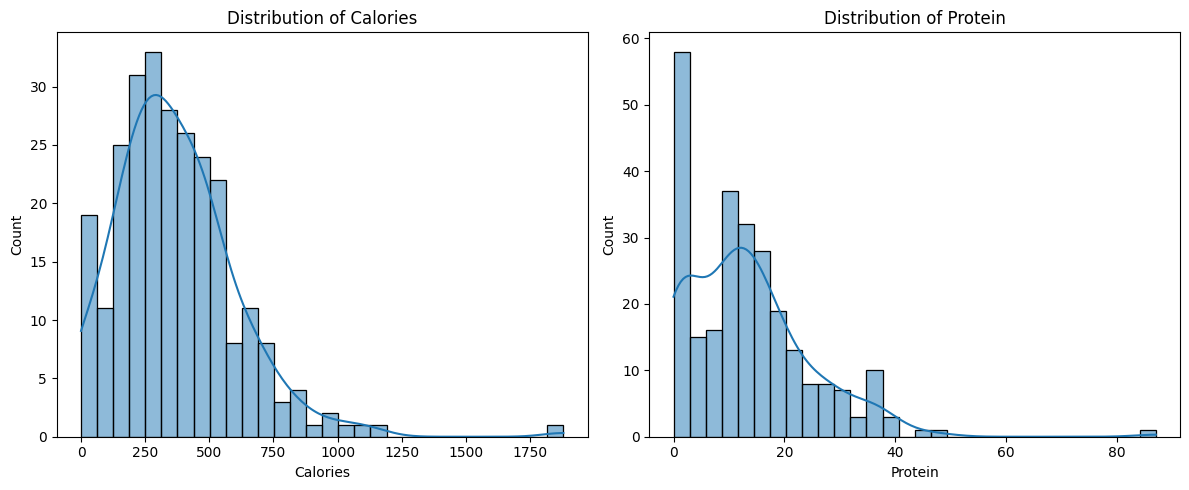

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the distribution of Calories
sns.histplot(df['Calories'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Calories')

# Plot the distribution of Protein
sns.histplot(df['Protein'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Protein')

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

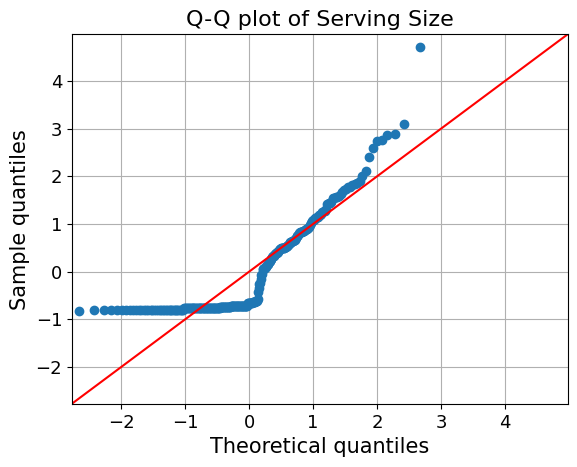

<Figure size 800x500 with 0 Axes>

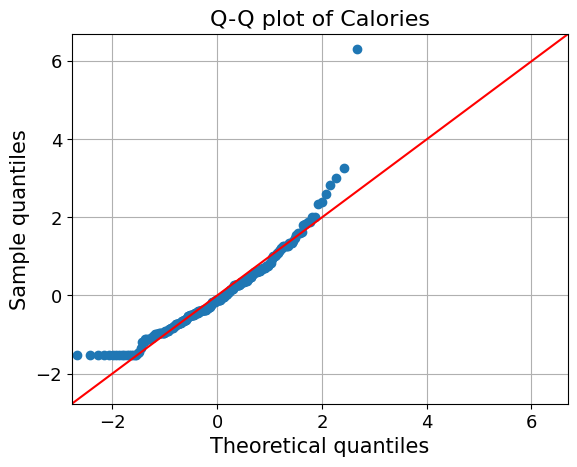

<Figure size 800x500 with 0 Axes>

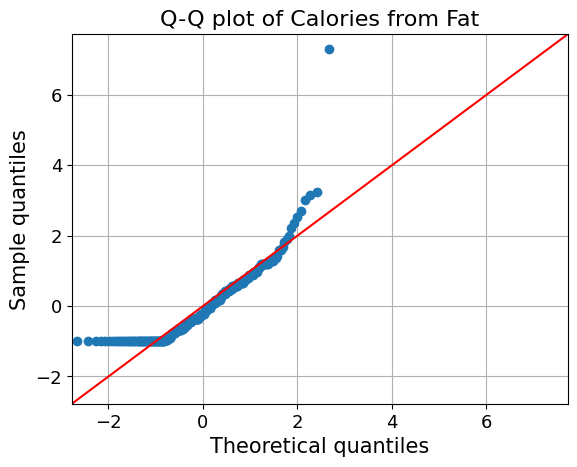

<Figure size 800x500 with 0 Axes>

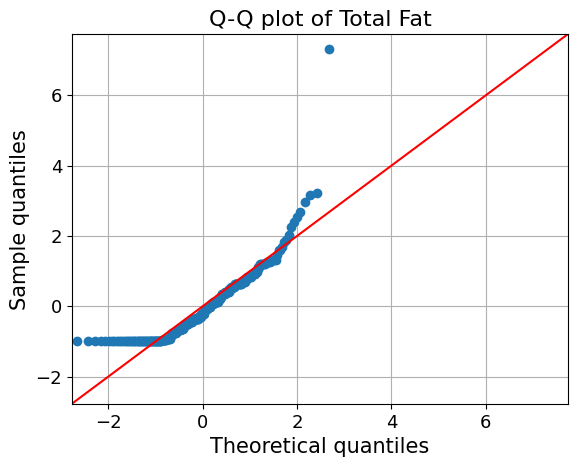

<Figure size 800x500 with 0 Axes>

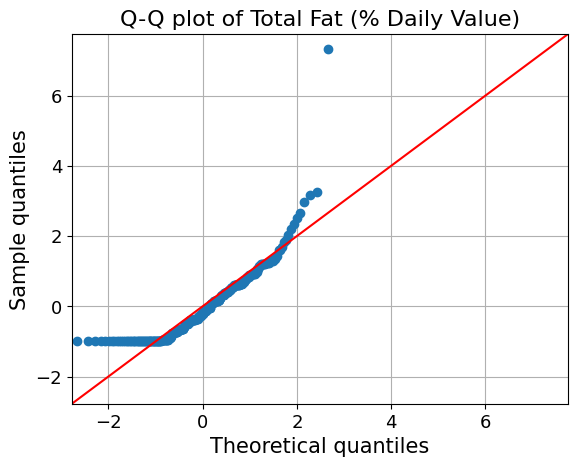

<Figure size 800x500 with 0 Axes>

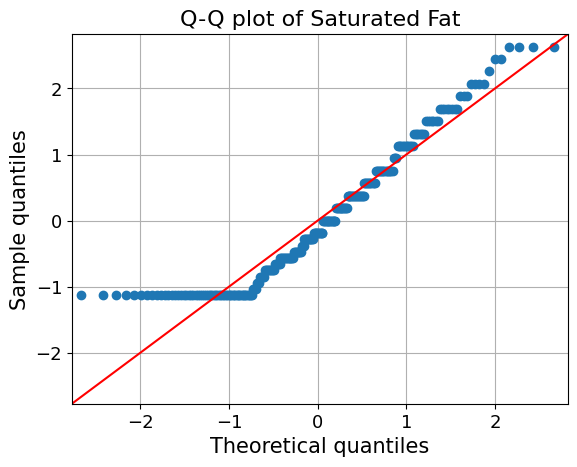

<Figure size 800x500 with 0 Axes>

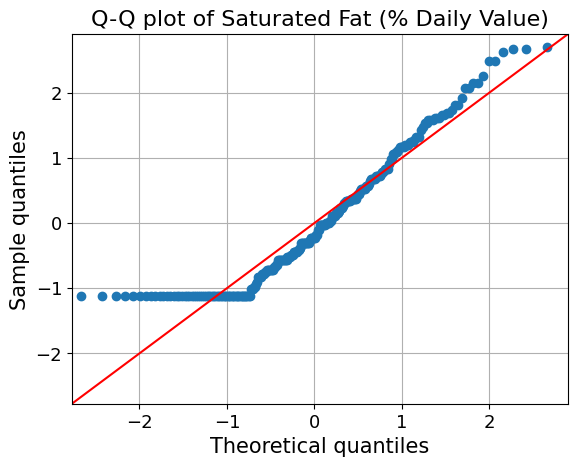

<Figure size 800x500 with 0 Axes>

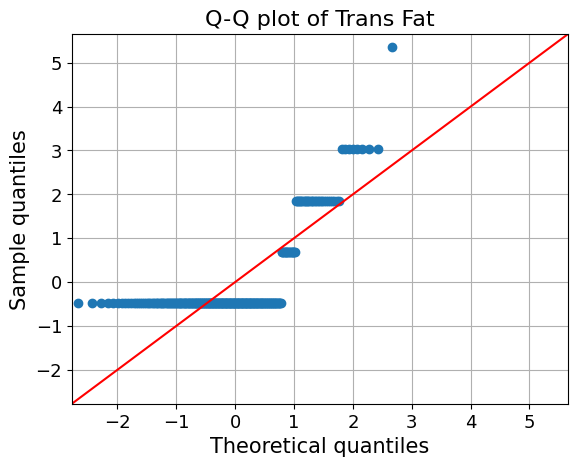

<Figure size 800x500 with 0 Axes>

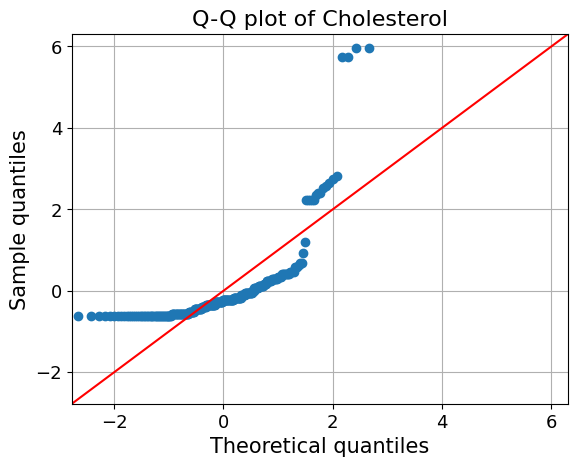

<Figure size 800x500 with 0 Axes>

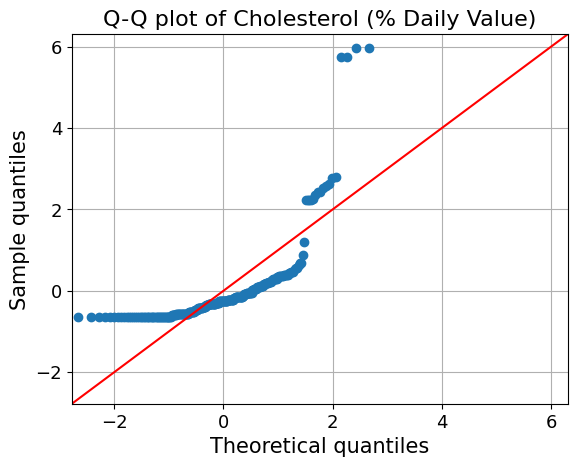

<Figure size 800x500 with 0 Axes>

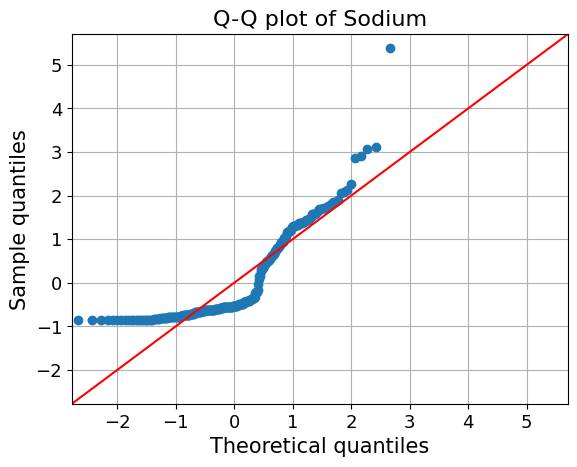

<Figure size 800x500 with 0 Axes>

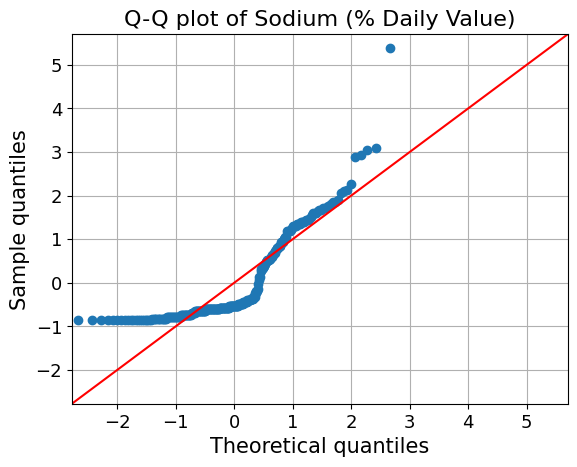

<Figure size 800x500 with 0 Axes>

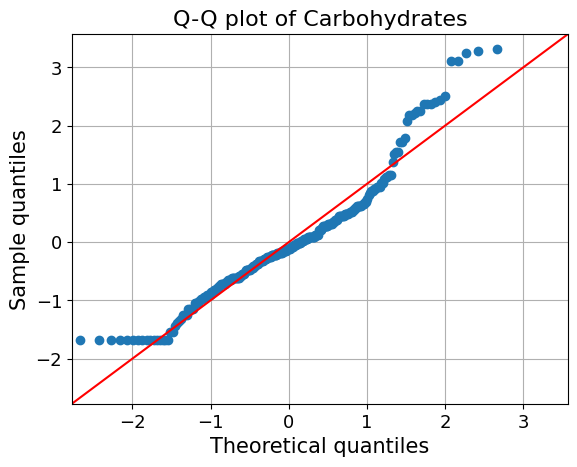

<Figure size 800x500 with 0 Axes>

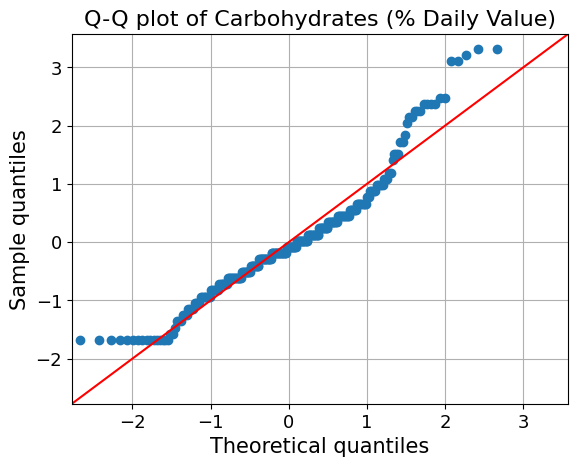

<Figure size 800x500 with 0 Axes>

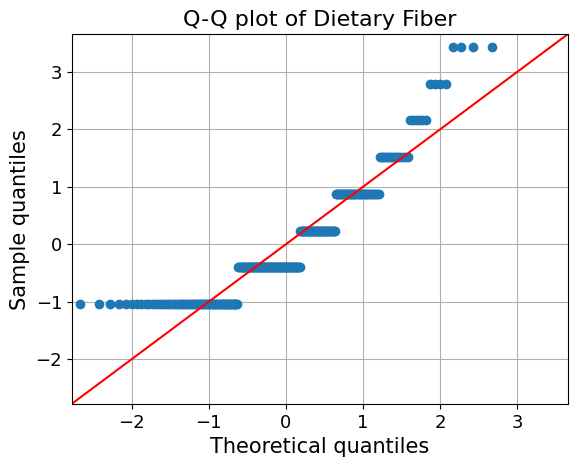

<Figure size 800x500 with 0 Axes>

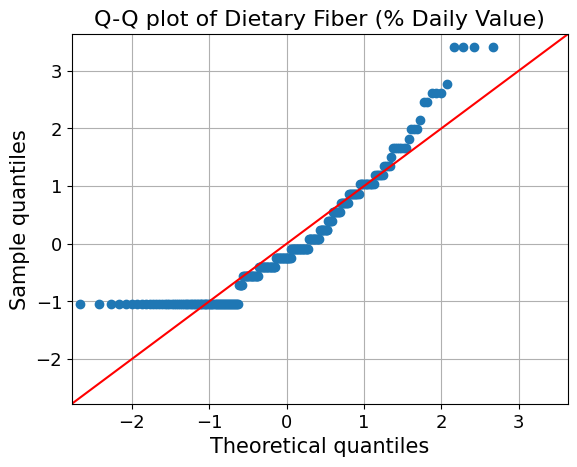

<Figure size 800x500 with 0 Axes>

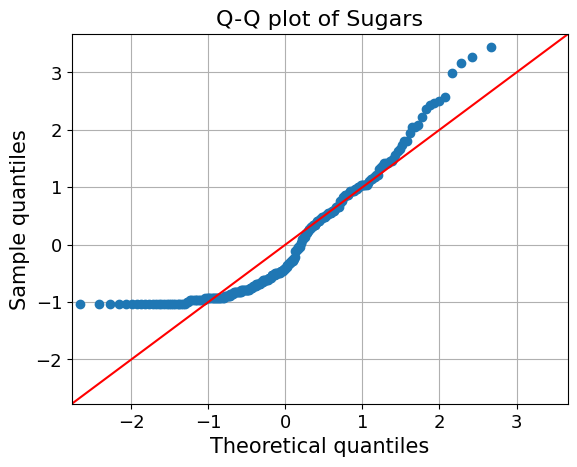

<Figure size 800x500 with 0 Axes>

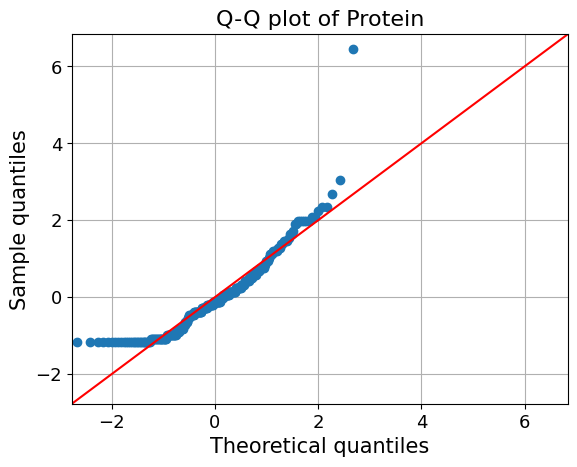

<Figure size 800x500 with 0 Axes>

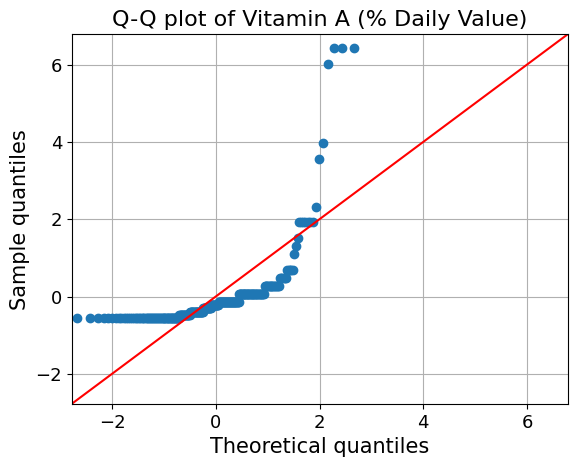

<Figure size 800x500 with 0 Axes>

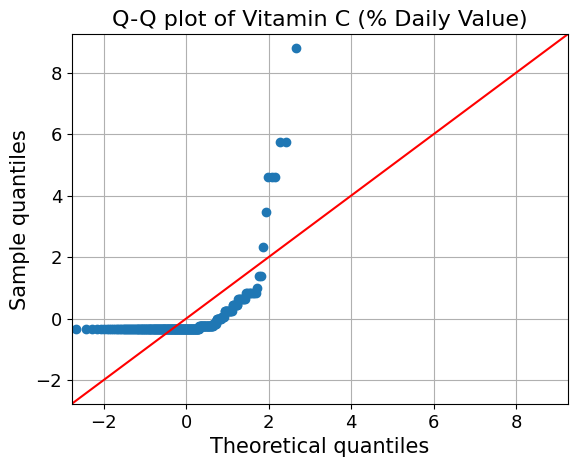

<Figure size 800x500 with 0 Axes>

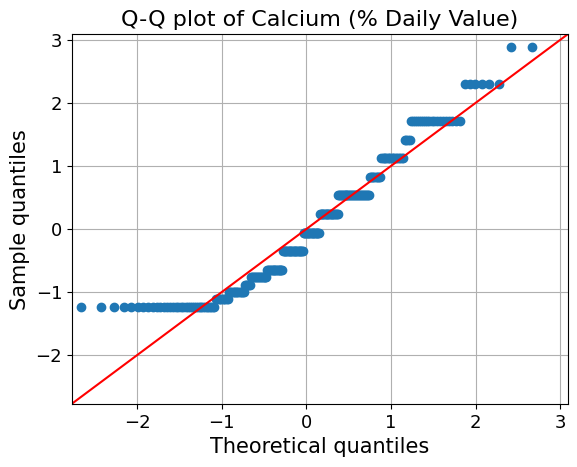

<Figure size 800x500 with 0 Axes>

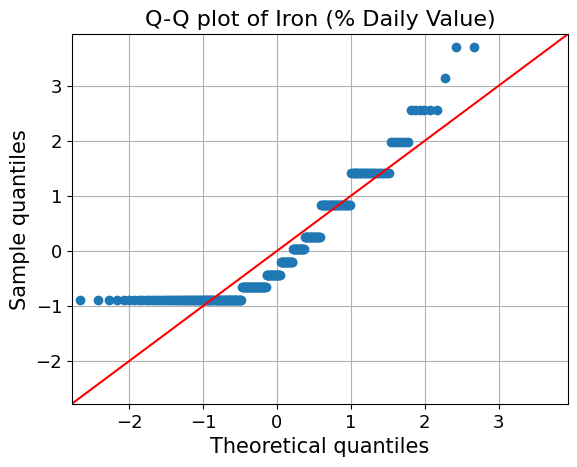

In [ ]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = df[
    [
    "Serving Size","Calories", "Calories from Fat", "Total Fat", "Total Fat (% Daily Value)",
    "Saturated Fat", "Saturated Fat (% Daily Value)", "Trans Fat", "Cholesterol",
    "Cholesterol (% Daily Value)", "Sodium", "Sodium (% Daily Value)", "Carbohydrates",
    "Carbohydrates (% Daily Value)", "Dietary Fiber", "Dietary Fiber (% Daily Value)",
    "Sugars", "Protein", "Vitamin A (% Daily Value)", "Vitamin C (% Daily Value)",
    "Calcium (% Daily Value)", "Iron (% Daily Value)"
]
]

for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

It can be inferred from the QQ plots that most of the numerical data distribution are skewed. However features like carbohydrates, protein almost depict normal distribution with some outliers.

In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Serving Size  Calories  Calories from Fat  \
Serving Size                       1.000000  0.634260           0.723090   
Calories                           0.634260  1.000000           0.904588   
Calories from Fat                  0.723090  0.904588           1.000000   
Total Fat                          0.722048  0.904409           0.999663   
Total Fat (% Daily Value)          0.721936  0.904123           0.999725   
Saturated Fat                      0.481414  0.845564           0.847008   
Saturated Fat (% Daily Value)      0.485480  0.847631           0.849592   
Trans Fat                          0.182214  0.522441           0.433686   
Cholesterol                        0.488889  0.596399           0.682161   
Cholesterol (% Daily Value)        0.487938  0.595208           0.681607   
Sodium                             0.800754  0.712309           0.846624   
Sodium (% Daily Value)             0.800482  0.713415           0.847276   
Carbohydrates                      0.228204  0.781539           0.461672   
Carbohydrates (% Daily Value)      0.227167  0.781242           0.461463   
Dietary Fiber                      0.709638  0.538894           0.581274   
Dietary Fiber (% Daily Value)      0.714702  0.540014           0.575621   
Sugars                            -0.310909  0.259598          -0.115285   
Protein                            0.743394  0.787847           0.807913   
Vitamin A (% Daily Value)          0.287114  0.108844           0.056731   
Vitamin C (% Daily Value)          0.109594 -0.068747          -0.087331   
Calcium (% Daily Value)           -0.017601  0.428426           0.161034   
Iron (% Daily Value)               0.779157  0.643552           0.735894   

                               Total Fat  Total Fat (% Daily Value)  \
Serving Size                    0.722048                   0.721936   
Calories                        0.904409                   0.904123   
Calories from Fat               0.999663                   0.999725   
Total Fat                       1.000000                   0.999765   
Total Fat (% Daily Value)       0.999765                   1.000000   
Saturated Fat                   0.846707                   0.847379   
Saturated Fat (% Daily Value)   0.849293                   0.849973   
Trans Fat                       0.431453                   0.433016   
Cholesterol                     0.680547                   0.680940   
Cholesterol (% Daily Value)     0.680000                   0.680378   
Sodium                          0.846158                   0.846728   
Sodium (% Daily Value)          0.846780                   0.847368   
Carbohydrates                   0.461213                   0.460516   
Carbohydrates (% Daily Value)   0.461005                   0.460298   
Dietary Fiber                   0.580837                   0.580592   
Dietary Fiber (% Daily Value)   0.575206                   0.575033   
Sugars                         -0.115446                  -0.115761   
Protein                         0.807773                   0.807922   
Vitamin A (% Daily Value)       0.054434                   0.054038   
Vitamin C (% Daily Value)      -0.089354                  -0.089353   
Calcium (% Daily Value)         0.162860                   0.162031   
Iron (% Daily Value)            0.734685                   0.735478   

                               Saturated Fat  Saturated Fat (% Daily Value)  \
Serving Size                        0.481414                       0.485480   
Calories                            0.845564                       0.847631   
Calories from Fat                   0.847008                       0.849592   
Total Fat                           0.846707                       0.849293   
Total Fat (% Daily Value)           0.847379                       0.849973   
Saturated Fat                       1.000000                       0.999279   
Saturated Fat (% Daily Value)       0.999279                       1.000000   
Trans Fat       

<ipython-input-8-48b25d85b87b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")


<Axes: >

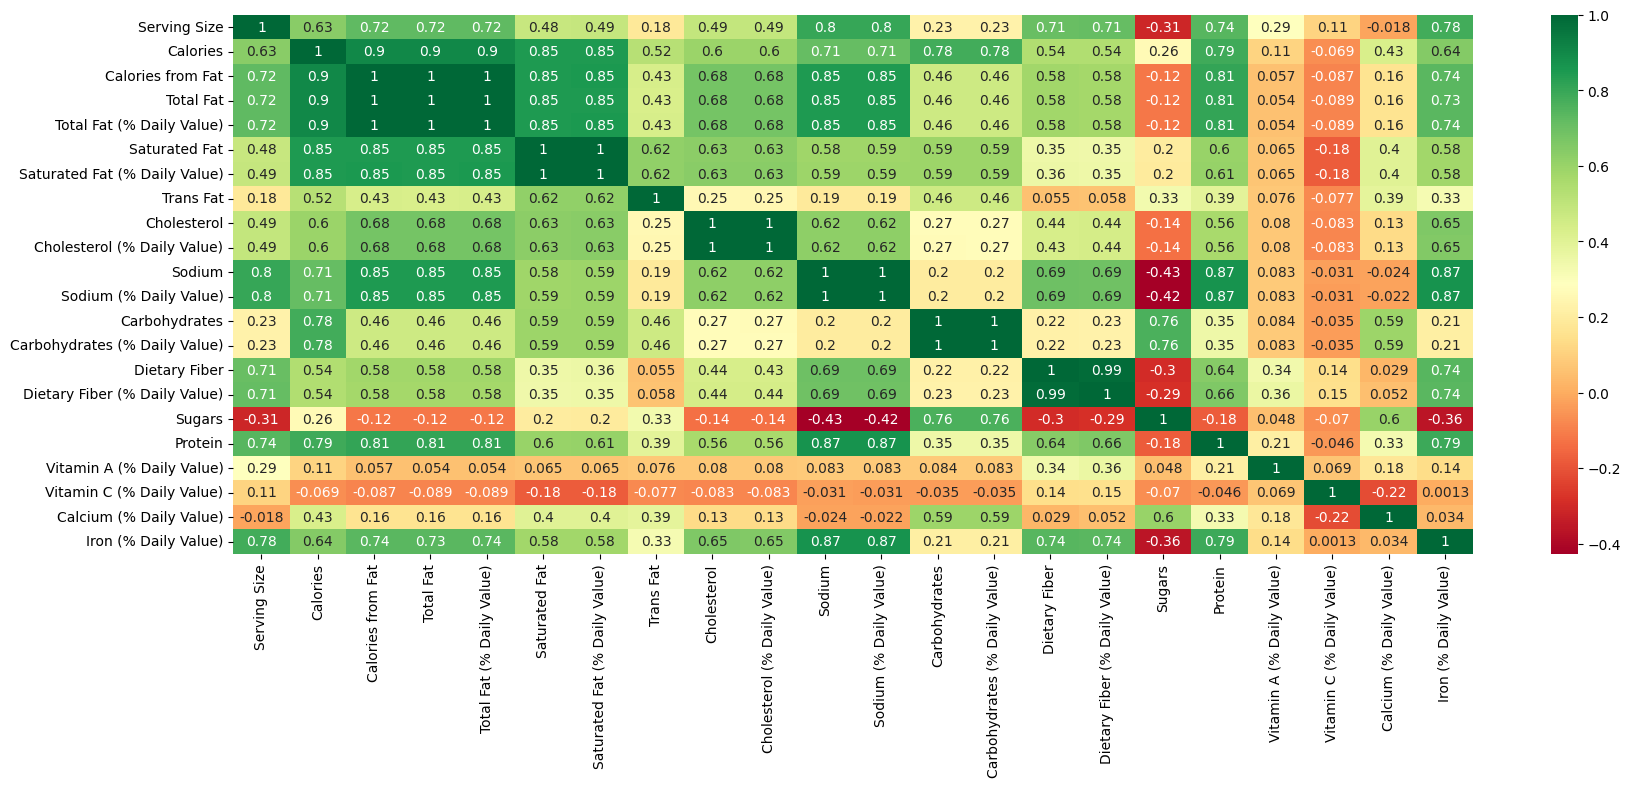

In [ ]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

Sodium and calories contribute most in predicting the calories

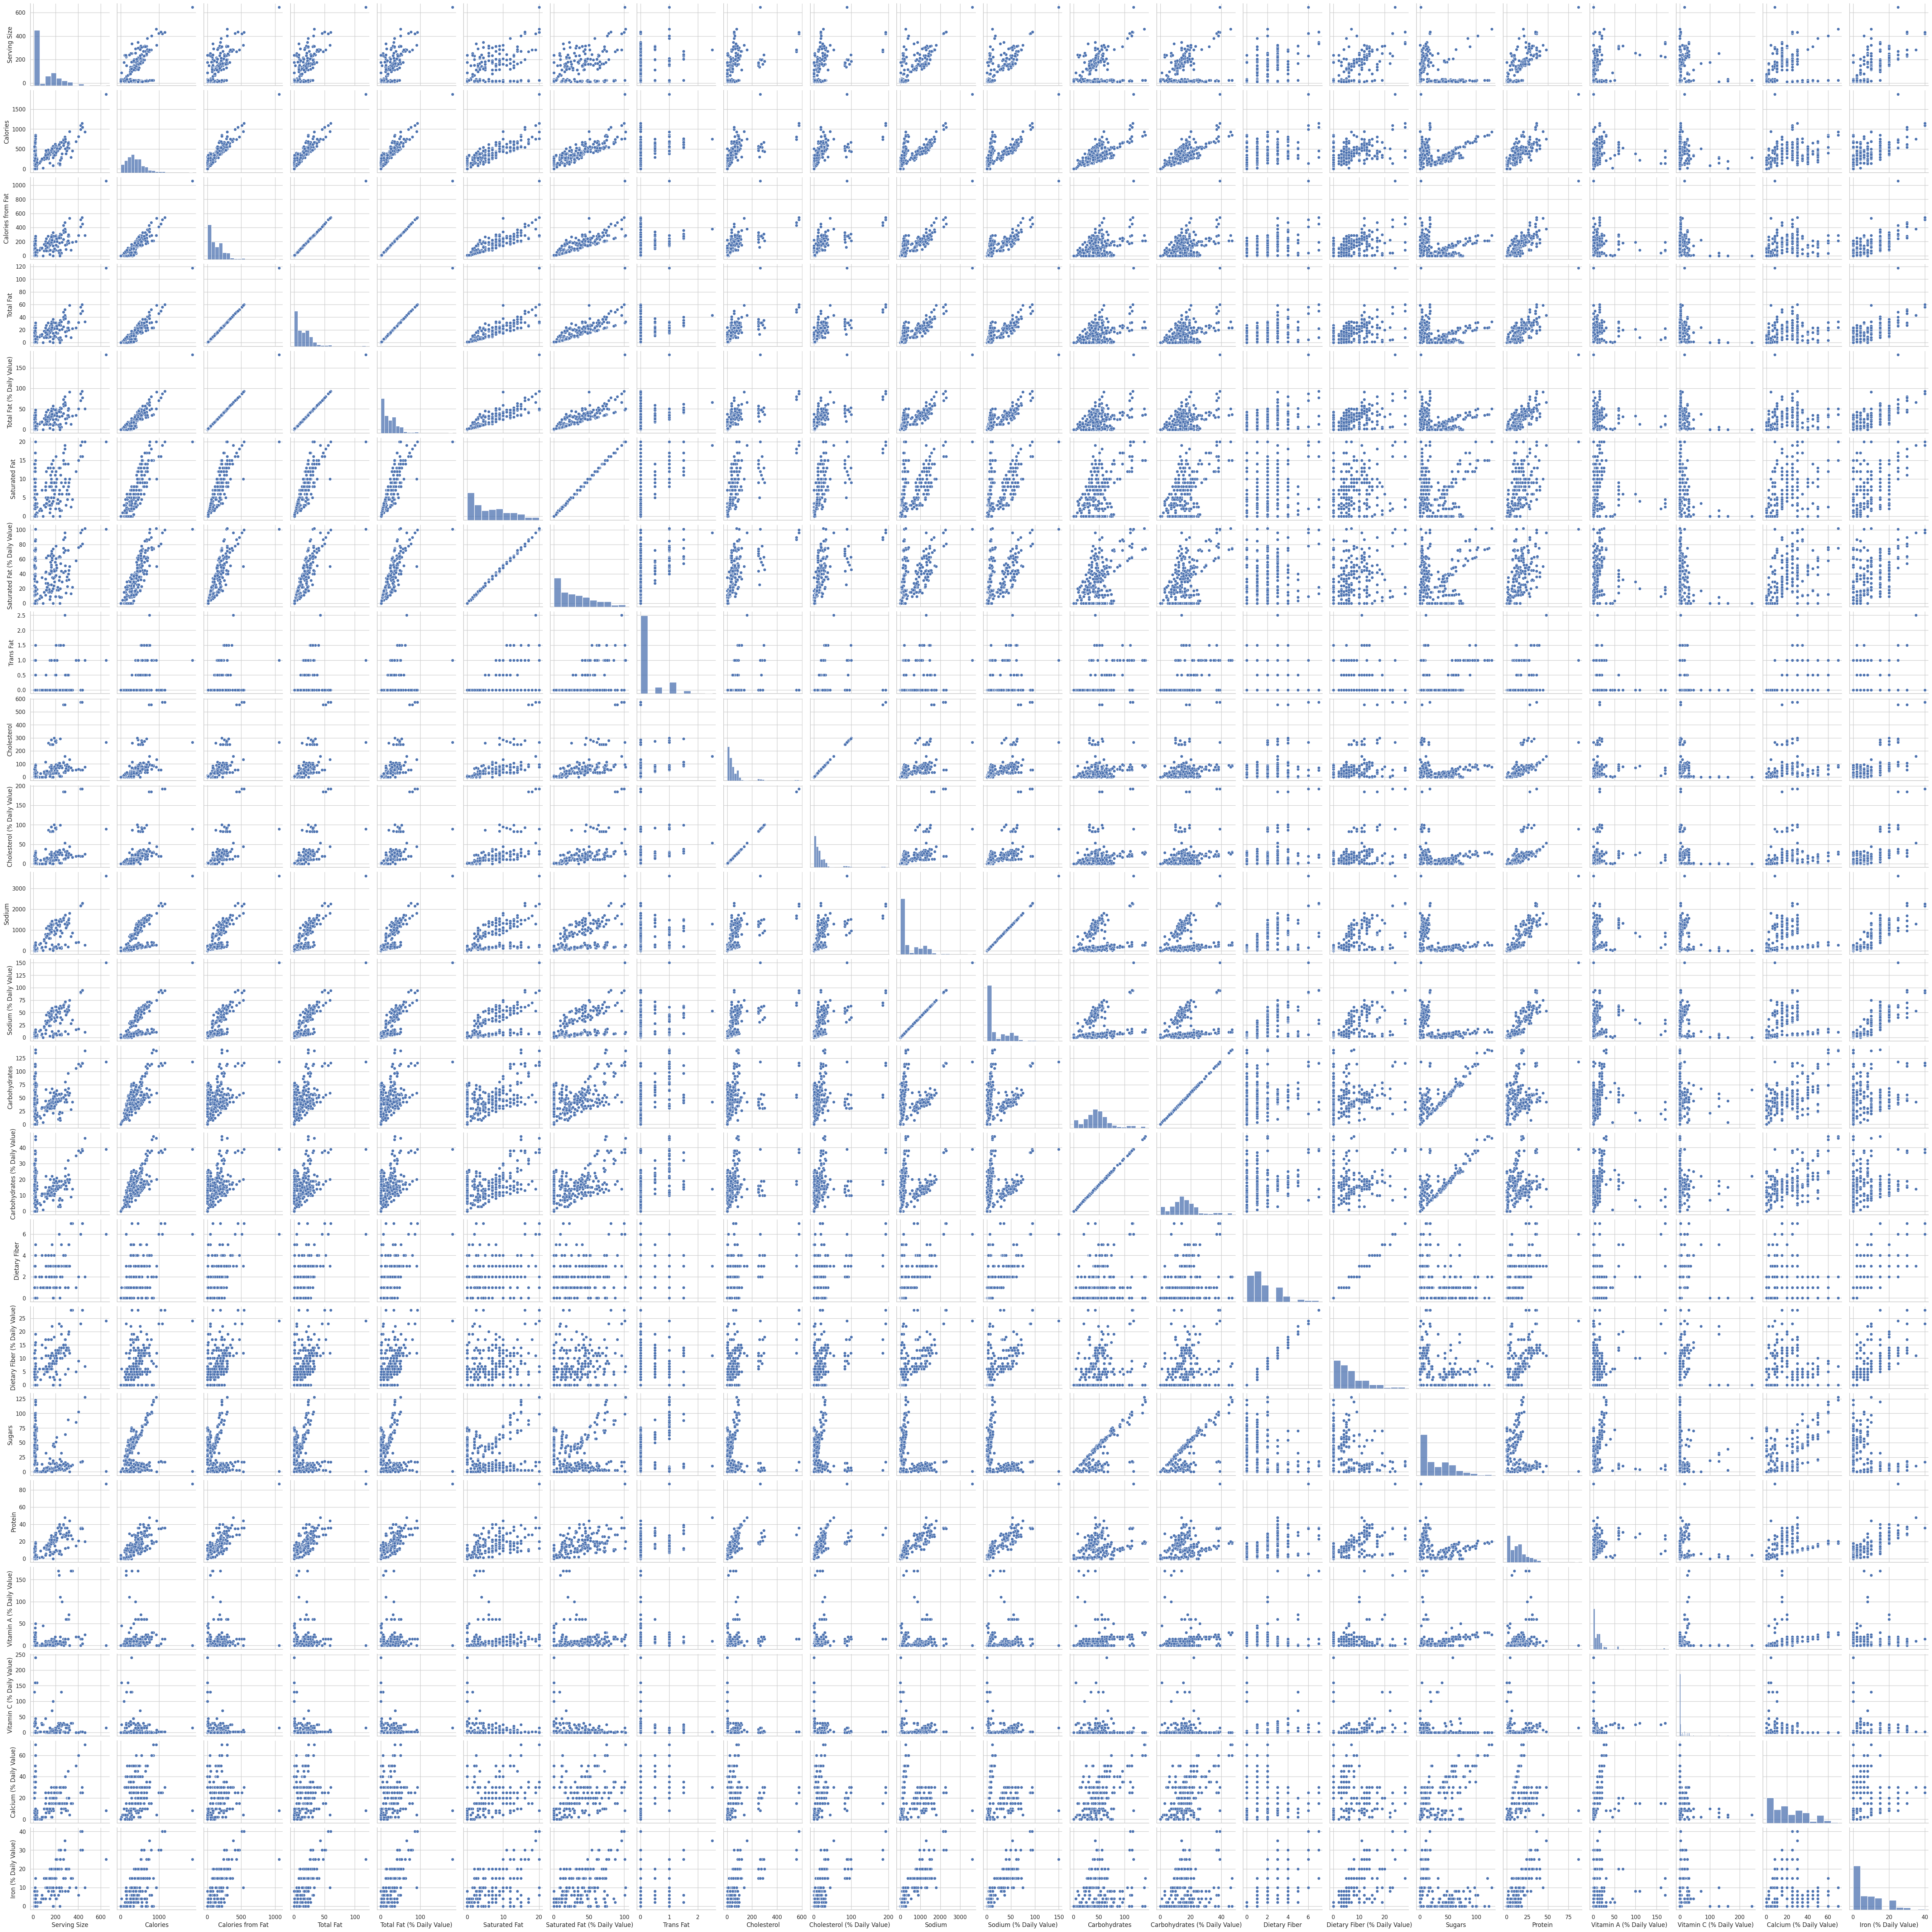

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

X = df[
    [
        "Serving Size","Calories from Fat", "Total Fat", "Total Fat (% Daily Value)",
    "Saturated Fat", "Saturated Fat (% Daily Value)", "Trans Fat", "Cholesterol",
    "Cholesterol (% Daily Value)", "Sodium", "Sodium (% Daily Value)", "Carbohydrates",
    "Carbohydrates (% Daily Value)", "Dietary Fiber", "Dietary Fiber (% Daily Value)",
    "Sugars", "Protein", "Vitamin A (% Daily Value)", "Vitamin C (% Daily Value)",
    "Calcium (% Daily Value)", "Iron (% Daily Value)"
    ]
]

y = df["Calories"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

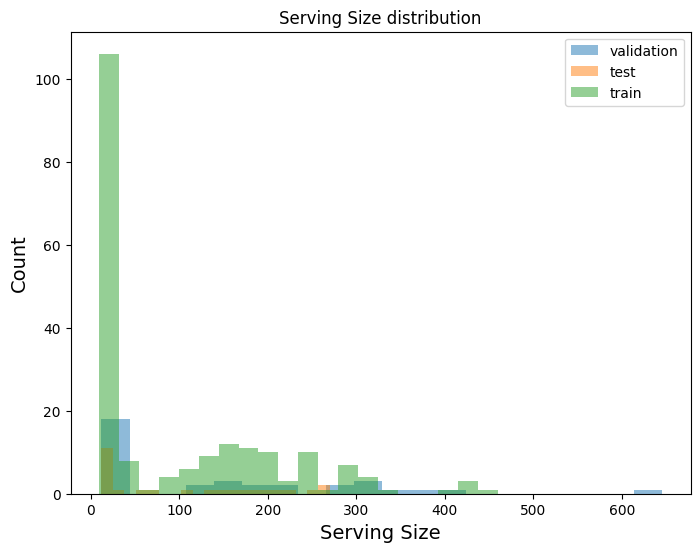

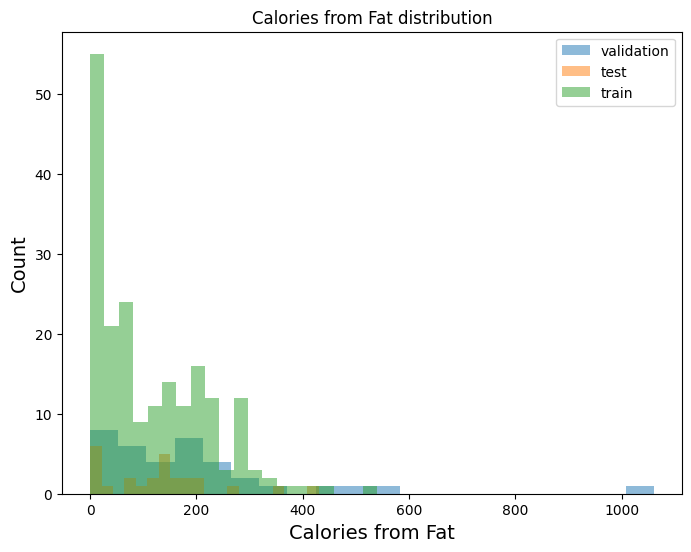

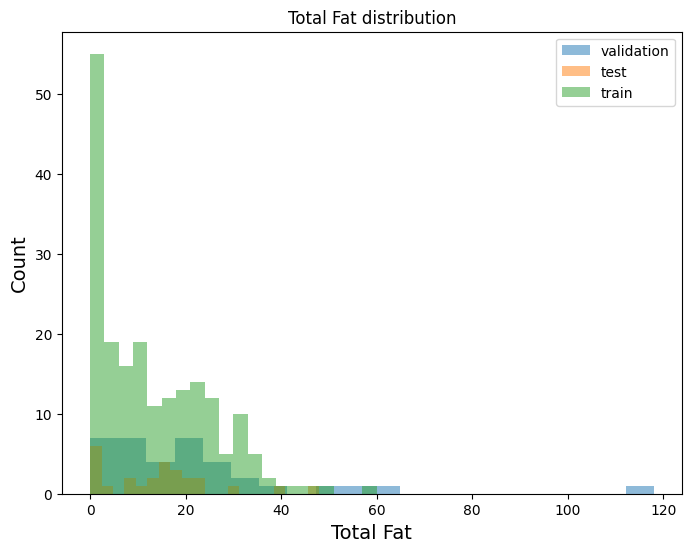

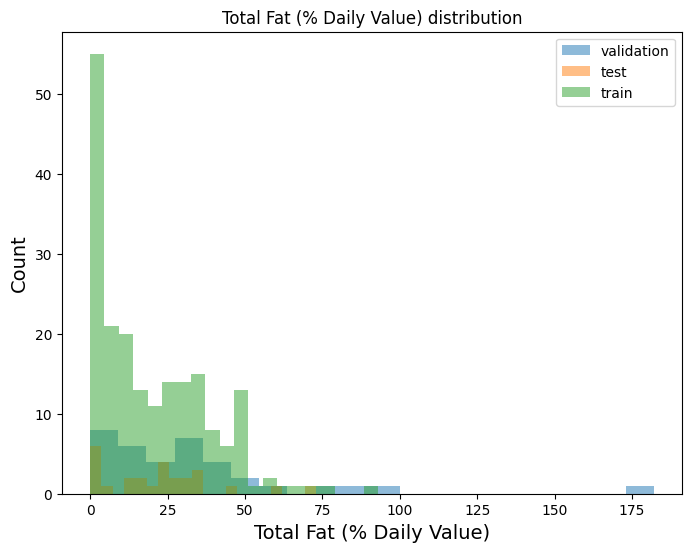

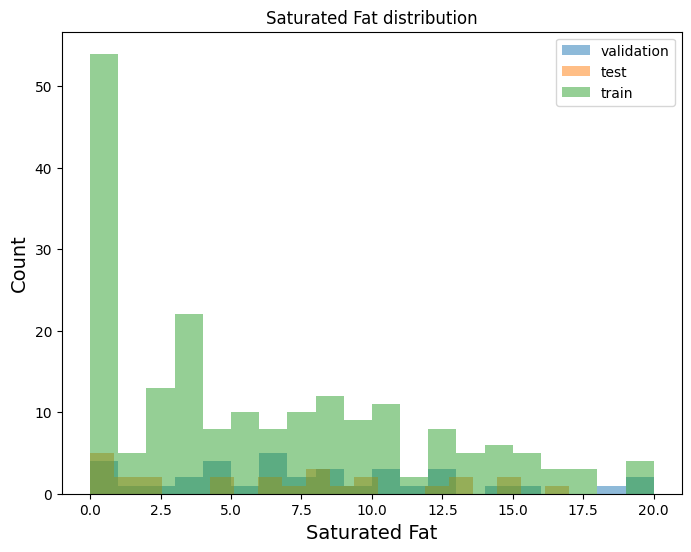

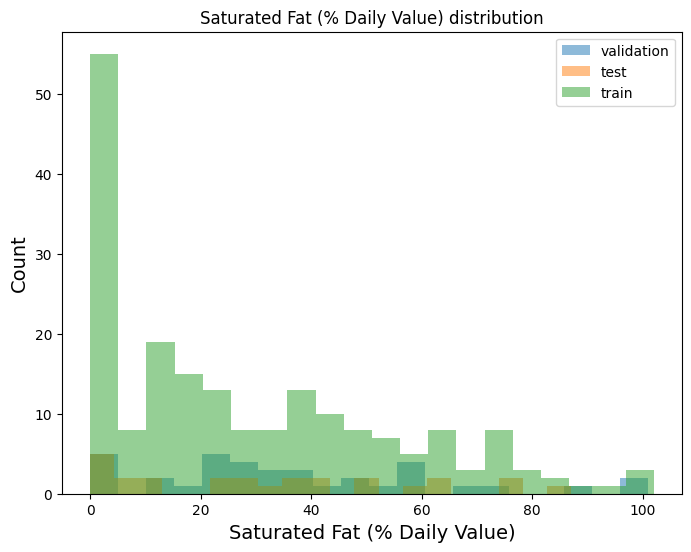

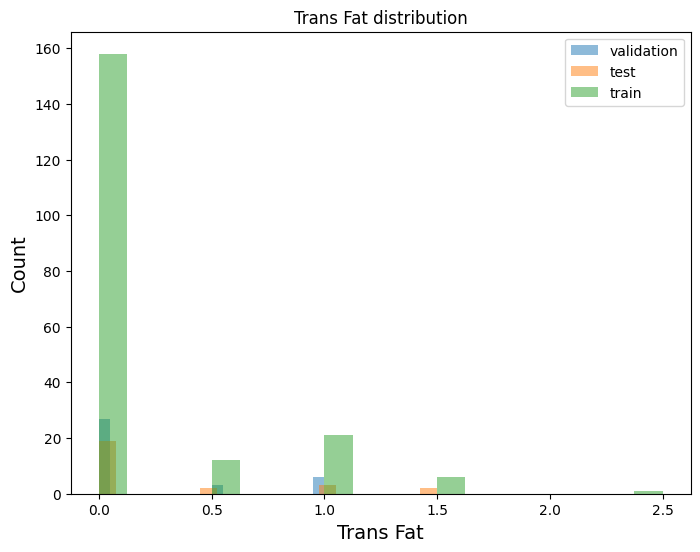

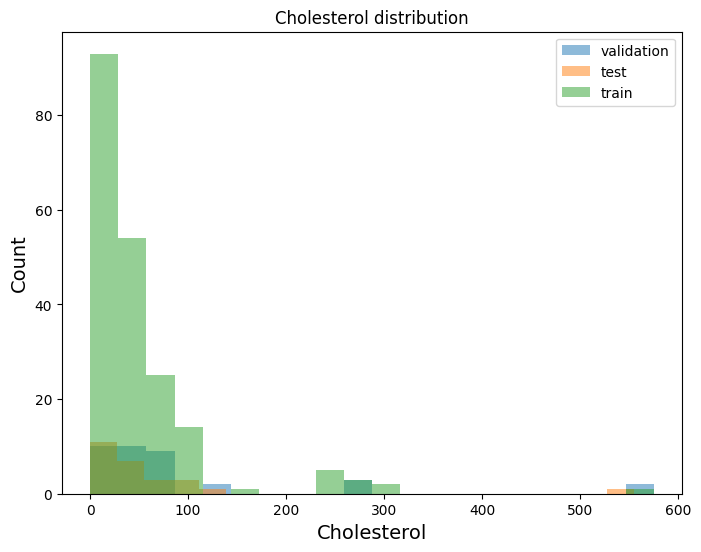

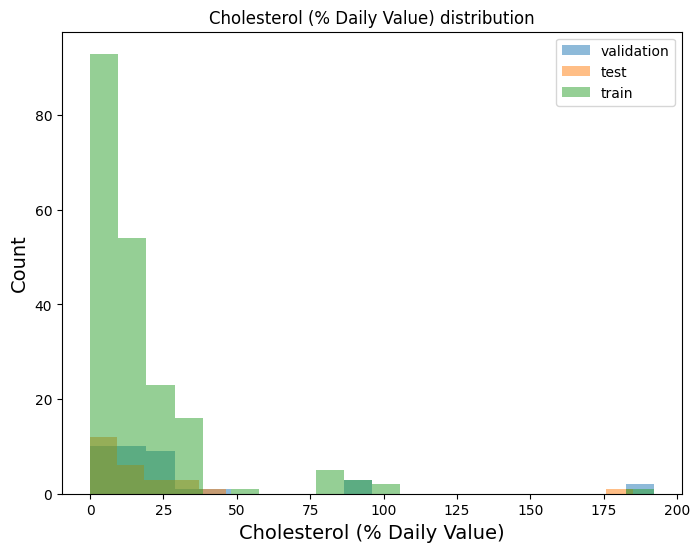

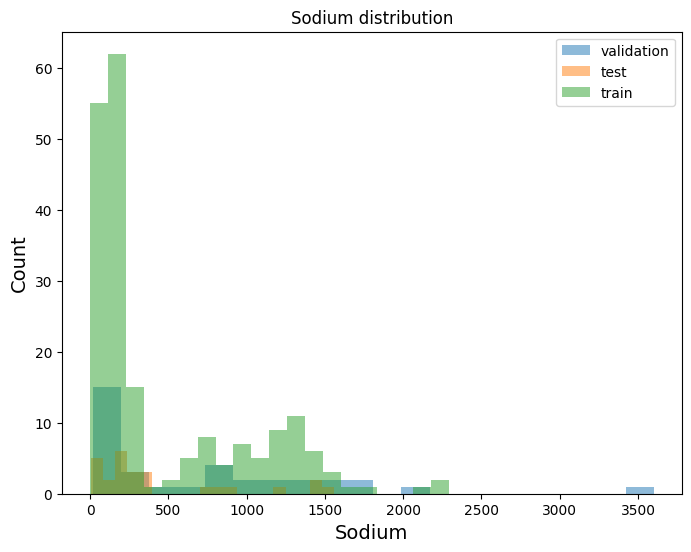

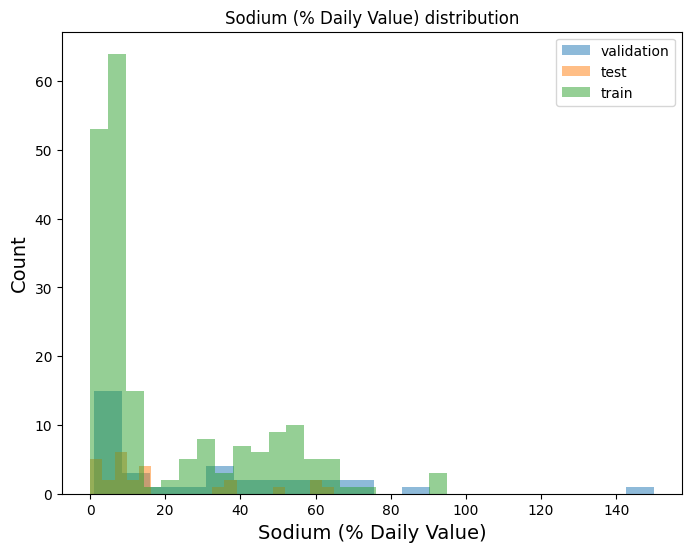

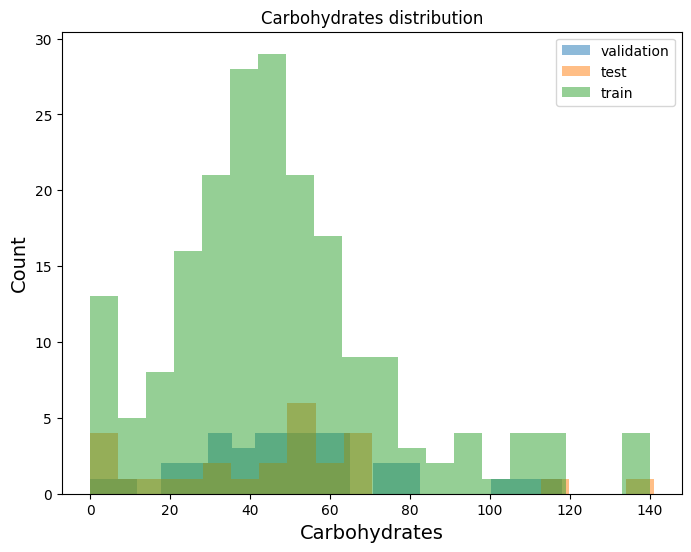

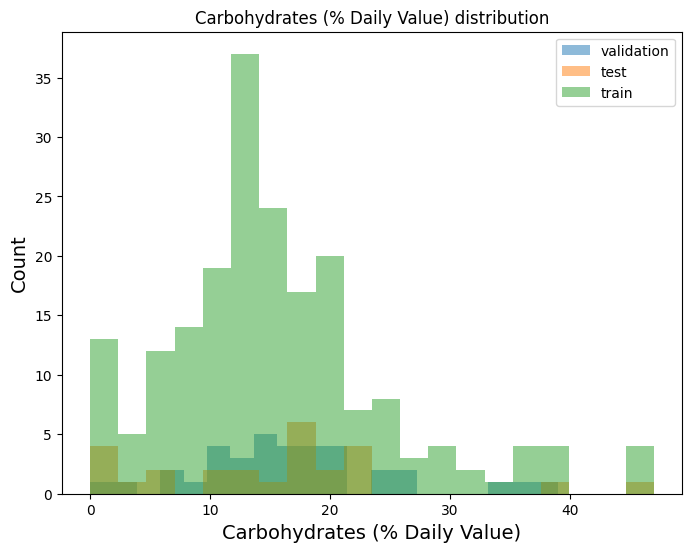

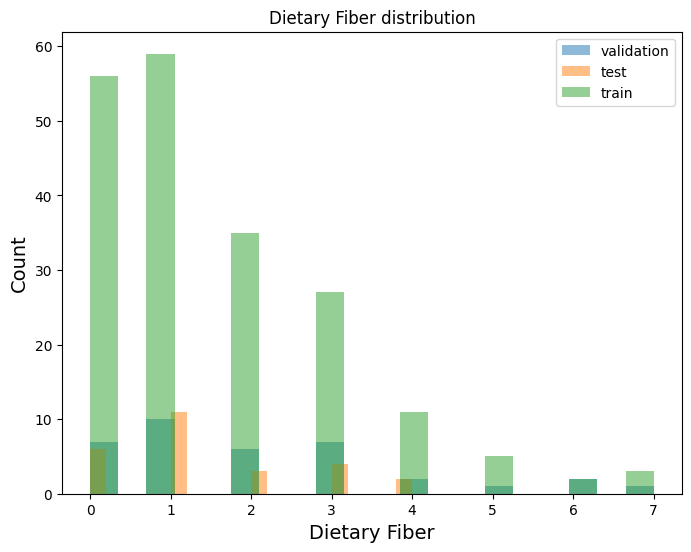

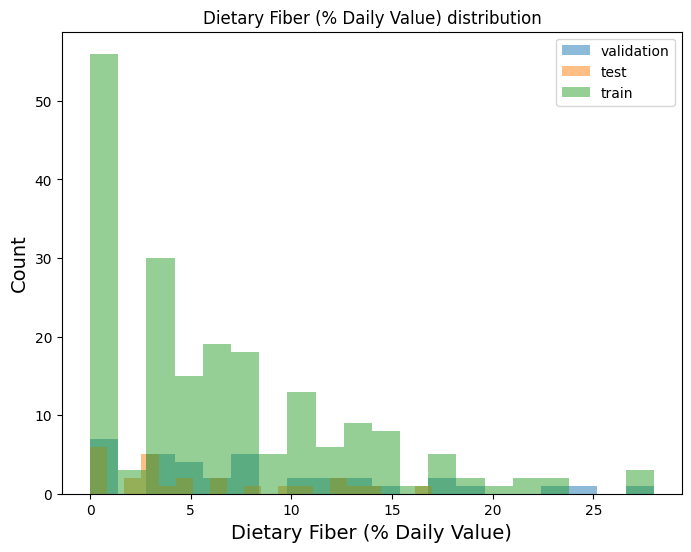

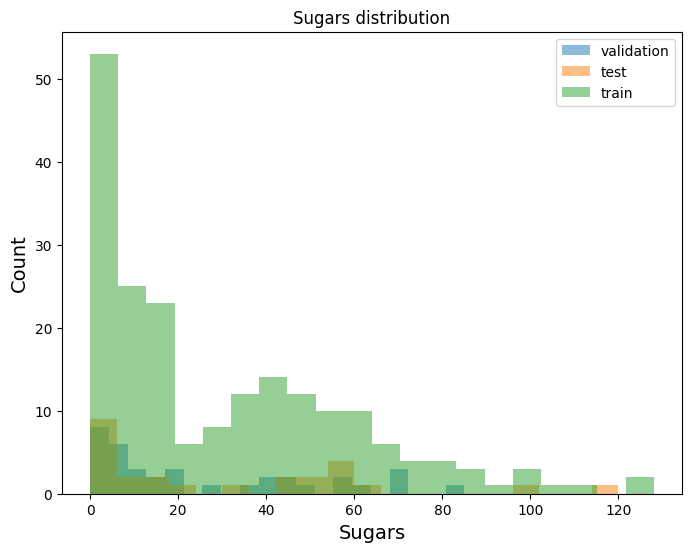

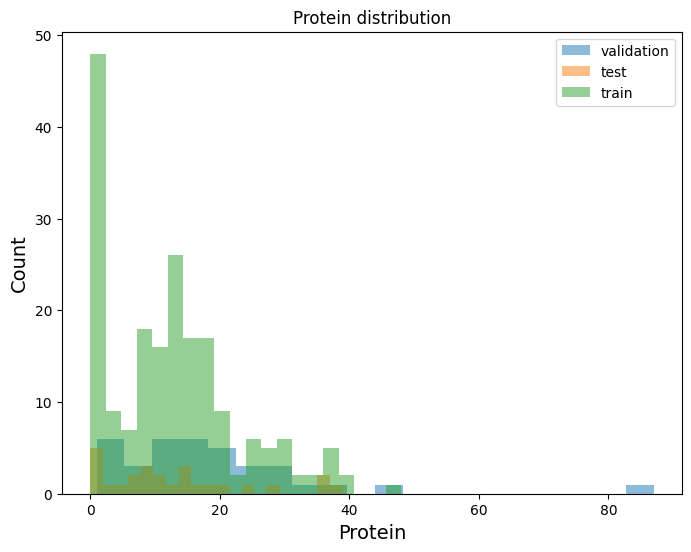

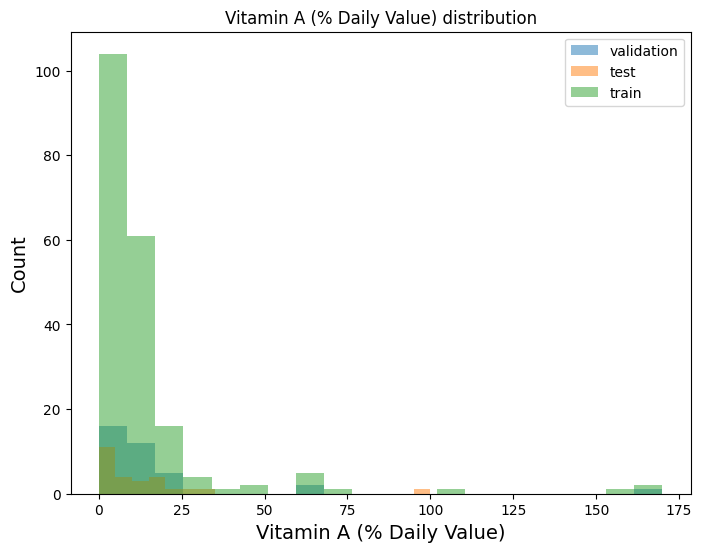

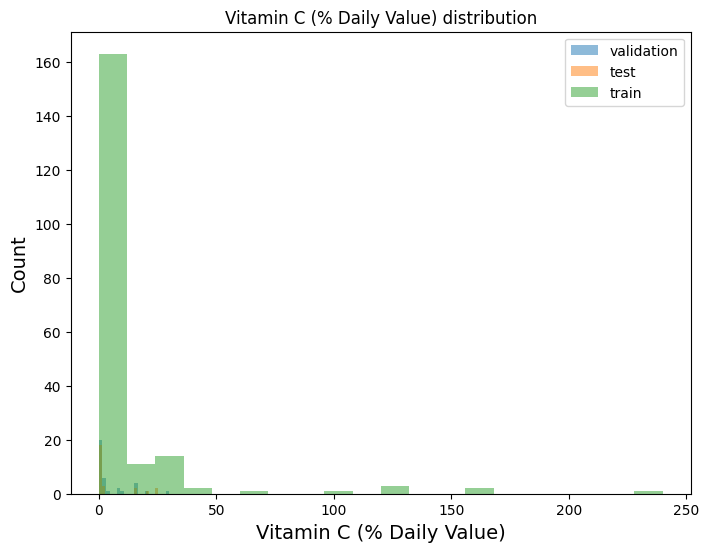

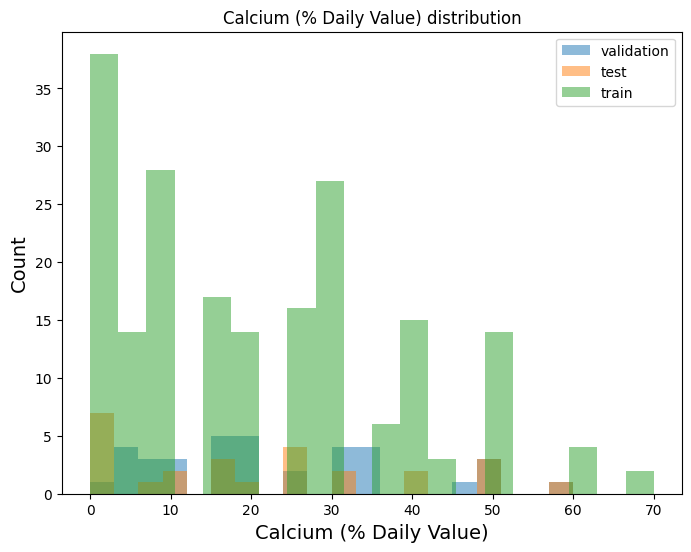

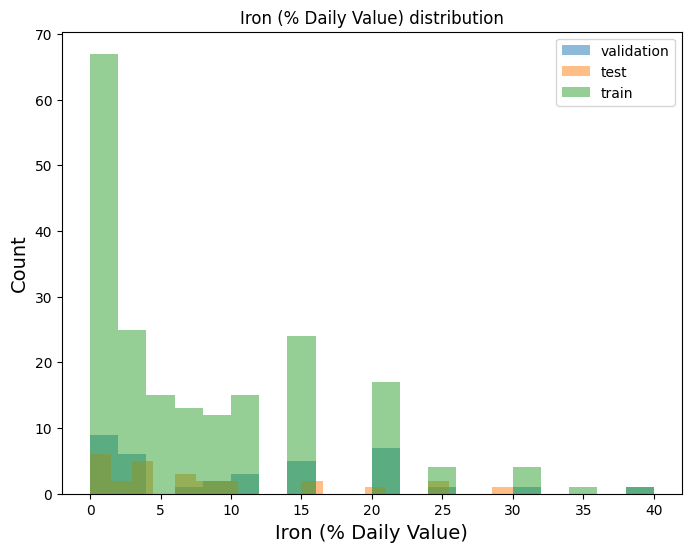

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
       "Serving Size", "Calories from Fat", "Total Fat", "Total Fat (% Daily Value)",
    "Saturated Fat", "Saturated Fat (% Daily Value)", "Trans Fat", "Cholesterol",
    "Cholesterol (% Daily Value)", "Sodium", "Sodium (% Daily Value)", "Carbohydrates",
    "Carbohydrates (% Daily Value)", "Dietary Fiber", "Dietary Fiber (% Daily Value)",
    "Sugars", "Protein", "Vitamin A (% Daily Value)", "Vitamin C (% Daily Value)",
    "Calcium (% Daily Value)", "Iron (% Daily Value)"
    ]
]

X_val_plot = X_val[
    [
      "Serving Size", "Calories from Fat", "Total Fat", "Total Fat (% Daily Value)",
    "Saturated Fat", "Saturated Fat (% Daily Value)", "Trans Fat", "Cholesterol",
    "Cholesterol (% Daily Value)", "Sodium", "Sodium (% Daily Value)", "Carbohydrates",
    "Carbohydrates (% Daily Value)", "Dietary Fiber", "Dietary Fiber (% Daily Value)",
    "Sugars", "Protein", "Vitamin A (% Daily Value)", "Vitamin C (% Daily Value)",
    "Calcium (% Daily Value)", "Iron (% Daily Value)"
    ]
]

X_train_plot = X_train[
    [
     "Serving Size","Calories from Fat", "Total Fat", "Total Fat (% Daily Value)",
    "Saturated Fat", "Saturated Fat (% Daily Value)", "Trans Fat", "Cholesterol",
    "Cholesterol (% Daily Value)", "Sodium", "Sodium (% Daily Value)", "Carbohydrates",
    "Carbohydrates (% Daily Value)", "Dietary Fiber", "Dietary Fiber (% Daily Value)",
    "Sugars", "Protein", "Vitamin A (% Daily Value)", "Vitamin C (% Daily Value)",
    "Calcium (% Daily Value)", "Iron (% Daily Value)"
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

In [ ]:
In the predictor variables independent of all the other predictor variables?

Object `variables` not found.


In [ ]:
import numpy as np

corr= df.corr(method='pearson')

#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(corr)
multicollinearity

<ipython-input-13-bf048308ba5e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr(method='pearson')


array([1.16116296e+01, 3.91046960e+00, 1.71734015e+00, 1.04133475e+00,
       9.32469225e-01, 8.24469360e-01, 5.62355395e-01, 4.67176102e-01,
       3.77089207e-01, 2.25752771e-01, 1.84048556e-01, 6.20288644e-02,
       4.95945031e-02, 1.99613456e-02, 1.21654151e-02, 6.93733287e-04,
       4.61099005e-04, 3.26149045e-04, 6.21890844e-05, 2.32908476e-04,
       2.04495852e-04, 1.34543556e-04])

Some of the eigen values are close to zero. It means that there is some multicollinearity, so they are highly related

## Linear Regression
what predictor variables are the most important

Some of the eigen values are close to zero. It means that there is some multicollinearity, so they are highly related

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 21.93
Coefficient of determination: 1.00
R^2 score on tarining set = 0.9995287338094971


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 27.50
Coefficient of determination: 1.00
R^2 score on test set = 0.9994885607653046


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 31.60
Coefficient of determination: 1.00
R^2 score on validation set = 0.9997091597225137


In [ ]:
# Understanding the important features
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=9e5a35d86a7ff676923ce7a75dd2fdfd34953f8729488d699b71e53b225d074a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


The most important predictor variable is Carbohydrates

<ipython-input-21-7b2dcd6696fa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='viridis')


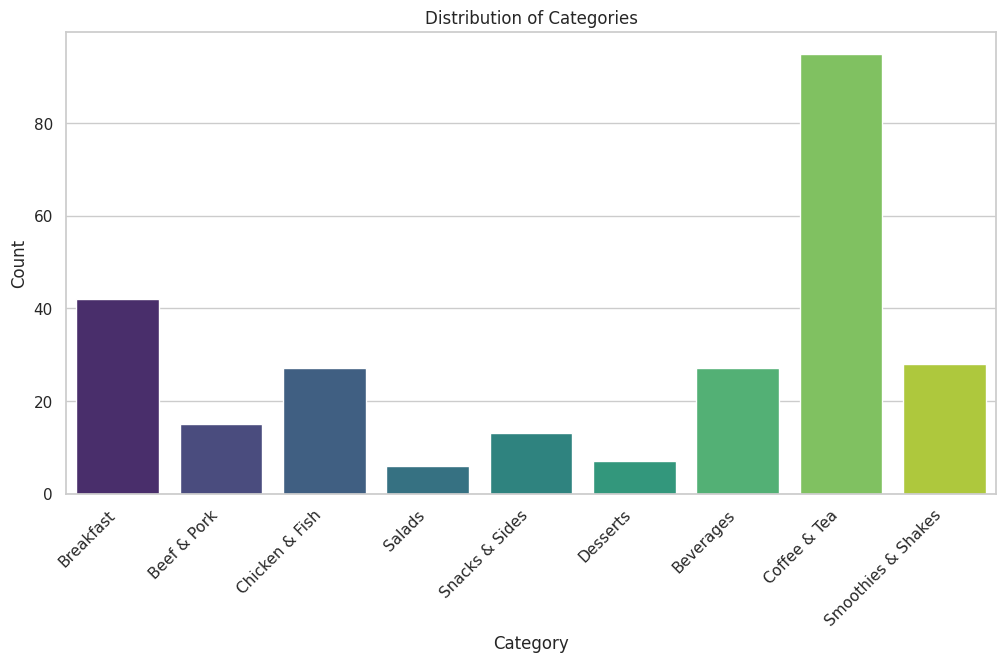

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'path' is the path to your CSV file
df = pd.read_csv(path)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a count plot for 'Category'
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# # Create a count plot for 'Item'
# plt.figure(figsize=(12, 6))
# sns.countplot(x='Item', data=df, palette='viridis', order=df['Item'].value_counts().index)
# plt.title('Distribution of Items')
# plt.xlabel('Item')
# plt.ylabel('Count')
# plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# # Show the plot
# plt.show()


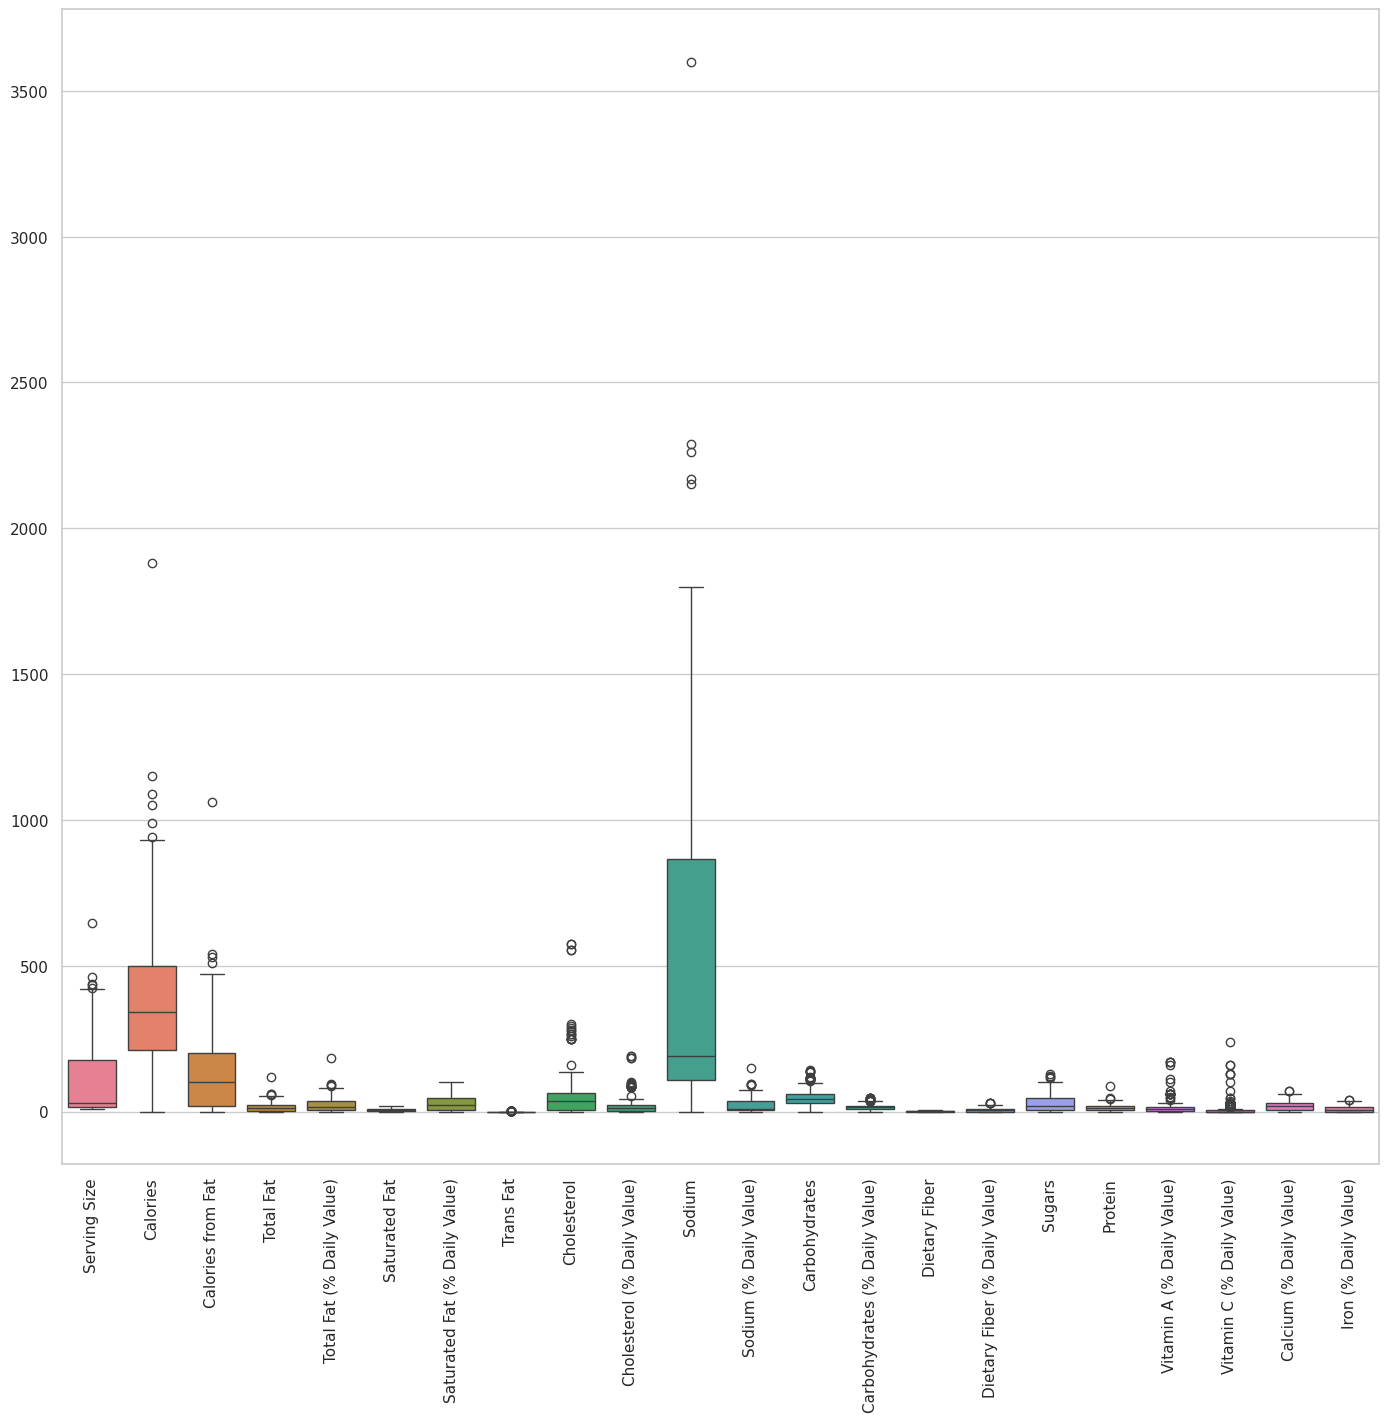

<ipython-input-29-98f7ee54077d>:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-29-98f7ee54077d>:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-29-98f7ee54077d>:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)


In [ ]:
# Plot boxplots for all numerical columns
plt.figure(figsize=(17, 15))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Step 1: Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

In [ ]:
# Step 1: Remove outliers from the encoded dataset
refined_df = df[~outliers]

# Step 2: Encode categorical variables in features
X_cleaned_encoded = pd.get_dummies(refined_df.drop(columns=["Calories"]))

# Step 3: Split the cleaned encoded dataset into 80% training and 20% temporary data
X_train_encoded, X_temp_test_encoded, y_train_encoded, y_temp_test_encoded = train_test_split(X_cleaned_encoded, refined_df["Calories"], test_size=0.2, random_state=42)

# Step 4: Further split the temporary data into 50% validation and 50% test sets
X_val_encoded, X_test_encoded, y_val_encoded, y_test_encoded = train_test_split(X_temp_test_encoded, y_temp_test_encoded, test_size=0.5, random_state=42)

# Step 5: Initialize and fit the linear regression model on the cleaned training data
model_cleaned_encoded = LinearRegression()
model_cleaned_encoded.fit(X_train_encoded, y_train_encoded)

# Step 6: Make predictions on the cleaned testing and training data
y_pred_test_encoded = model_cleaned_encoded.predict(X_test_encoded)
y_pred_train_encoded = model_cleaned_encoded.predict(X_train_encoded)

# Step 7: Evaluate the model performance on the cleaned testing data
mse_cleaned_encoded = mean_squared_error(y_test_encoded, y_pred_test_encoded)
r2_train_encoded = r2_score(y_train_encoded, y_pred_train_encoded)
r2_test_encoded = r2_score(y_test_encoded, y_pred_test_encoded)

print("Mean Squared Error (Cleaned, Encoded):", mse_cleaned_encoded)
print("R-squared (Cleaned (Test), Encoded):", r2_test_encoded)
print("R-squared (Cleaned (Train), Encoded):", r2_train_encoded)


Mean Squared Error (Cleaned, Encoded): 23.73591440153036
R-squared (Cleaned (Test), Encoded): 0.9990347422460657
R-squared (Cleaned (Train), Encoded): 1.0


Mean squared is errror is between the test and training data sets(with outliers)

In [ ]:
from sklearn.impute import KNNImputer
# Function to remove a specified percentage of data points from a numerical column
def remove_percentage_of_data(df, column, percentage):
    total_data_points = len(df[column])
    remove_percentage = int(total_data_points * percentage)
    remove_indices = np.random.choice(total_data_points, remove_percentage, replace=False)
    df.loc[remove_indices, column] = np.nan
    return df

# Function to perform imputation
def perform_imputation(df, column_name, imputation_method):
    imputed_df = df.copy()
    if imputation_method == "Mean":
        imputed_df[column_name].fillna(imputed_df[column_name].mean(), inplace=True)
    elif imputation_method == "Median":
        imputed_df[column_name].fillna(imputed_df[column_name].median(), inplace=True)
    elif imputation_method == "KNN":
        knn_imputer = KNNImputer()
        imputed_df[column_name] = knn_imputer.fit_transform(imputed_df[[column_name]]).ravel()
    return imputed_df

# Function to calculate errors
def calculate_errors(df, column_name, imputation_method):
    imputed_df = perform_imputation(df, column_name, imputation_method)
    true_median = df[column_name].median()
    true_mean = df[column_name].mean()
    true_variance = df[column_name].var()
    if imputation_method == "Median":
        imputed_value = imputed_df[column_name].median()
    else:
        imputed_value = imputed_df[column_name].mean()
    bias = true_median - imputed_value if imputation_method == "Median" else true_mean - imputed_value
    residuals_before = df[column_name] - (true_median if imputation_method == "Median" else true_mean)
    residuals_after = df[column_name] - imputed_value
    residuals_error = abs(residuals_after - residuals_before) / abs(residuals_before) * 100
    imputed_variance = imputed_df[column_name].var()
    print("Imputation Method:", imputation_method)
    print("Bias:", bias)
    print("Variance before imputation:", true_variance)
    print("Variance after imputation:", imputed_variance)
    print("Percentage Error on Residuals:", residuals_error)
    print("\n")

# Function to perform the entire process for different percentages
def process_for_percentages(df, column_name):
    for percentage in [0.01, 0.05, 0.1]:
        print(f"Removing {percentage * 100}% of data points...")
        test_df = remove_percentage_of_data(df.copy(), column_name, percentage)
        print("Calculating errors after imputation:")
        calculate_errors(test_df, column_name, "Mean")
        calculate_errors(test_df, column_name, "Median")
        calculate_errors(test_df, column_name, "KNN")
        print("\n")

# Main code

# Make a copy of df_copy (Original) dataframe
test1_df= df.copy()

# Select a numerical column at random
numerical_cols = test1_df.select_dtypes(include=[np.number]).columns
selected_column = np.random.choice(numerical_cols)

# Process for different percentages
process_for_percentages(test1_df, selected_column)


Removing 1.0% of data points...
Calculating errors after imputation:
Imputation Method: Mean
Bias: 0.0
Variance before imputation: 58006.7098000181
Variance after imputation: 57558.7815390141
Percentage Error on Residuals: 0      NaN
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
255    0.0
256    0.0
257    0.0
258    0.0
259    0.0
Name: Calories, Length: 260, dtype: float64


Imputation Method: Median
Bias: 0.0
Variance before imputation: 58006.7098000181
Variance after imputation: 57565.36085536085
Percentage Error on Residuals: 0      NaN
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
255    0.0
256    0.0
257    NaN
258    0.0
259    0.0
Name: Calories, Length: 260, dtype: float64


Imputation Method: KNN
Bias: 0.0
Variance before imputation: 58006.7098000181
Variance after imputation: 57558.7815390141
Percentage Error on Residuals: 0      NaN
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
255    0.0
256    0.0
257    0.0
258    0.0
259    0.0
Name: Calori

In [ ]:

!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future


In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={"figure.figsize": (16, 8)})
min_mem_size=6
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

2


In [ ]:
dff.head()

Serving Size  Calories  Calories from Fat  Total Fat  \
0           136       300                120       13.0   
1           135       250                 70        8.0   
2           111       370                200       23.0   
3           161       450                250       28.0   
4           161       400                210       23.0   

   Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  \
0                         20            5.0                             25   
1                         12            3.0                             15   
2                         35            8.0                             42   
3                         43           10.0                             52   
4                         35            8.0                             42   

   Trans Fat  Cholesterol  Cholesterol (% Daily Value)  ...  Carbohydrates  \
0        0.0          260                           87  ...             31   
1        0.0           25                            8  ...             30   
2        0.0           45                           15  ...             29   
3        0.0          285                           95  ...             30   
4        0.0           50                           16  ...             30   

   Carbohydrates (% Daily Value)  Dietary Fiber  \
0                             10              4   
1                             10              4   
2                             10              4   
3                             10              4   
4                             10              4   

   Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
0                             17       3       17                         10   
1                             17       3       18                          6   
2                             17       2       14                          8   
3                             17       2       21                         15   
4                             17       2       21                          6   

   Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  
0                          0                       25                    15  
1                          0                       25                     8  
2                          0                       25                    10  
3                          0                       30                    15  
4                          0                       25                    10  

[5 rows x 22 columns]

In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:29313..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpd0oljn0m
  JVM stdout: /tmp/tmpd0oljn0m/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpd0oljn0m/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:29313
Connecting to H2O server at http://127.0.0.1:29313 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_nb0v28
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:29313
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
url = "https://raw.githubusercontent.com/vijeth-sr/DSEM/main/mcd_menu.csv?token=GHSAT0AAAAAACOMH5W7BJZNE47V2X7U7KK4ZOT6LGQ"
path = 'mcd_menu.csv'
dff = pd.read_csv(url)
dff = dff.drop(['Category', 'Item'], axis=1)
h2o_dff = h2o.H2OFrame(dff)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
dff.head()

Serving Size  Calories  Calories from Fat  Total Fat  \
0           136       300                120       13.0   
1           135       250                 70        8.0   
2           111       370                200       23.0   
3           161       450                250       28.0   
4           161       400                210       23.0   

   Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  \
0                         20            5.0                             25   
1                         12            3.0                             15   
2                         35            8.0                             42   
3                         43           10.0                             52   
4                         35            8.0                             42   

   Trans Fat  Cholesterol  Cholesterol (% Daily Value)  ...  Carbohydrates  \
0        0.0          260                           87  ...             31   
1        0.0           25                            8  ...             30   
2        0.0           45                           15  ...             29   
3        0.0          285                           95  ...             30   
4        0.0           50                           16  ...             30   

   Carbohydrates (% Daily Value)  Dietary Fiber  \
0                             10              4   
1                             10              4   
2                             10              4   
3                             10              4   
4                             10              4   

   Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
0                             17       3       17                         10   
1                             17       3       18                          6   
2                             17       2       14                          8   
3                             17       2       21                         15   
4                             17       2       21                          6   

   Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  
0                          0                       25                    15  
1                          0                       25                     8  
2                          0                       25                    10  
3                          0                       30                    15  
4                          0                       25                    10  

[5 rows x 22 columns]

In [ ]:
dff.corr()


Serving Size  Calories  Calories from Fat  \
Serving Size                       1.000000  0.634260           0.723090   
Calories                           0.634260  1.000000           0.904588   
Calories from Fat                  0.723090  0.904588           1.000000   
Total Fat                          0.722048  0.904409           0.999663   
Total Fat (% Daily Value)          0.721936  0.904123           0.999725   
Saturated Fat                      0.481414  0.845564           0.847008   
Saturated Fat (% Daily Value)      0.485480  0.847631           0.849592   
Trans Fat                          0.182214  0.522441           0.433686   
Cholesterol                        0.488889  0.596399           0.682161   
Cholesterol (% Daily Value)        0.487938  0.595208           0.681607   
Sodium                             0.800754  0.712309           0.846624   
Sodium (% Daily Value)             0.800482  0.713415           0.847276   
Carbohydrates                      0.228204  0.781539           0.461672   
Carbohydrates (% Daily Value)      0.227167  0.781242           0.461463   
Dietary Fiber                      0.709638  0.538894           0.581274   
Dietary Fiber (% Daily Value)      0.714702  0.540014           0.575621   
Sugars                            -0.310909  0.259598          -0.115285   
Protein                            0.743394  0.787847           0.807913   
Vitamin A (% Daily Value)          0.287114  0.108844           0.056731   
Vitamin C (% Daily Value)          0.109594 -0.068747          -0.087331   
Calcium (% Daily Value)           -0.017601  0.428426           0.161034   
Iron (% Daily Value)               0.779157  0.643552           0.735894   

                               Total Fat  Total Fat (% Daily Value)  \
Serving Size                    0.722048                   0.721936   
Calories                        0.904409                   0.904123   
Calories from Fat               0.999663                   0.999725   
Total Fat                       1.000000                   0.999765   
Total Fat (% Daily Value)       0.999765                   1.000000   
Saturated Fat                   0.846707                   0.847379   
Saturated Fat (% Daily Value)   0.849293                   0.849973   
Trans Fat                       0.431453                   0.433016   
Cholesterol                     0.680547                   0.680940   
Cholesterol (% Daily Value)     0.680000                   0.680378   
Sodium                          0.846158                   0.846728   
Sodium (% Daily Value)          0.846780                   0.847368   
Carbohydrates                   0.461213                   0.460516   
Carbohydrates (% Daily Value)   0.461005                   0.460298   
Dietary Fiber                   0.580837                   0.580592   
Dietary Fiber (% Daily Value)   0.575206                   0.575033   
Sugars                         -0.115446                  -0.115761   
Protein                         0.807773                   0.807922   
Vitamin A (% Daily Value)       0.054434                   0.054038   
Vitamin C (% Daily Value)      -0.089354                  -0.089353   
Calcium (% Daily Value)         0.162860                   0.162031   
Iron (% Daily Value)            0.734685                   0.735478   

                               Saturated Fat  Saturated Fat (% Daily Value)  \
Serving Size                        0.481414                       0.485480   
Calories                            0.845564                       0.847631   
Calories from Fat                   0.847008                       0.849592   
Total Fat                           0.846707                       0.849293   
Total Fat (% Daily Value)           0.847379                       0.849973   
Saturated Fat                       1.000000                       0.999279   
Saturated Fat (% Daily Value)       0.999279                       1.000000   
Trans Fat       

<Axes: >

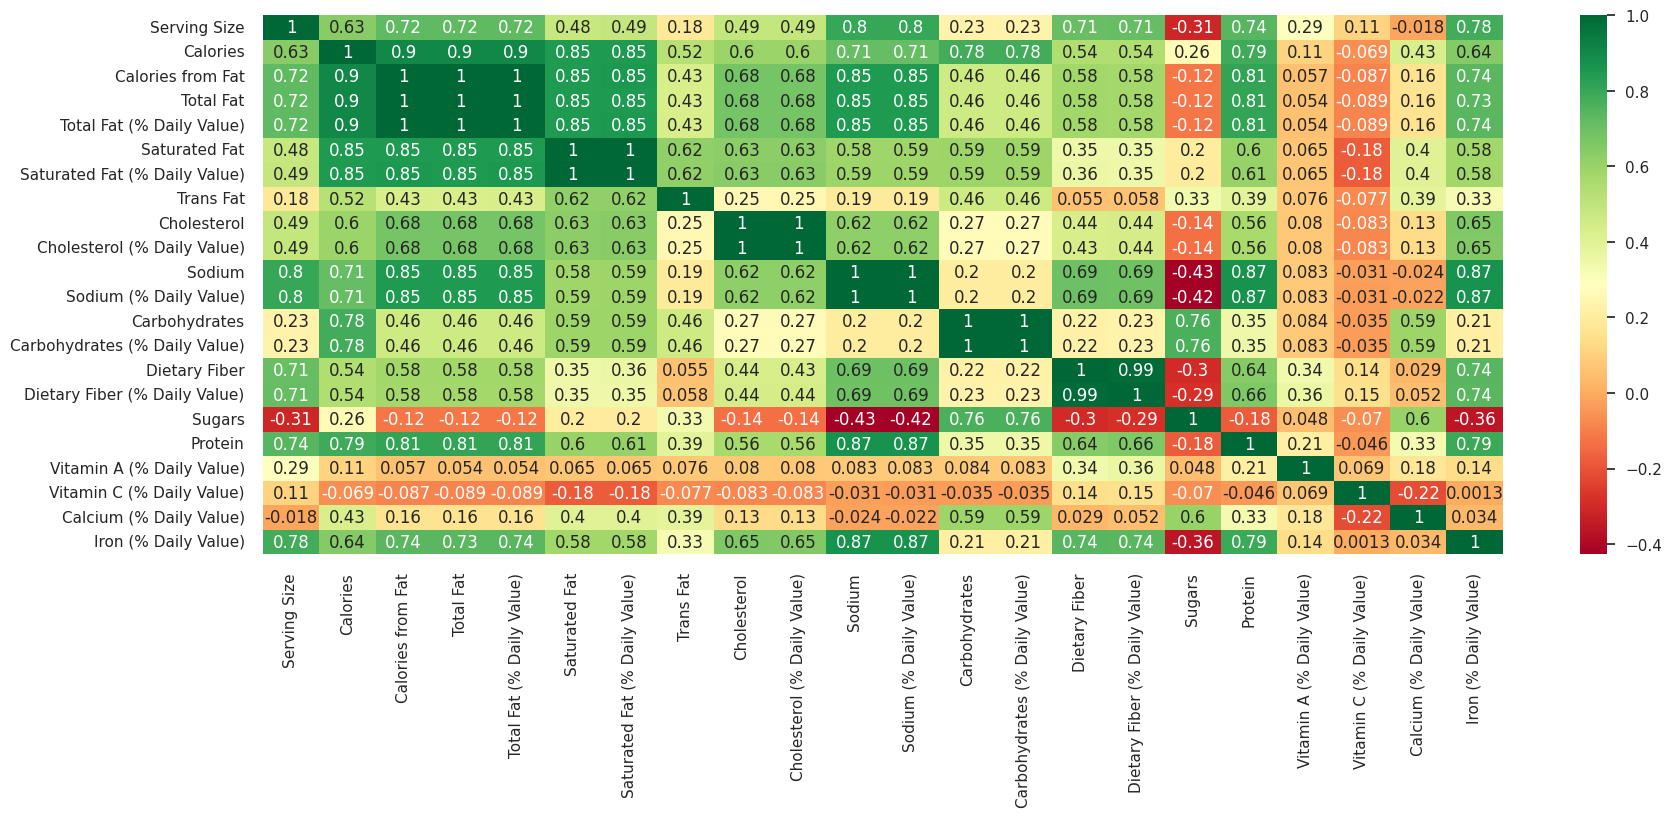

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(dff.corr(), annot=True, cmap='RdYlGn')

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(dff['Calories'], dff[['Serving Size',	'Calories',	'Calories from Fat'	,'Total Fat',	'Total Fat (% Daily Value)',	'Saturated Fat',	'Saturated Fat (% Daily Value)',	'Trans Fat'	,'Cholesterol',	'Cholesterol (% Daily Value)',	'Sodium',	'Sodium (% Daily Value)',	'Carbohydrates',	'Carbohydrates (% Daily Value)',	'Dietary Fiber',	'Dietary Fiber (% Daily Value)',	'Sugars',	'Protein',	'Vitamin A (% Daily Value)',	'Vitamin C (% Daily Value)',	'Calcium (% Daily Value)',	'Iron (% Daily Value)']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Calories   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.733e+29
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:45:43   Log-Likelihood:                          6491.5
No. Observations:                 260   AIC:                                 -1.294e+04
Df Residuals:                     238   BIC:                                 -1.286e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Serving Size                  -1.138e-15   4.06e-15     -0.280      0.779   -9.13e-15    6.86e-15
Calories                          1.0000   4.72e-14   2.12e+13      0.000       1.000       1.000
Calories from Fat              4.885e-15   8.32e-14      0.059      0.953   -1.59e-13    1.69e-13
Total Fat                     -9.237e-14   8.09e-13     -0.114      0.909   -1.69e-12     1.5e-12
Total Fat (% Daily Value)     -2.487e-14   5.88e-13     -0.042      0.966   -1.18e-12    1.13e-12
Saturated Fat                 -1.137e-13   1.17e-12     -0.097      0.923   -2.42e-12    2.19e-12
Saturated Fat (% Daily Value)  1.421e-14   2.36e-13      0.060      0.952   -4.51e-13     4.8e-13
Trans Fat                     -6.395e-14   9.23e-13     -0.069      0.945   -1.88e-12    1.75e-12
Cholesterol                     9.77e-15   1.57e-13      0.062      0.951      -3e-13     3.2e-13
Cholesterol (% Daily Value)   -3.908e-14   4.72e-13     -0.083      0.934   -9.69e-13     8.9e-13
Sodium                        -8.327e-16   3.49e-14     -0.024      0.981   -6.95e-14    6.78e-14
Sodium (% Daily Value)        -3.553e-15    8.3e-13     -0.004      0.997   -1.64e-12    1.63e-12
Carbohydrates                 -6.217e-14   3.61e-13     -0.172      0.864   -7.74e-13     6.5e-13
Carbohydrates (% Daily Value)  2.842e-14   8.92e-13      0.032      0.975   -1.73e-12    1.79e-12
Dietary Fiber                 -3.553e-14   9.31e-13     -0.038      0.970   -1.87e-12     1.8e-12
Dietary Fiber (% Daily Value) -5.329e-15   2.37e-13     -0.022      0.982   -4.72e-13    4.62e-13
Sugars                         4.441e-16   4.29e-14      0.010      0.992    -8.4e-14    8.49e-14
Protein                        -3.73e-14   2.06e-13     -0.181      0.856   -4.43e-13    3.68e-13
Vitamin A (% Daily Value)       2.72e-15   1.18e-14      0.230      0.818   -2.05e-14     2.6e-14
Vitamin C (% Daily Value)     -3.331e-16    9.6e-15     -0.035      0.972   -1.92e-14    1.86e-14
Calcium (% Daily Value)       -4.441e-15   3.03e-14     -0.147      0.883    -6.4e-14    5.52e-14
Iron (% Daily Value)           1.044e-14   8.21e-14      0.127      0.899   -1.51e-13    1.72e-13
==============================================================================
Omnibus:                       78.624   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.329
Skew:                           1.326   Prob(JB):                     1.59e-50
Kurtosis:                       6.760   Cond. No.                     4.85e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) si

## **Main Issues in the Results:**

The dependent variable 'Calories' appears as an independent variable, which is not correct and leads to a perfect R-squared value.
The model seems to have multicollinearity issues as indicated by the high condition number. This often happens when independent variables are highly correlated with each other.
In summary, these results suggest that the model has significant issues, most notably the inclusion of the output variable 'Calories' as an input feature. This needs to be corrected before the model's results can be considered reliable. Additionally, the potential multicollinearity should be addressed, possibly by removing or combining highly correlated features.







In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = h2o_dff.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(200, 22)
(60, 22)


In [ ]:
df_train.head()

Serving Size    Calories    Calories from Fat    Total Fat    Total Fat (% Daily Value)    Saturated Fat    Saturated Fat (% Daily Value)    Trans Fat    Cholesterol    Cholesterol (% Daily Value)    Sodium    Sodium (% Daily Value)    Carbohydrates    Carbohydrates (% Daily Value)    Dietary Fiber    Dietary Fiber (% Daily Value)    Sugars    Protein    Vitamin A (% Daily Value)    Vitamin C (% Daily Value)    Calcium (% Daily Value)    Iron (% Daily Value)
--------------  ----------  -------------------  -----------  ---------------------------  ---------------  -------------------------------  -----------  -------------  -----------------------------  --------  ------------------------  ---------------  -------------------------------  ---------------  -------------------------------  --------  ---------  ---------------------------  ---------------------------  -------------------------  ----------------------
           136         300                  120           13                           20                5                               25            0            260                             87       750                        31               31                               10                4                               17         3         17                           10                            0                         25                      15
           135         250                   70            8                           12                3                               15            0             25                              8       770                        32               30                               10                4                               17         3         18                            6                            0                         25                       8
           111         370                  200           23                           35                8                               42            0             45                             15       780                        33               29                               10                4                               17         2         14                            8                            0                         25                      10
           161         450                  250           28                           43               10                               52            0            285                             95       860                        36               30                               10                4                               17         2         21                           15                            0                         30                      15
           161         400                  210           23                           35                8                               42            0             50                             16       880                        37               30                               10                4                               17         2         21                            6                            0                         25                      10
           185         430                  210           23                           36                9                               46            1            300                            100       960                        40               31                               10                4                               18         3         26                           15                            2                         30                      20
           164         520                  270           30                           47               14                               68            0            250                             83      1410                        59               43                               

In [ ]:
X = h2o_dff.columns
print(X)

['Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']


In [ ]:
# Set target and predictor variables
y = "Calories"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['Serving Size', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']


In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [ ]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |███
23:53:06.622: GBM_1_AutoML_1_20240219_235258 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20240219_235258.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.


████████████████████████████████████

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20240219_235258_model_1


Status of Neuron Layers: predicting Calories, regression, gaussian distribution, Quadratic loss, 2,301 weights/biases, 33.9 KB, 248,000 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight             weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ----------------------  ----------  ----------------------  -------------------  ---------------------  -----------------------
    1        21       Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.019687554070814735   0.03093622624874115     0.0         0.005377813349228485    0.12978750467300415  0.2980838558905317     0.18126994371414185
    3        1        Linear                       0.0   0.0   0.0005715378469903954  0.00046182714868336916  0.0         -0.0010334448609501123  0.05739565193653107  -0.026636586740368152  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 728.5997831821564
RMSE: 26.99258755996091
MAE: 20.355151017172872
RMSLE: NaN
Mean Residual Deviance: 728.5997831821564

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 690.8567984681629
RMSE: 26.284154893550657
MAE: 19.1840860882825
RMSLE: NaN
Mean Residual Deviance: 690.8567984681629

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     19.8694   2.94338    21.2781       24.2445       18.8834       18.1935       16.7474
mean_residual_deviance  835.891   259.102    1122.59       1102.13       728.965       660.588       565.175
mse                     835.891   259.102    1122.59       1102.13       728.965       660.588       565.175
r2                      0.984427  0.006756   0.99007       0.972927      0.984968      0.985659      0.98851
residual_deviance       835.891   259.102    1122.59       1102.13       728.965       660.588       565.175
rmse                    28.6356   4.45691    33.5051       33.1984       26.9994       25.7019       23.7734
rmsle                   0.717938  0.0650984  0.654303      nan           0.784407      0.715105      nan

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-02-19 23:56:06  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2024-02-19 23:56:06  33.863 sec  51282 obs/sec     10        1             2000       50.0805          2508.06              39.7928         0.95852
    2024-02-19 23:56:11  38.873 sec  49138 obs/sec     1240      124           248000     26.9926          728.6                20.3552         0.98795

Variable Importances: 
variable                       relative_importance    scaled_importance    percentage
-----------------------------  ---------------------  -------------------  --------------------
Carbohydrates                  1.0                    1.0                  0.06950688719578067
Carbohydrates (% Daily Value)  0.9452127814292908     0.9452127814292908   0.06569879817481582
Cholesterol                    0.8751831650733948     0.8751831650733948   0.06083125753040275
Sugars                         0.8457266688346863     0.8457266688346863   0.0587838281691559
Vitamin C (% Daily Value

In [ ]:
print(
    aml.leaderboard
)

model_id                                                    rmse       mse      mae       rmsle    mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20240219_235258_model_1     26.2842   690.857  19.1841  nan                          690.857
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_235258  31.0968   967.012  16.8751  nan                          967.012
DeepLearning_grid_1_AutoML_1_20240219_235258_model_3     37.3041  1391.6    25.3154  nan                         1391.6
DeepLearning_grid_1_AutoML_1_20240219_235258_model_2     43.0543  1853.68   28.0365  nan                         1853.68
DeepLearning_grid_1_AutoML_1_20240219_235258_model_4     46.6832  2179.32   33.8653  nan                         2179.32
DeepLearning_grid_3_AutoML_1_20240219_235258_model_1     52.9685  2805.66   33.3066    0.927118                  2805.66
DeepLearning_grid_2_AutoML_1_20240219_235258_model_1     57.7324  3333.03   32.7068  nan                         3333.03
StackedEnsemble_BestOfFamily_3

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     rmse         mse       mae       rmsle    mean_residual_deviance
-------------------------------------------------------  --------  ----------  --------  ----------  ------------------------
DeepLearning_grid_1_AutoML_1_20240219_235258_model_1      26.2842     690.857   19.1841  nan                          690.857
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_235258   31.0968     967.012   16.8751  nan                          967.012
DeepLearning_grid_1_AutoML_1_20240219_235258_model_3      37.3041    1391.6     25.3154  nan                         1391.6
DeepLearning_grid_1_AutoML_1_20240219_235258_model_2      43.0543    1853.68    28.0365  nan                         1853.68
DeepLearning_grid_1_AutoML_1_20240219_235258_model_4      46.6832    2179.32    33.8653  nan                         2179.32
DeepLearning_grid_3_AutoML_1_20240219_235258_model_1      52.9685    2805.66    33.3066    0.927118                  2805.66
DeepLearning_grid_2_AutoML_1_20240219_235258_model_1      57.7324    3333.03    32.7068  nan                         3333.03
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_235258   60.1995    3623.98    27.9019  nan                         3623.98
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_235258   61.6645    3802.51    32.4158    0.678262                  3802.51
StackedEnsemble_AllModels_4_AutoML_1_20240219_235258      62.3645    3889.33    30.8898    1.03792                   3889.33
StackedEnsemble_AllModels_2_AutoML_1_20240219_235258      62.8641    3951.9     28.5789  nan                         3951.9
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_235258   63.0254    3972.2     29.547     0.559803                  3972.2
XGBoost_grid_1_AutoML_1_20240219_235258_model_13          64.0021    4096.27    27.763   nan                         4096.27
DeepLearning_grid_2_AutoML_1_20240219_235258_model_3      64.1929    4120.73    45.5648  nan                         4120.73
XGBoost_grid_1_AutoML_1_20240219_235258_model_10          64.2793    4131.83    28.4385  nan                         4131.83
GBM_grid_1_AutoML_1_20240219_235258_model_17              64.5024    4160.55    23.0976  nan                         4160.55
XGBoost_grid_1_AutoML_1_20240219_235258_model_2           65.2582    4258.64    26.0574  nan                         4258.64
XGBoost_grid_1_AutoML_1_20240219_235258_model_34          65.3059    4264.86    28.5443  nan                         4264.86
XGBoost_2_AutoML_1_20240219_235258                        65.6733    4312.99    25.824   nan                         4312.99
GBM_grid_1_AutoML_1_20240219_235258_model_41              65.96      4350.73    22.6097  nan                         4350.73
XGBoost_grid_1_AutoML_1_20240219_235258_model_44          66.5569    4429.82    25.3752  nan                         4429.82
XGBoost_grid_1_AutoML_1_20240219_235258_model_39          66.8042    4462.8     28.7342  nan                         4462.8
GBM_grid_1_AutoML_1_20240219_235258_model_8               66.8224    4465.23    24.6652    0.36909                   4465.23
GBM_grid_1_AutoML_1_20240219_235258_model_66              66.827     4465.85    22.6172  nan                         4465.85
GBM_grid_1_AutoML_1_20240219_235258_model_46              66.9806    4486.4     24.7628  nan                         4486.4
GBM_grid_1_AutoML_1_20240219_235258_model_32              67.1636    4510.95    25.0871    0.559614                  4510.95
GBM_grid_1_AutoML_1_20240219_235258_model_33              67.2291    4519.75    23.8092  nan                         4519.75
XGBoost_grid_1_AutoML_1_20240219_235258_model_31          67.2568    4523.48    30.9496  nan                         4523.48
XGBoost_grid_1_AutoML_1_20240219_235258_model_40          67.315     4531.31    26.7542    0.33298                   4531.31
GBM_grid_1_AutoML_1_20240219_235258_model_2               67.5387    4561.47    25.284     0.47652                   4561.47
X

## Is the relationship significant?

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


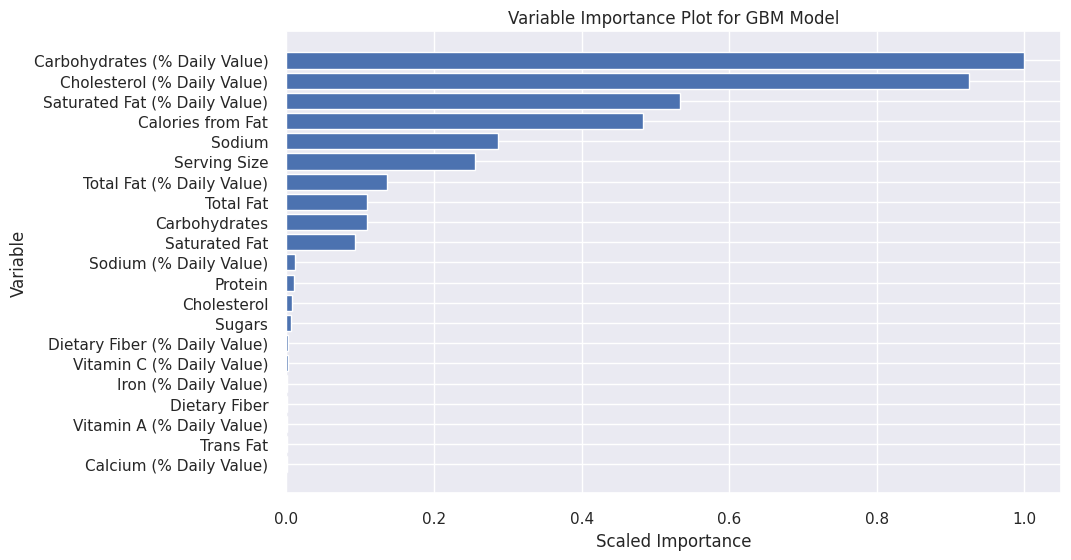

In [ ]:
# Get the GBM Model from the leaderboard
model_row = aml.leaderboard.as_data_frame().iloc[17]

# Get model ID from the row
model_id = model_row['model_id']

# Retrieve the GBM model using the model ID
model = h2o.get_model(model_id)

# Retrieve the variable importance
varimp = model.varimp(use_pandas=True)

# Convert varimp dataframe to dictionary for plotting
varimp_dict = dict(zip(varimp['variable'], varimp['scaled_importance']))

# Sort variable importance dictionary by importance values
varimp_sorted = sorted(varimp_dict.items(), key=lambda x: x[1], reverse=True)

# Plot variable importance
plt.figure(figsize=(10,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         dddddddddddddddddddddddddddddddddddddddddddddddddddddddddddzsssssssssss                                                           6))
plt.barh([x[0] for x in varimp_sorted], [x[1] for x in varimp_sorted])
plt.xlabel('Scaled Importance')
plt.ylabel('Variable')
plt.title('Variable Importance Plot for GBM Model')
plt.gca().invert_yaxis()  # Invert y-axis to display variables with highest importance at the top
plt.show()

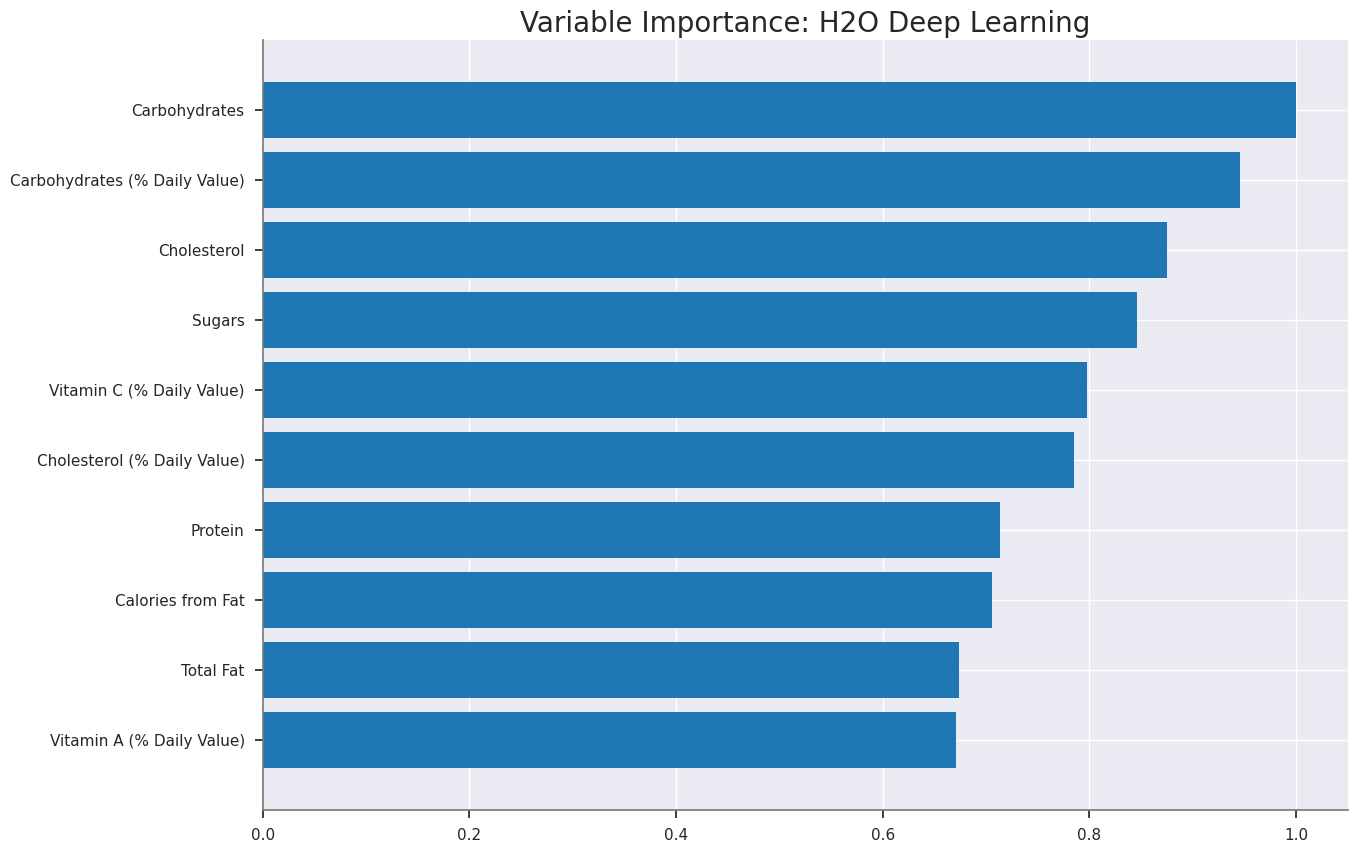

<Figure size 1600x800 with 0 Axes>

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(dff['Calories'], dff[['Serving Size',	'Calories from Fat'	,'Total Fat',	'Total Fat (% Daily Value)',	'Saturated Fat',	'Saturated Fat (% Daily Value)',	'Trans Fat'	,'Cholesterol',	'Cholesterol (% Daily Value)',	'Sodium',	'Sodium (% Daily Value)',	'Carbohydrates',	'Carbohydrates (% Daily Value)',	'Dietary Fiber',	'Dietary Fiber (% Daily Value)',	'Sugars',	'Protein',	'Vitamin A (% Daily Value)',	'Vitamin C (% Daily Value)',	'Calcium (% Daily Value)',	'Iron (% Daily Value)']]).fit()

p_values = model.pvalues

# Step 5: Sort p-values in ascending order
sorted_p_values = p_values.sort_values(ascending=True)

# Step 6: Display the significant p-values (i.e. p < 0.05)
significant_p_values = sorted_p_values[sorted_p_values < 0.05]

print(significant_p_values)

Protein                          4.759175e-94
Carbohydrates                    9.962111e-22
Sugars                           2.920605e-05
Total Fat (% Daily Value)        2.733551e-04
Vitamin C (% Daily Value)        7.679593e-04
Calcium (% Daily Value)          1.778316e-03
Dietary Fiber (% Daily Value)    5.324444e-03
Total Fat                        8.271482e-03
Dietary Fiber                    2.716506e-02
dtype: float64


In [ ]:
significant_variables = ['Protein','Carbohydrates','Sugars','Total Fat (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)','Dietary Fiber (% Daily Value)','Total Fat','Dietary Fiber']

## Are any model assumptions violated?

In [ ]:
X = dff.drop('Calories', axis=1)
y = dff['Calories']

In [ ]:
X.head()

Serving Size  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
0           136                120       13.0                         20   
1           135                 70        8.0                         12   
2           111                200       23.0                         35   
3           161                250       28.0                         43   
4           161                210       23.0                         35   

   Saturated Fat  Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  \
0            5.0                             25        0.0          260   
1            3.0                             15        0.0           25   
2            8.0                             42        0.0           45   
3           10.0                             52        0.0          285   
4            8.0                             42        0.0           50   

   Cholesterol (% Daily Value)  Sodium  ...  Carbohydrates  \
0                           87     750  ...             31   
1                            8     770  ...             30   
2                           15     780  ...             29   
3                           95     860  ...             30   
4                           16     880  ...             30   

   Carbohydrates (% Daily Value)  Dietary Fiber  \
0                             10              4   
1                             10              4   
2                             10              4   
3                             10              4   
4                             10              4   

   Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
0                             17       3       17                         10   
1                             17       3       18                          6   
2                             17       2       14                          8   
3                             17       2       21                         15   
4                             17       2       21                          6   

   Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  
0                          0                       25                    15  
1                          0                       25                     8  
2                          0                       25                    10  
3                          0                       30                    15  
4                          0                       25                    10  

[5 rows x 21 columns]

In [ ]:
Y.head()

0    300
1    250
2    370
3    450
4    400
Name: Calories, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Intialize the linear regression model
model = LinearRegression()

#Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

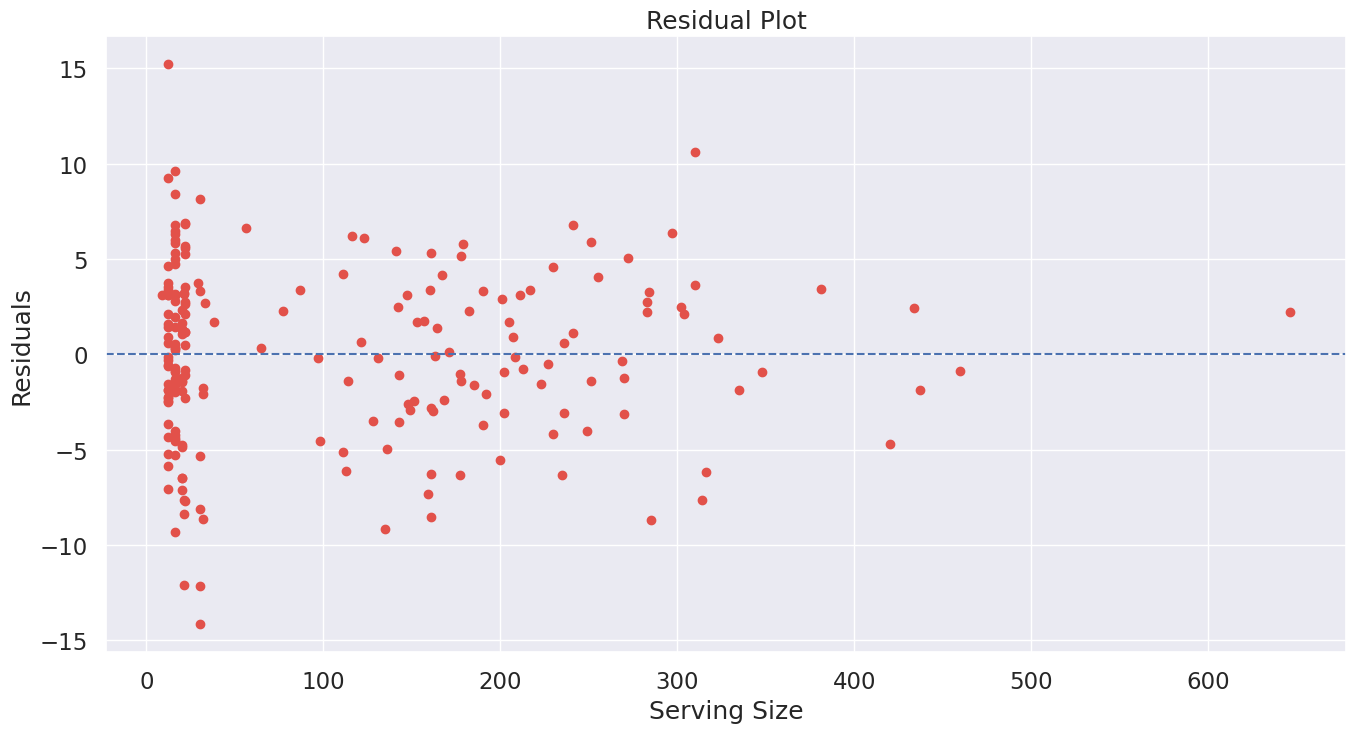

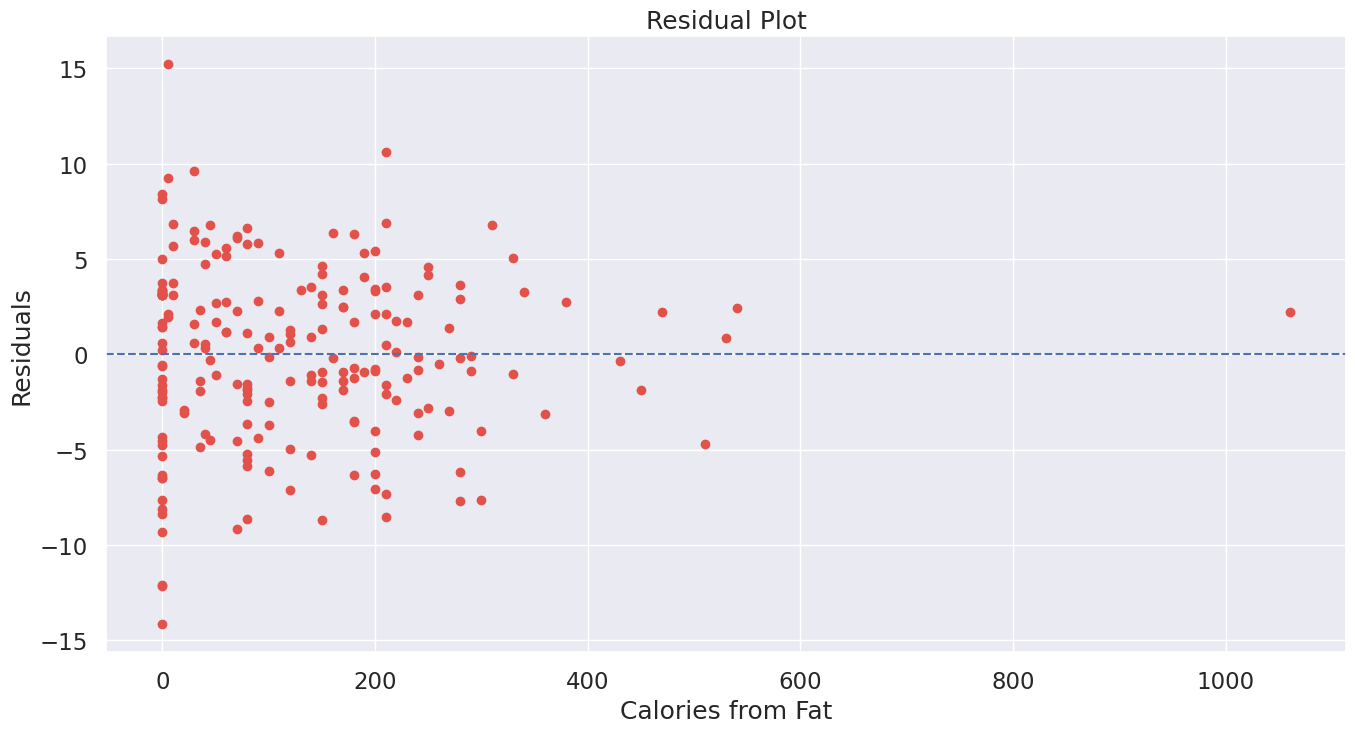

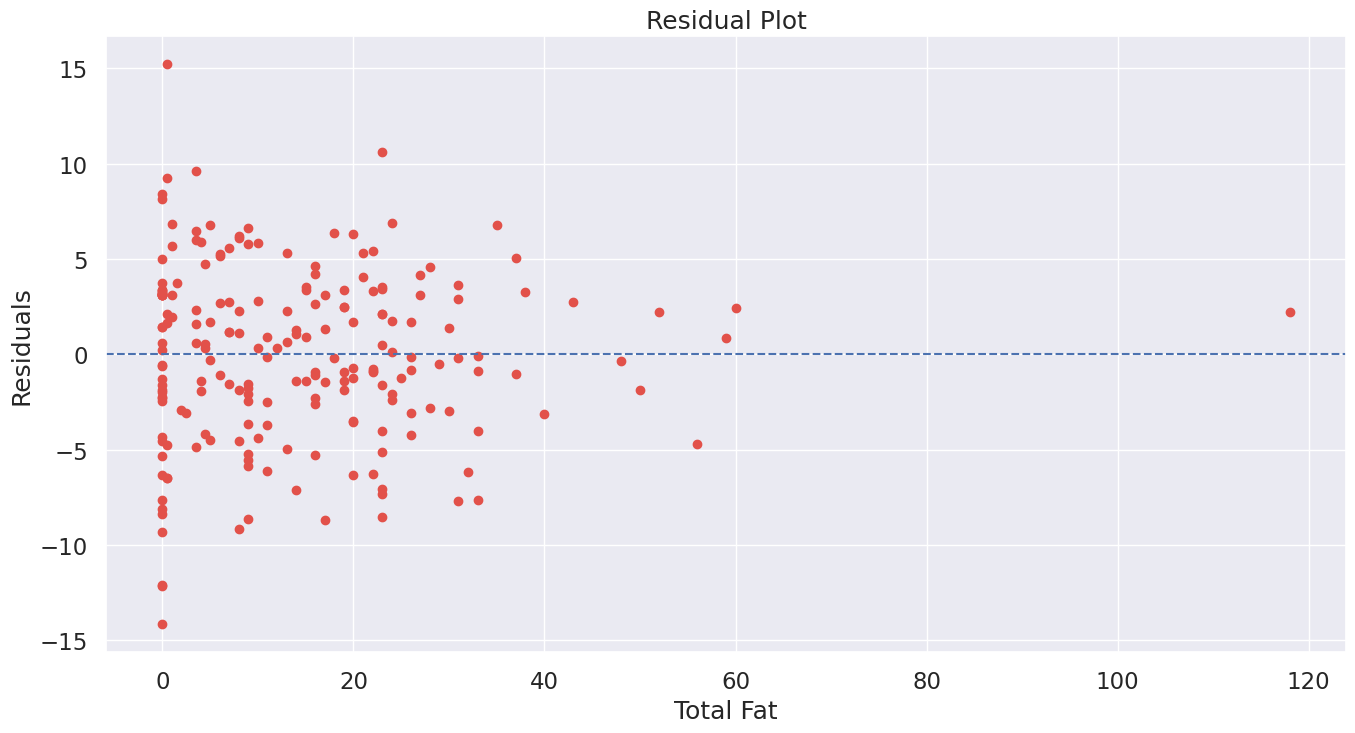

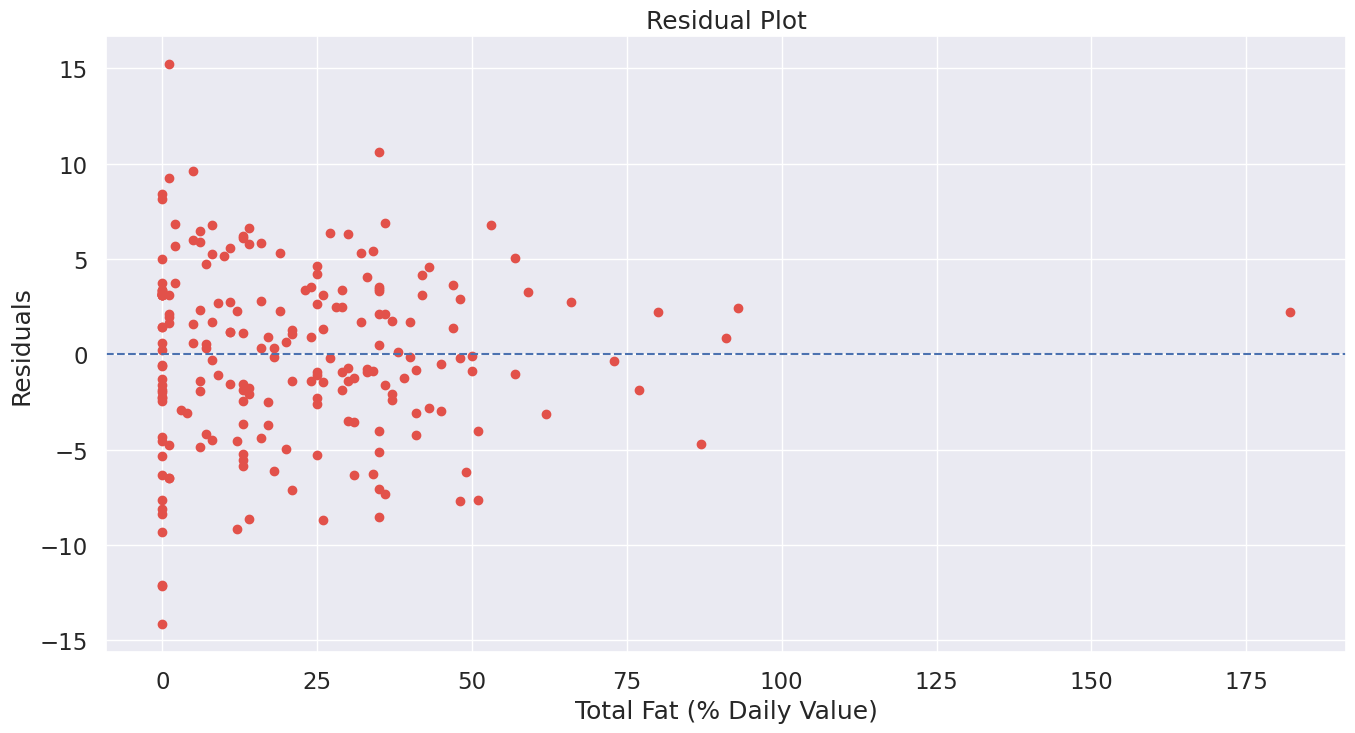

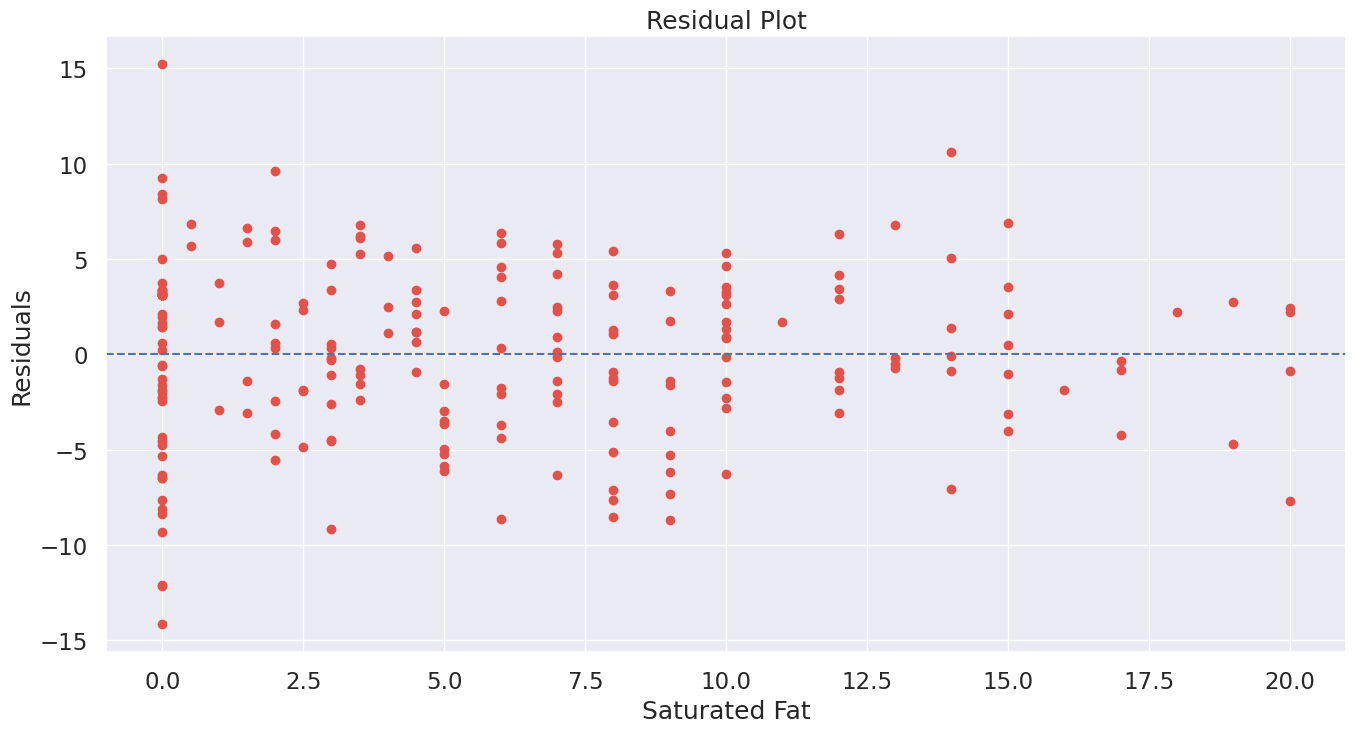

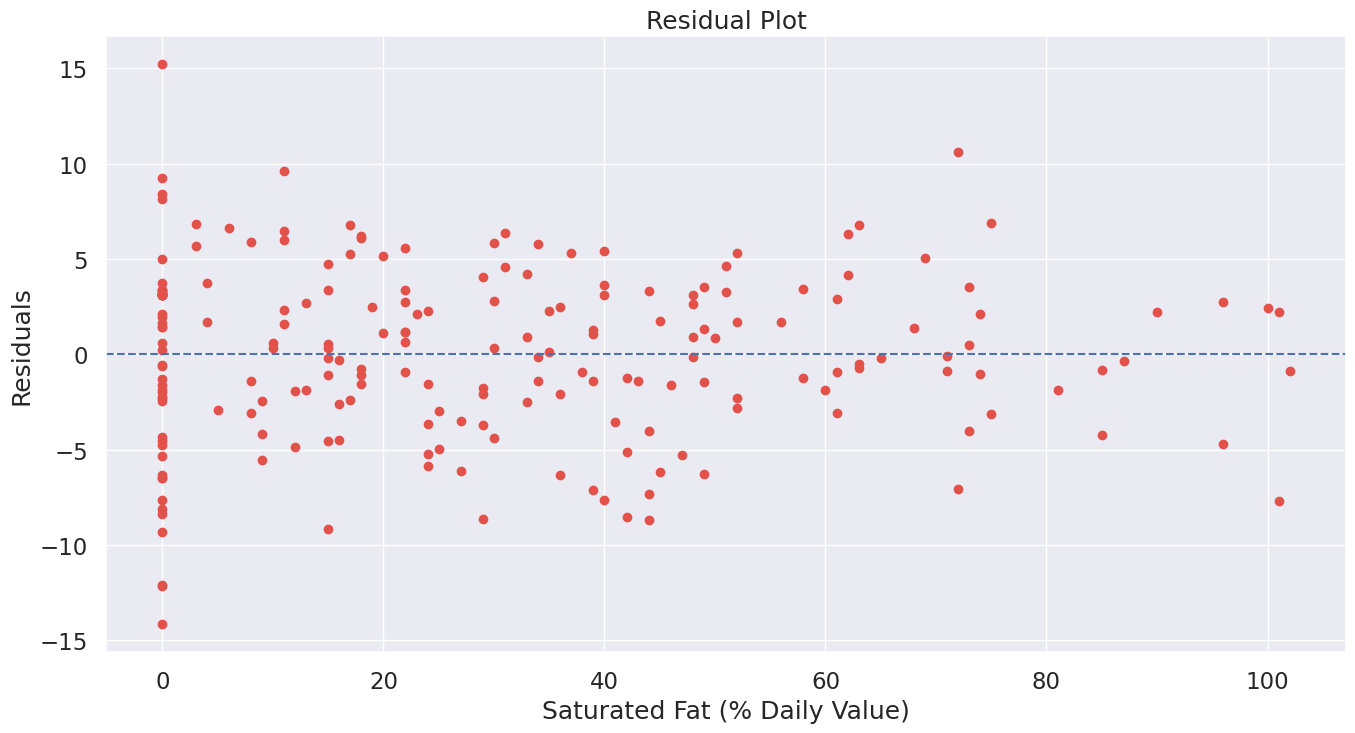

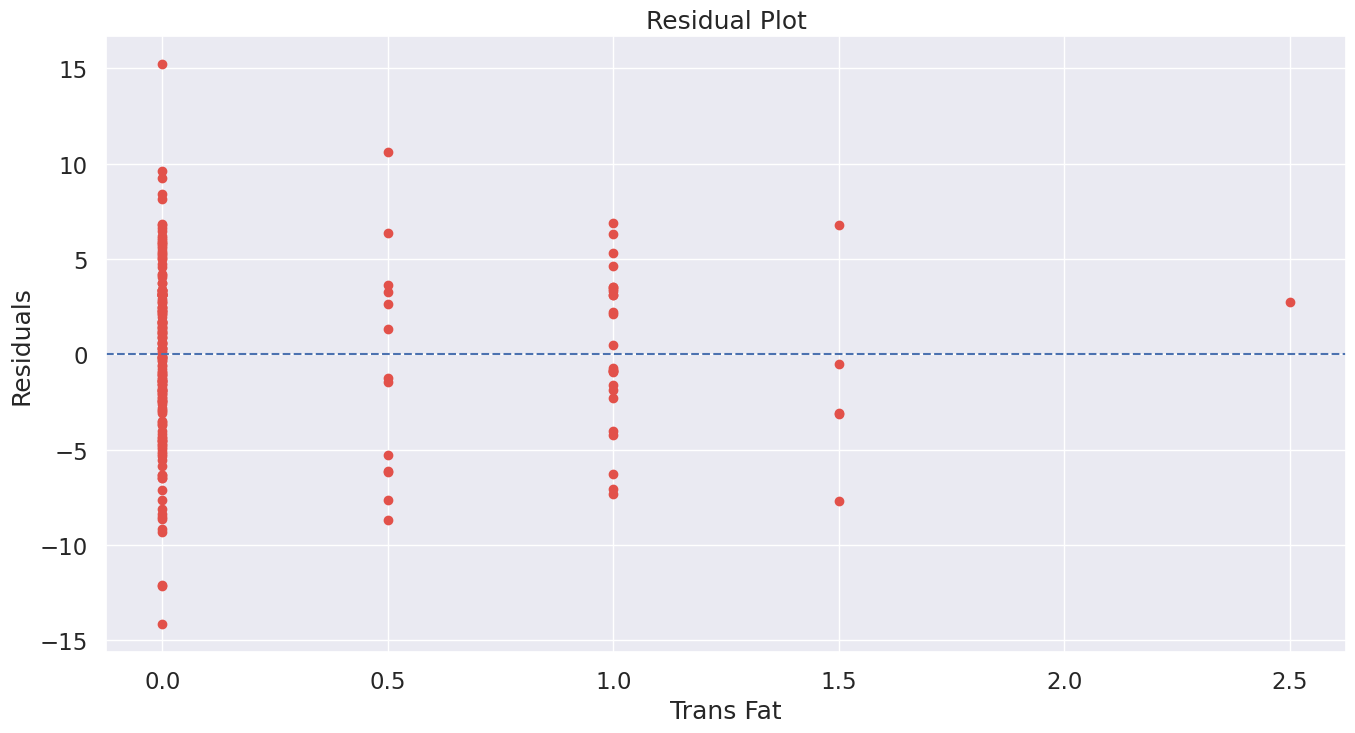

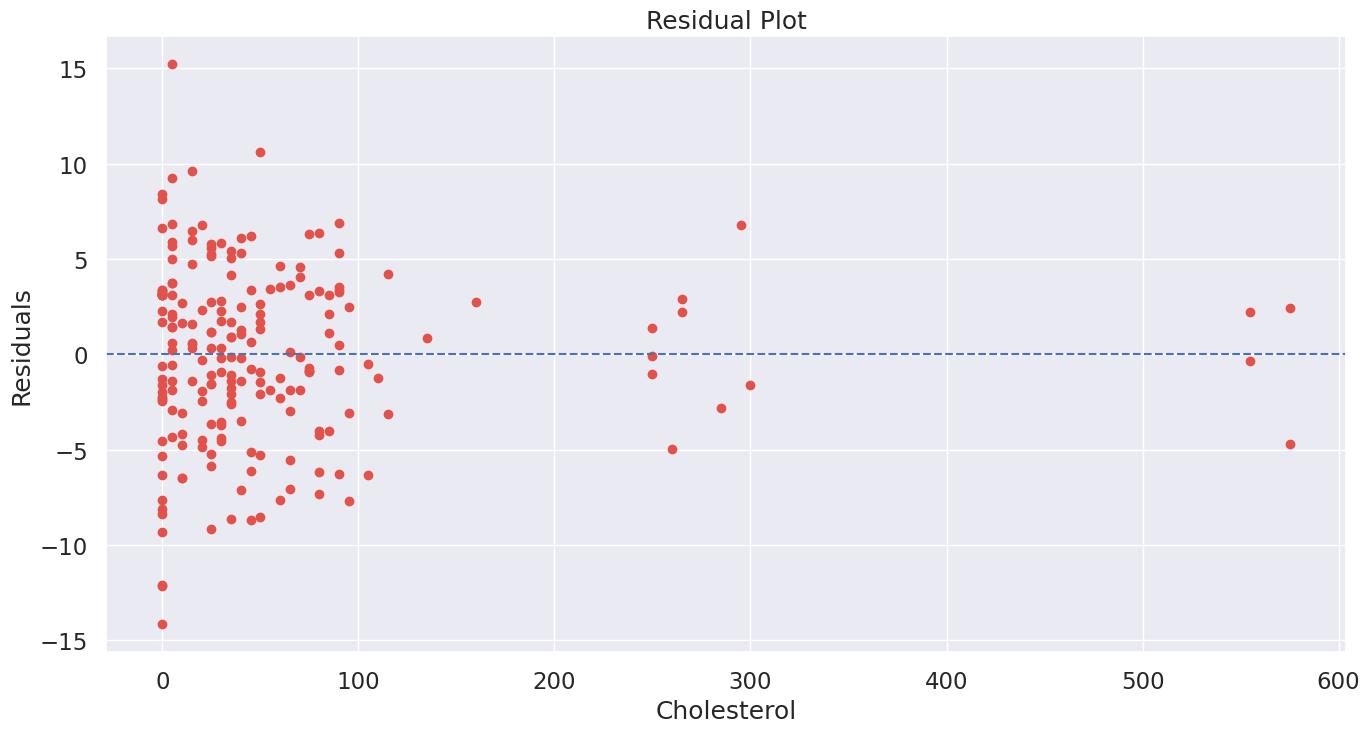

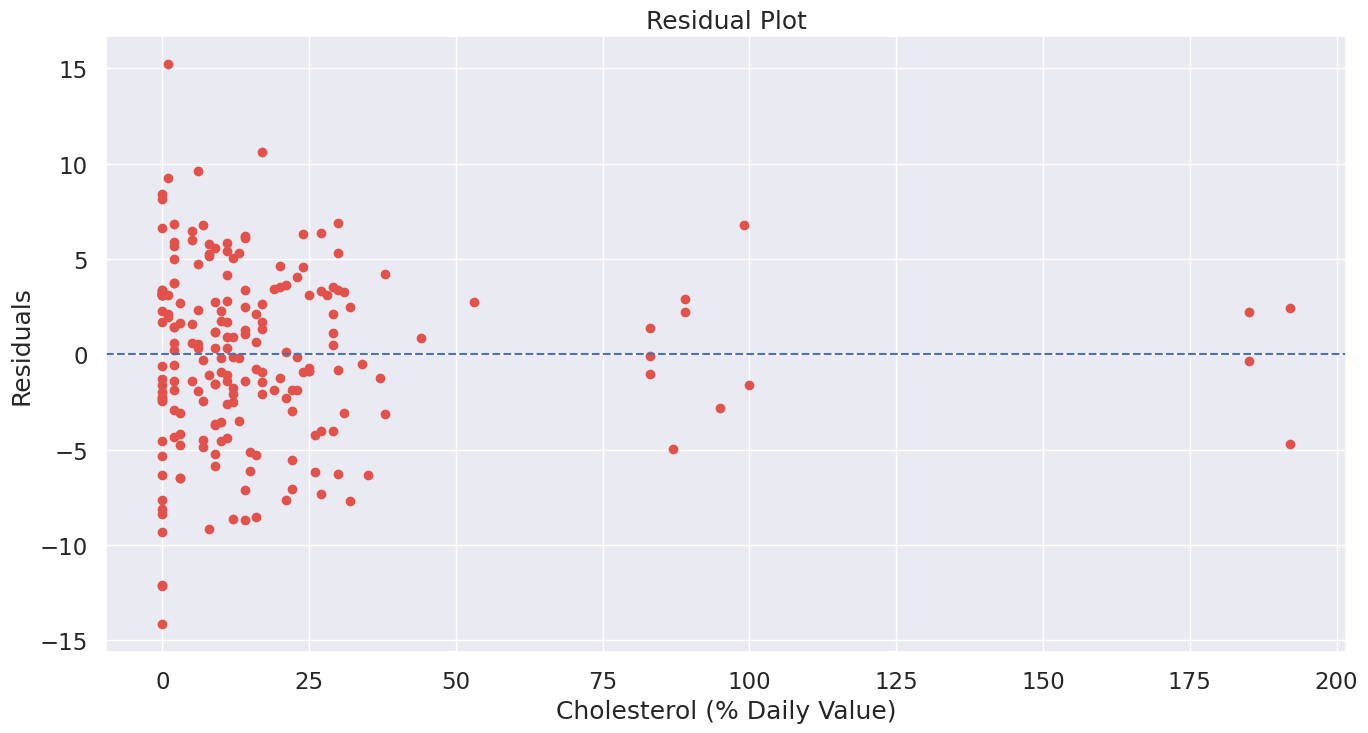

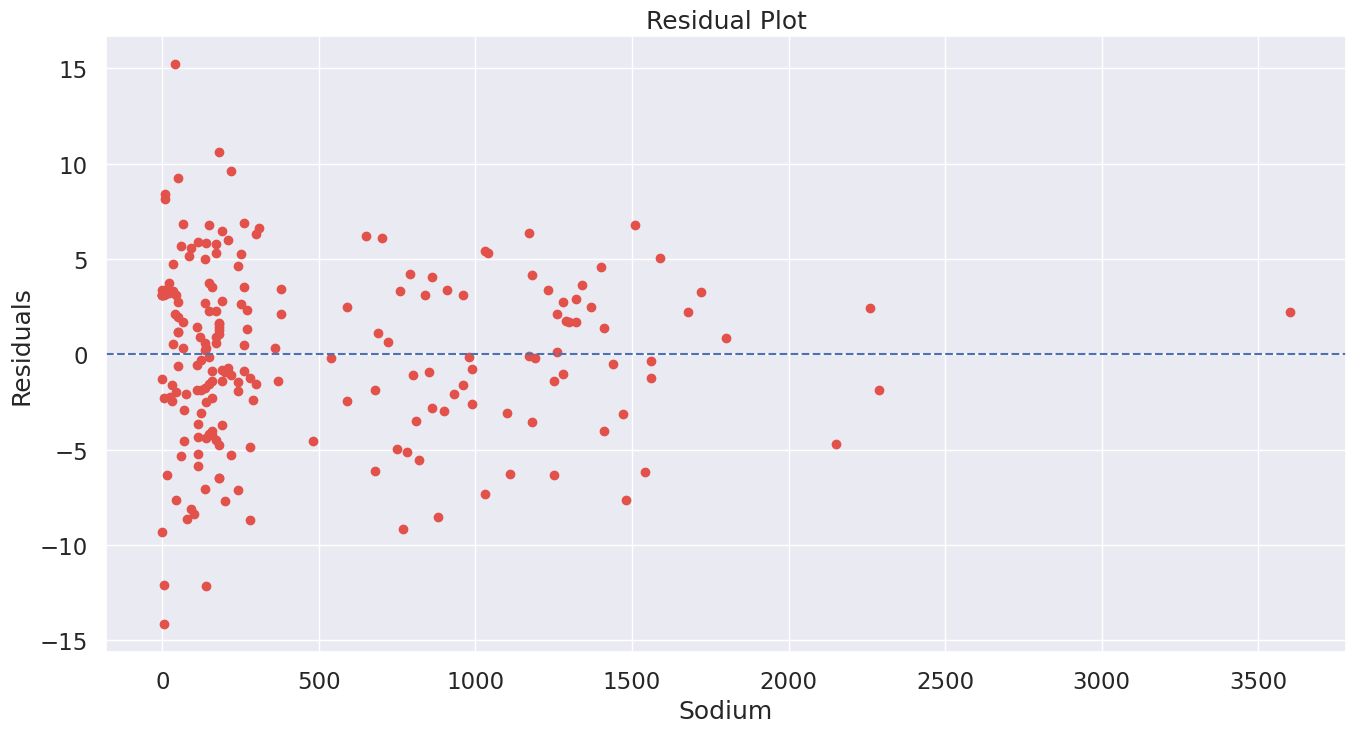

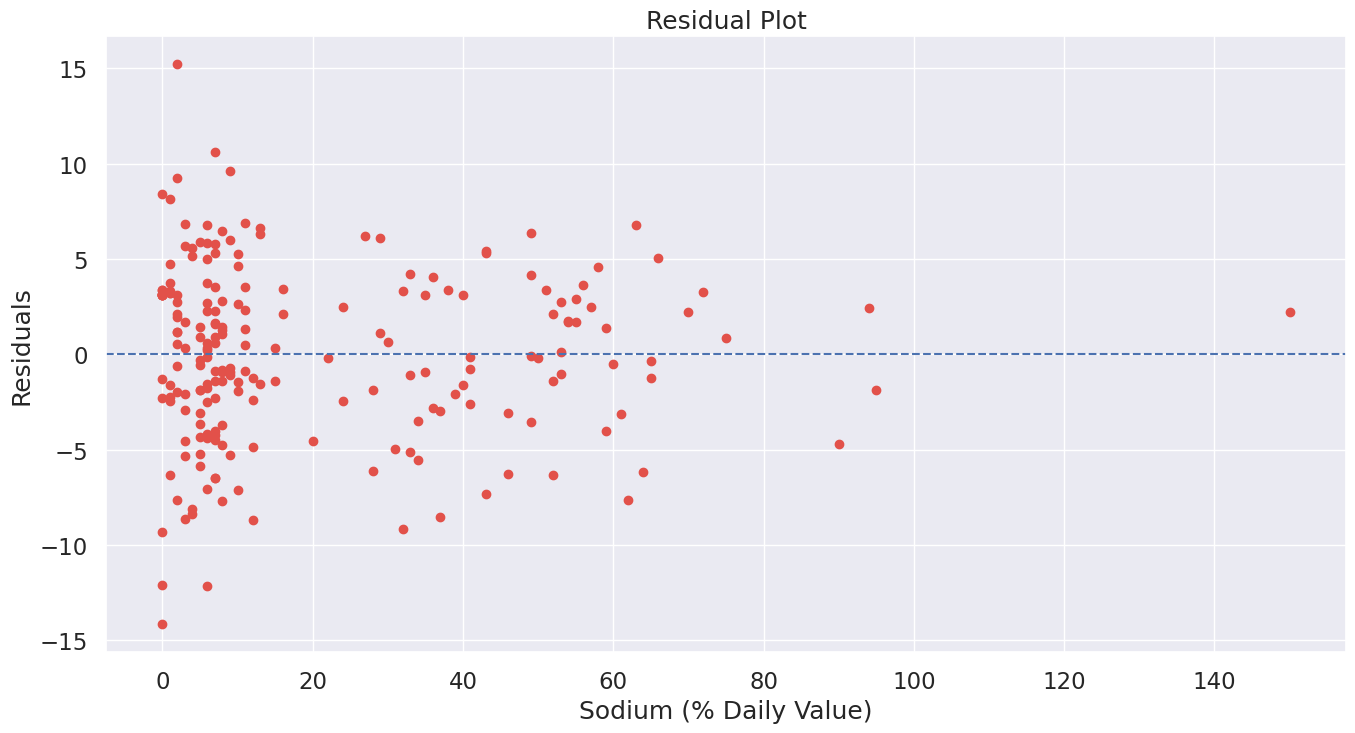

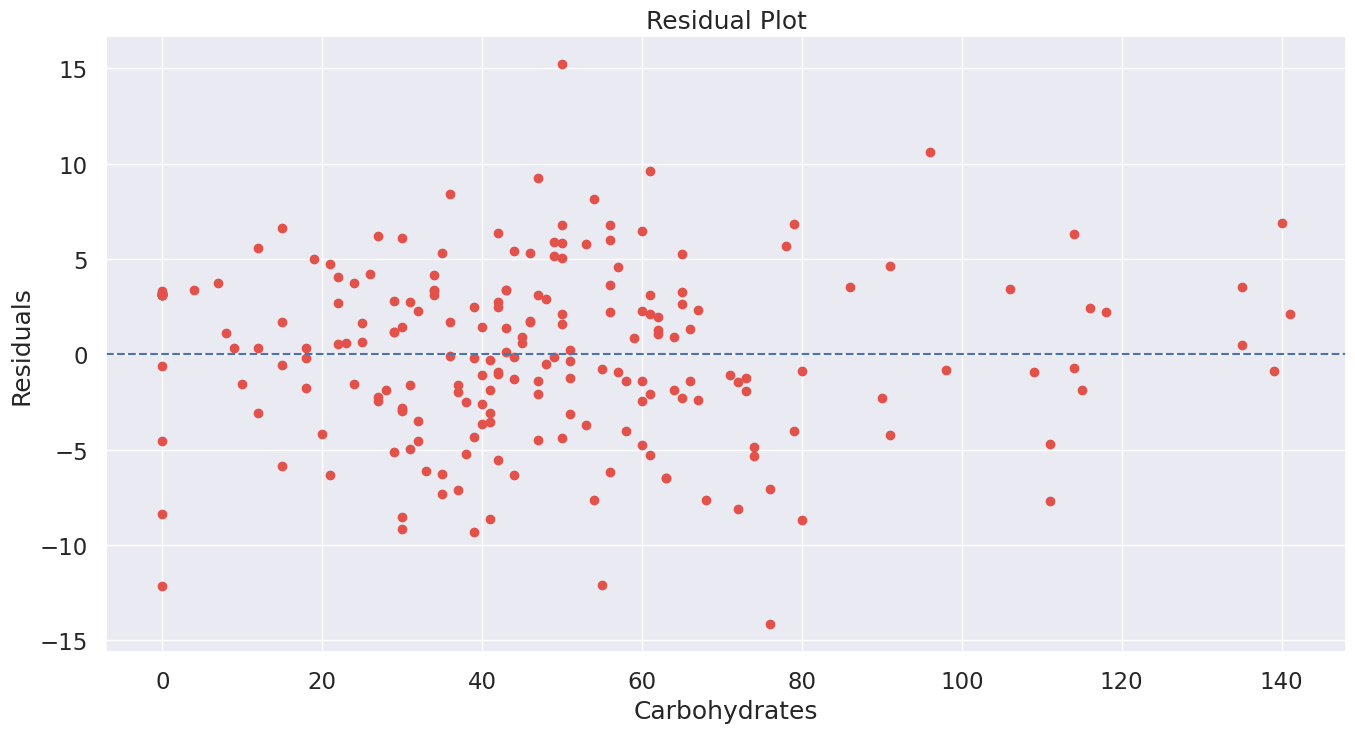

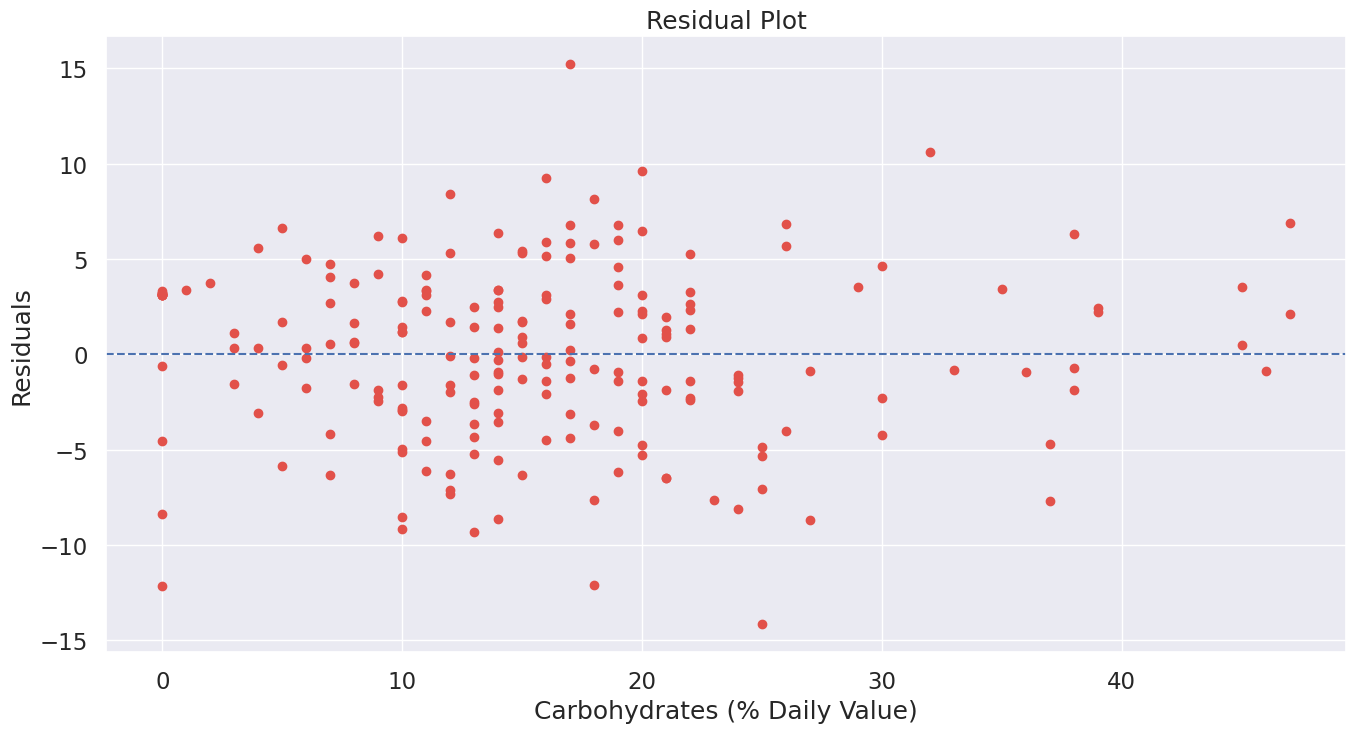

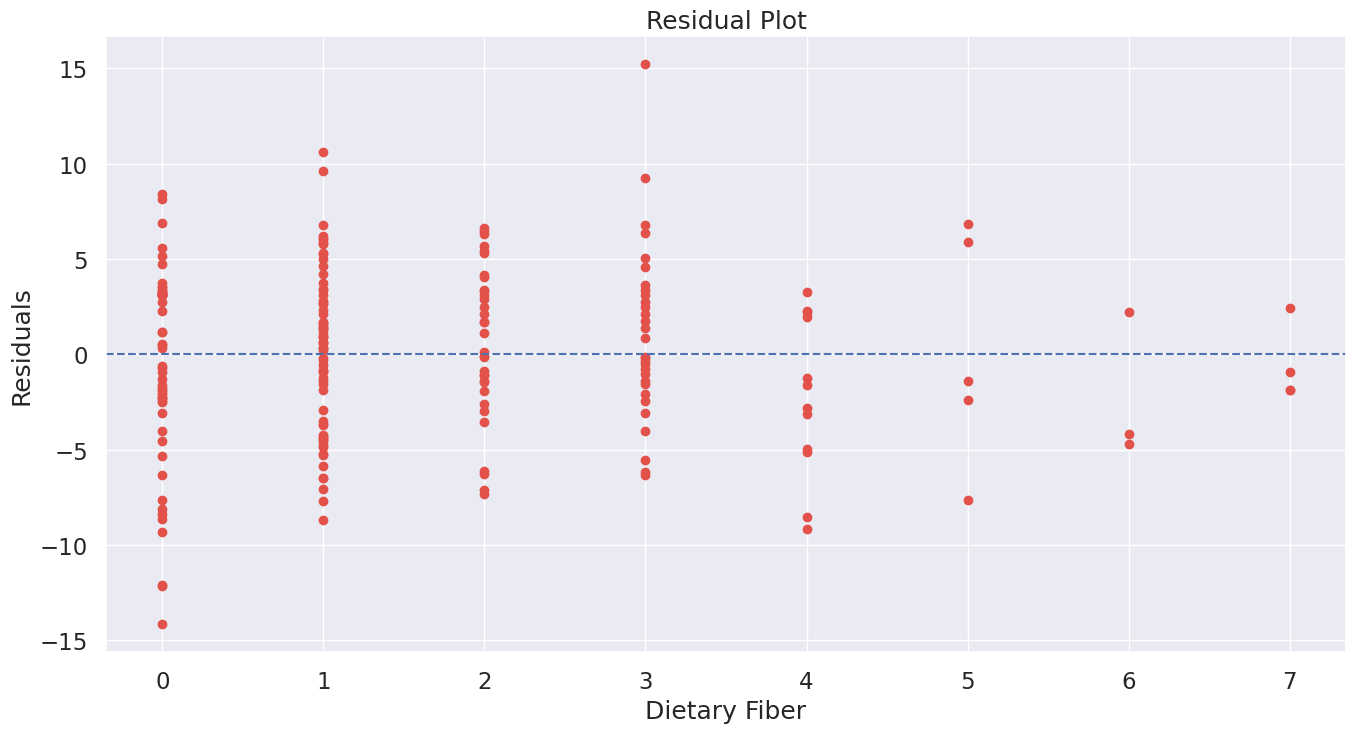

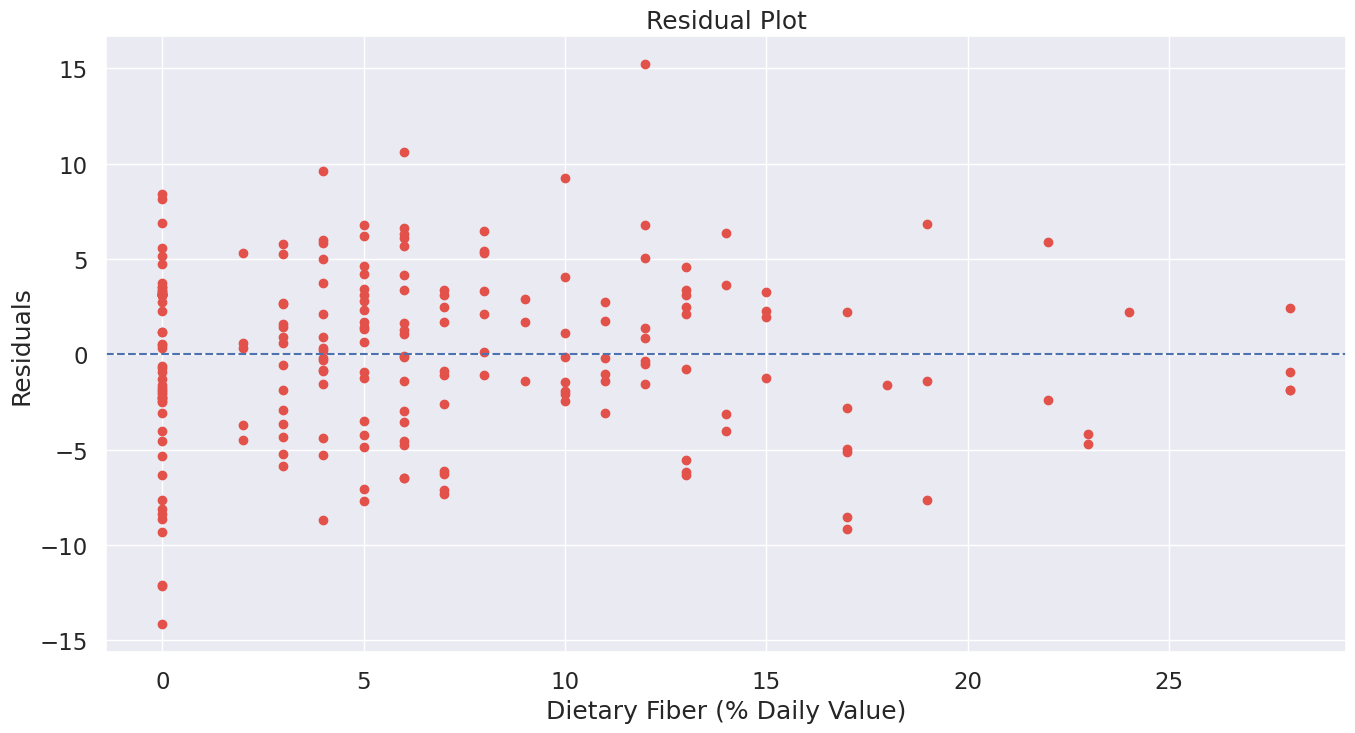

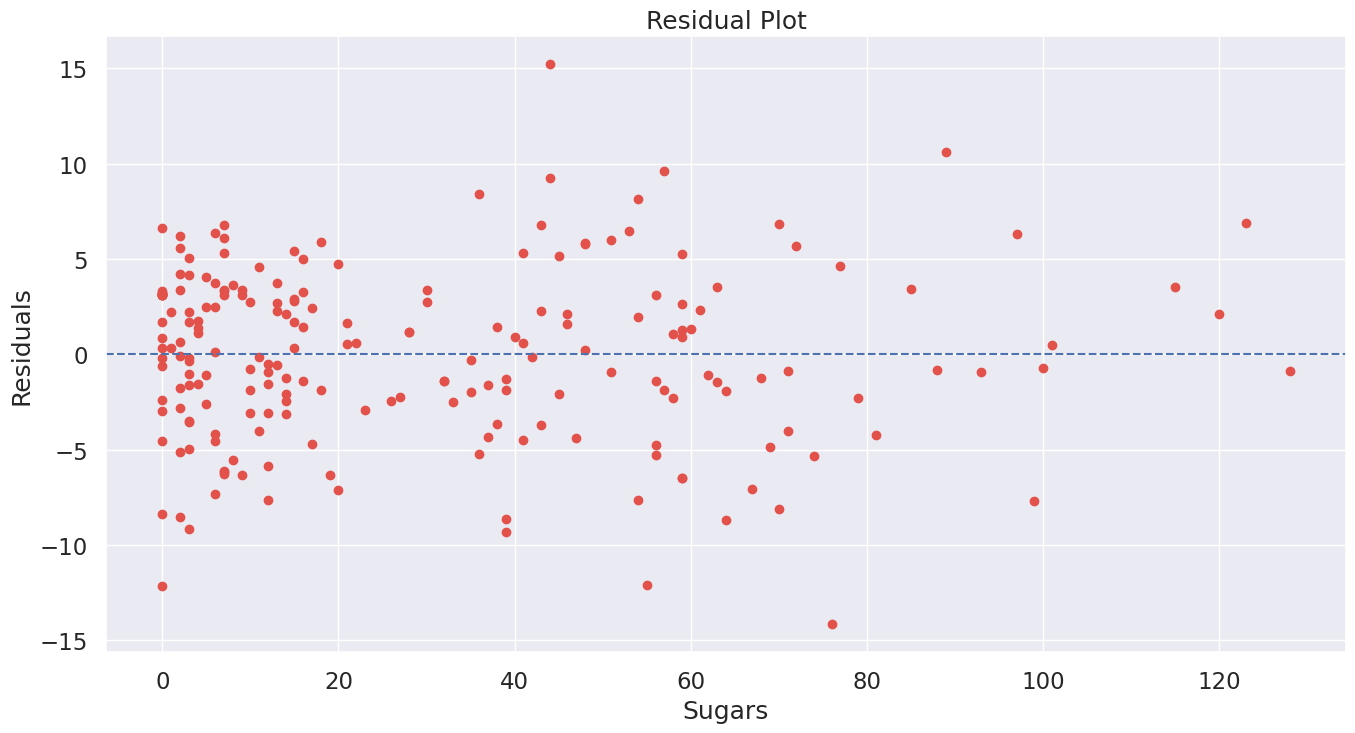

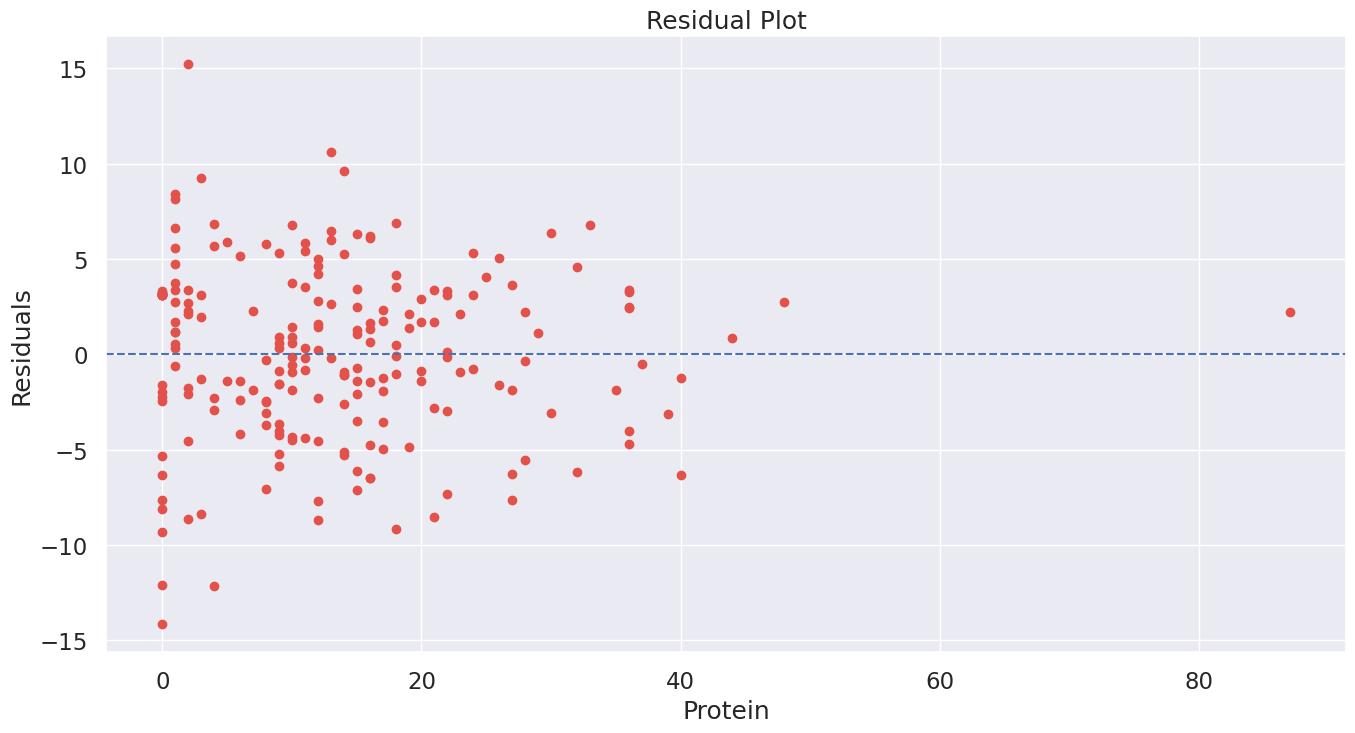

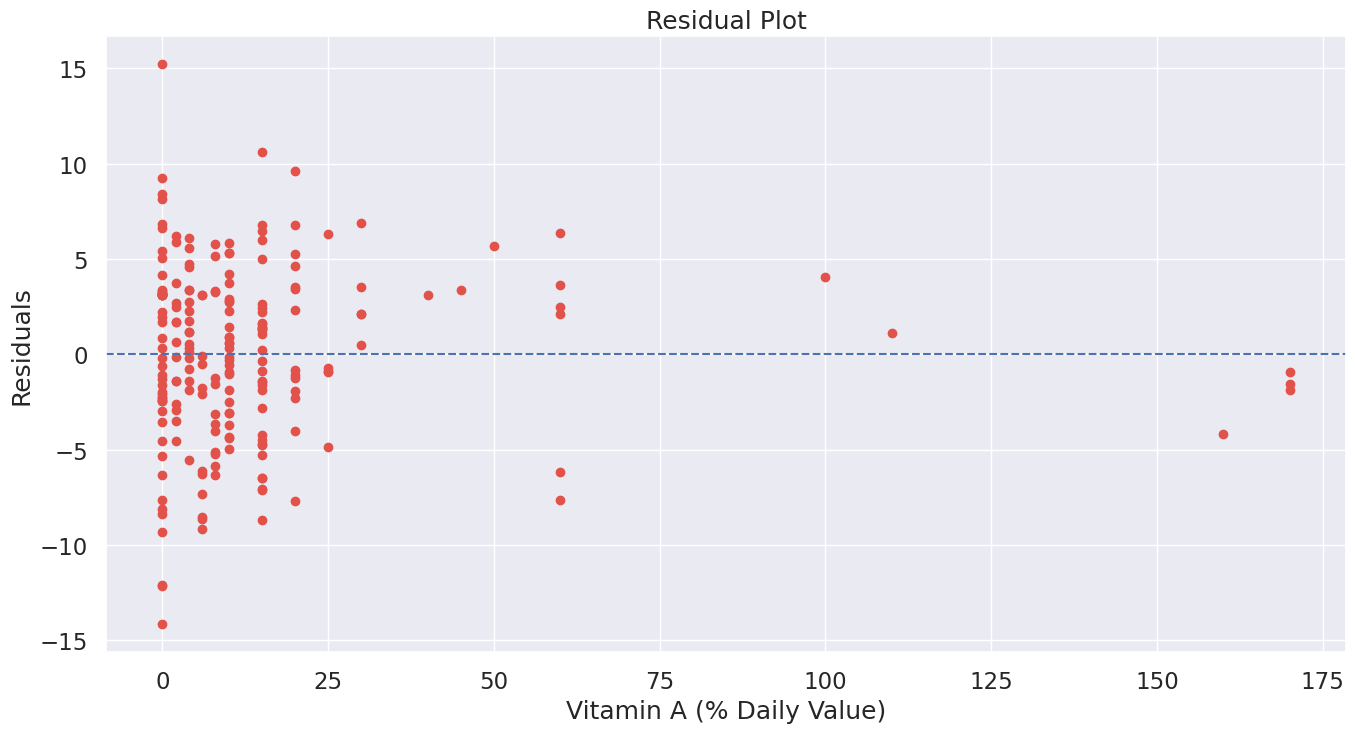

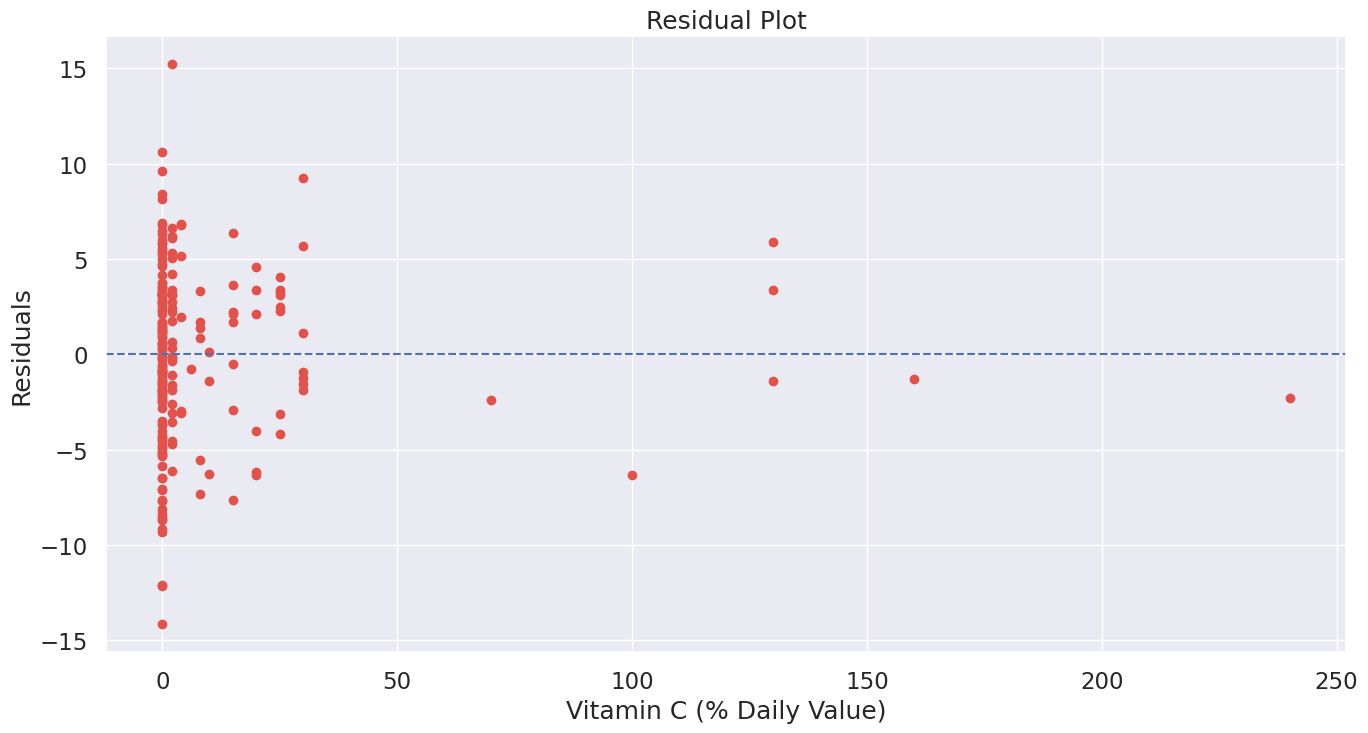

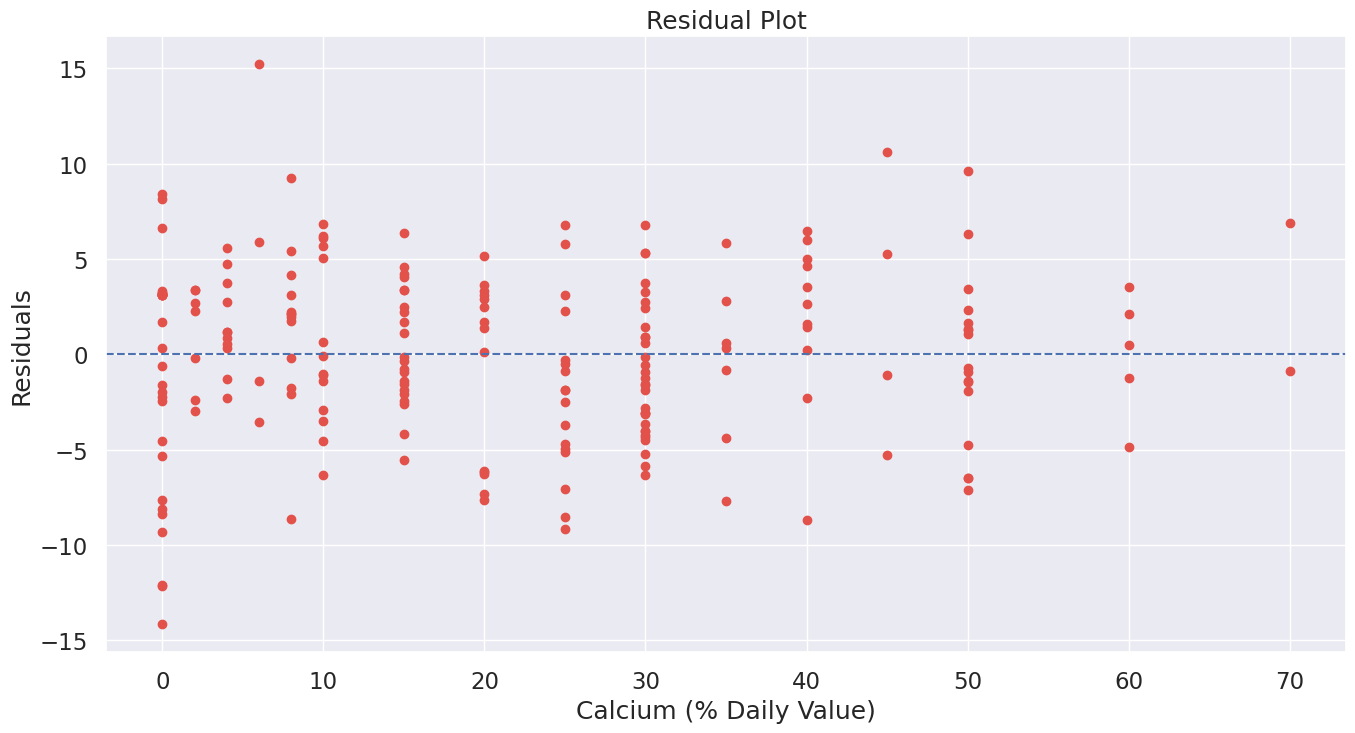

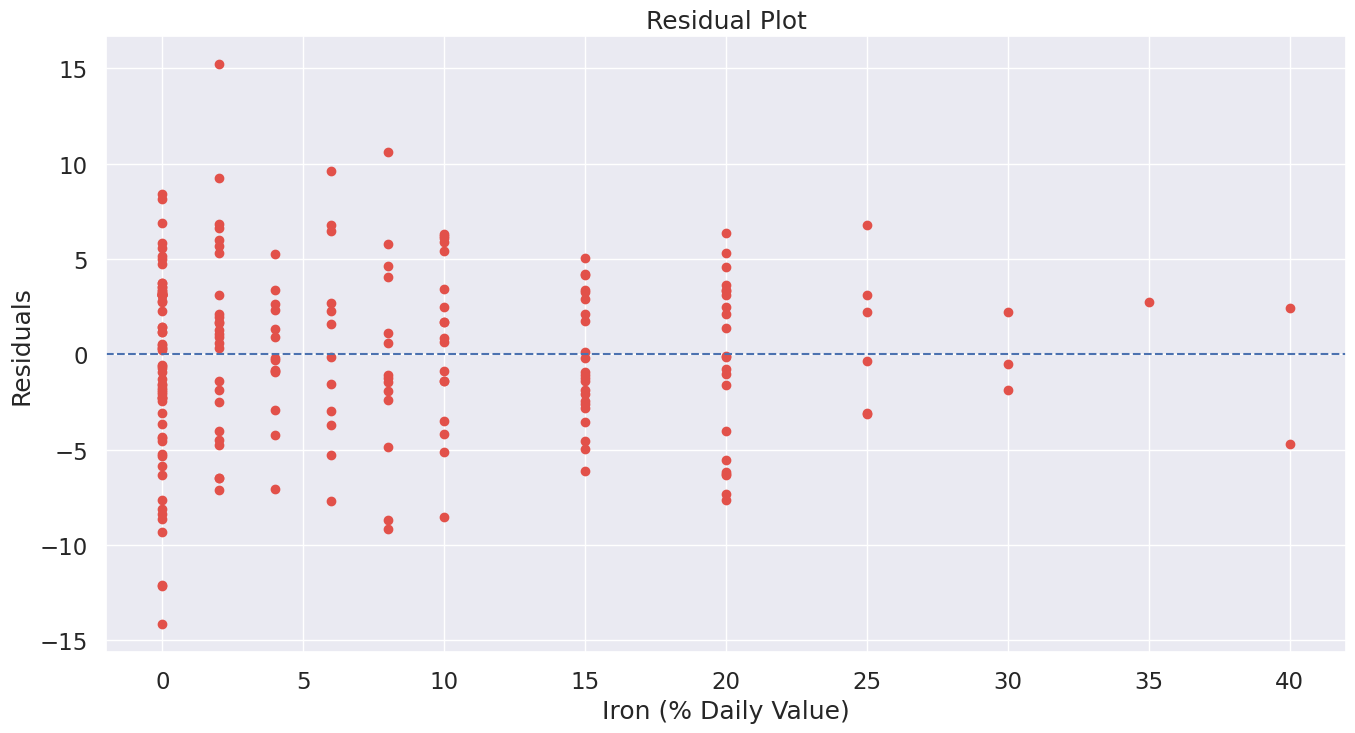

In [ ]:
y_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred

for column in X_train.columns:
  plt.scatter(X_train[column], residuals)
  plt.xlabel(column)
  plt.ylabel("Residuals")
  plt.title("Residual Plot")
  plt.axhline(y=0, color='b', linestyle='--')
  plt.show()

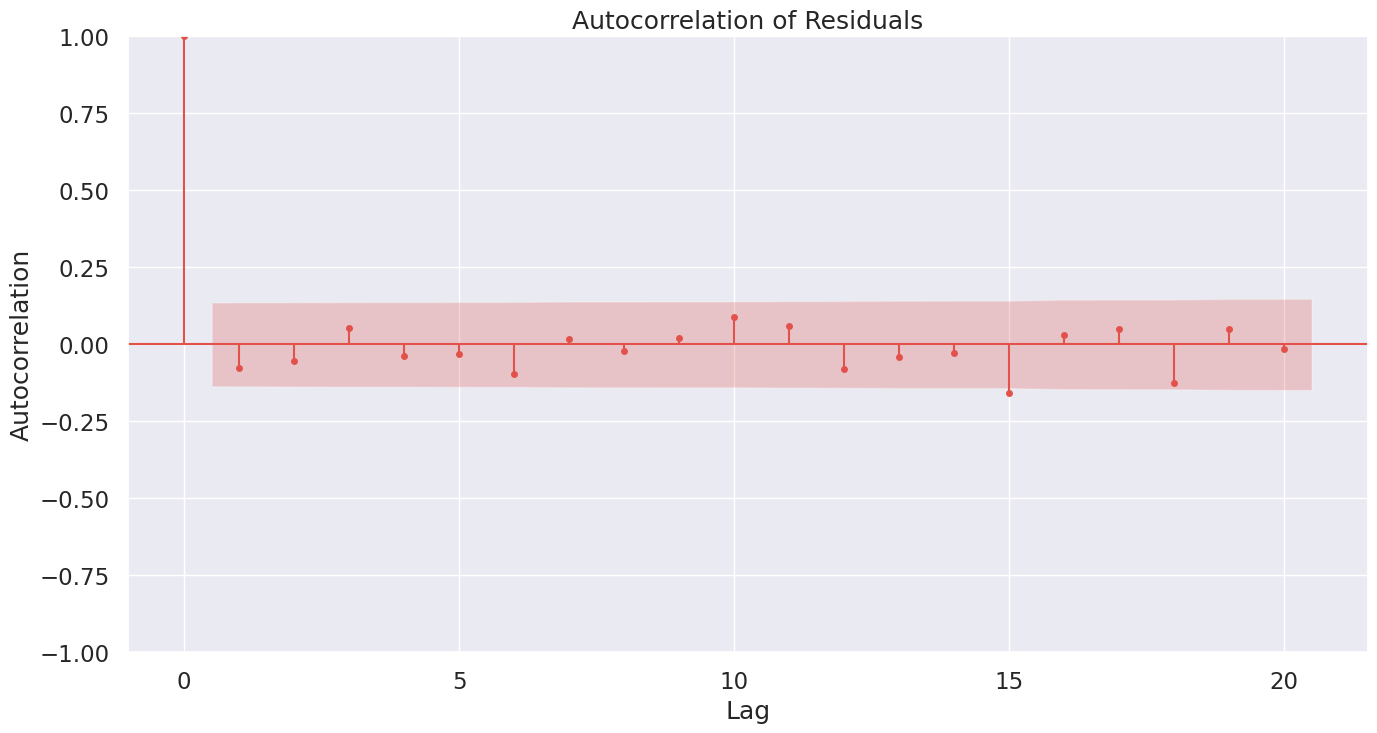

In [ ]:
# Residuals Autocorrelation Plot
plot_acf(residuals, lags=20)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Residuals")
plt.show()


The autocorrelation plot indicates that the residuals from the model do not exhibit significant autocorrelation. This is evidenced by the fact that after the initial lag (lag 0, which is always 1), the autocorrelation values fall within the confidence interval and hover around zero without showing a discernible pattern or trend.

The primary conclusion that can be drawn from this graph is that the model's residuals appear to be random, suggesting that the model has effectively captured the underlying data's temporal structure. There is no clear evidence of missed periodicities or trends in the residuals, which implies that the model residuals are behaving as white noise.

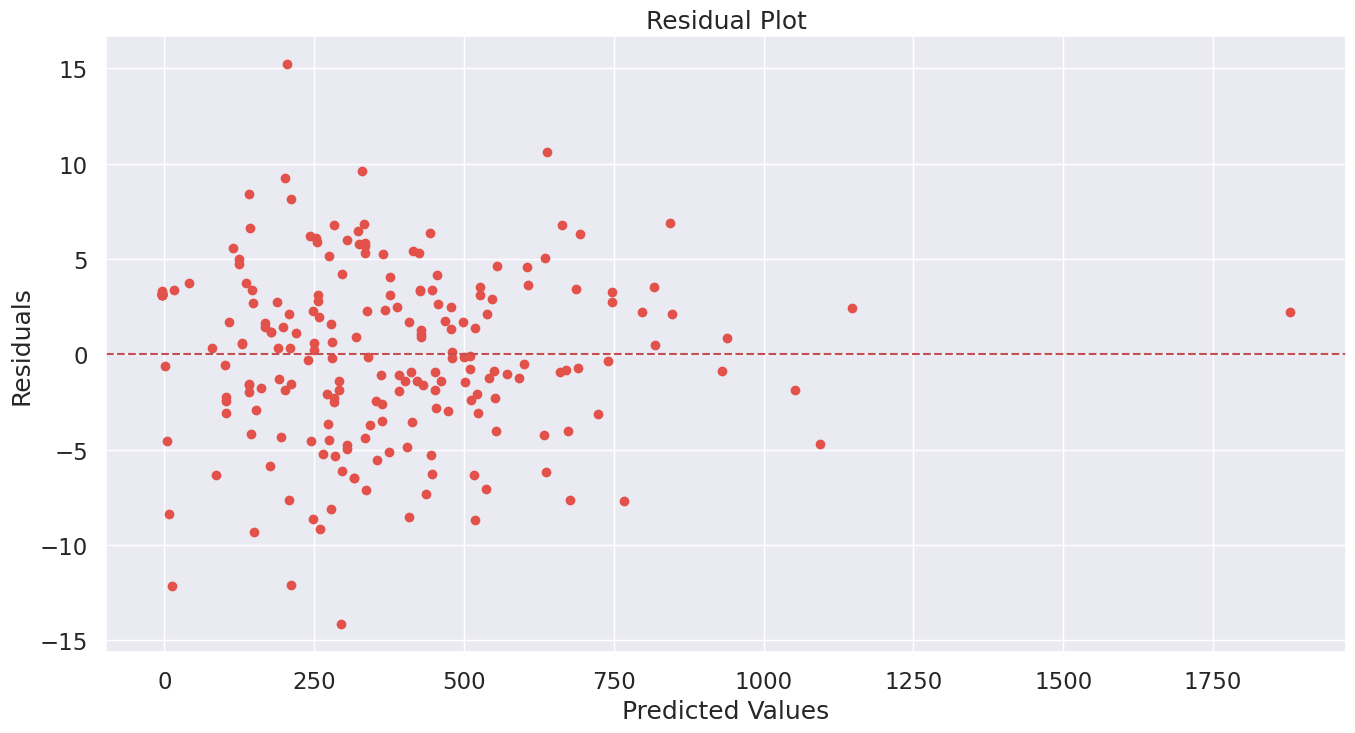

In [ ]:
# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

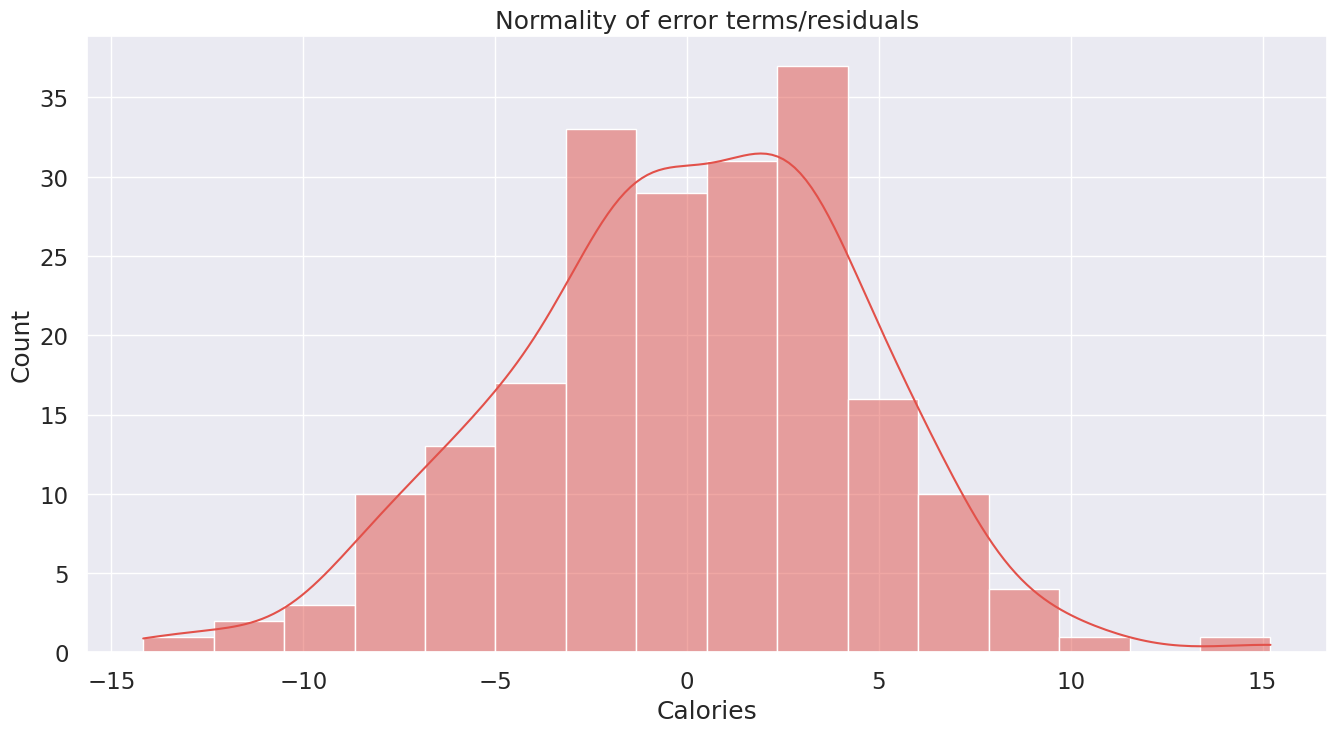

In [ ]:
p = sns.histplot(residuals, kde=True)
p = plt.title('Normality of error terms/residuals')

The smooth curve appears to be a normal distribution fitted to the data. The presence of this curve suggests an attempt to compare the distribution of residuals against the theoretical normal distribution.

## **Is there any multicollinearity in the model?**

In [ ]:
dff.corr()

Serving Size  Calories  Calories from Fat  \
Serving Size                       1.000000  0.634260           0.723090   
Calories                           0.634260  1.000000           0.904588   
Calories from Fat                  0.723090  0.904588           1.000000   
Total Fat                          0.722048  0.904409           0.999663   
Total Fat (% Daily Value)          0.721936  0.904123           0.999725   
Saturated Fat                      0.481414  0.845564           0.847008   
Saturated Fat (% Daily Value)      0.485480  0.847631           0.849592   
Trans Fat                          0.182214  0.522441           0.433686   
Cholesterol                        0.488889  0.596399           0.682161   
Cholesterol (% Daily Value)        0.487938  0.595208           0.681607   
Sodium                             0.800754  0.712309           0.846624   
Sodium (% Daily Value)             0.800482  0.713415           0.847276   
Carbohydrates                      0.228204  0.781539           0.461672   
Carbohydrates (% Daily Value)      0.227167  0.781242           0.461463   
Dietary Fiber                      0.709638  0.538894           0.581274   
Dietary Fiber (% Daily Value)      0.714702  0.540014           0.575621   
Sugars                            -0.310909  0.259598          -0.115285   
Protein                            0.743394  0.787847           0.807913   
Vitamin A (% Daily Value)          0.287114  0.108844           0.056731   
Vitamin C (% Daily Value)          0.109594 -0.068747          -0.087331   
Calcium (% Daily Value)           -0.017601  0.428426           0.161034   
Iron (% Daily Value)               0.779157  0.643552           0.735894   

                               Total Fat  Total Fat (% Daily Value)  \
Serving Size                    0.722048                   0.721936   
Calories                        0.904409                   0.904123   
Calories from Fat               0.999663                   0.999725   
Total Fat                       1.000000                   0.999765   
Total Fat (% Daily Value)       0.999765                   1.000000   
Saturated Fat                   0.846707                   0.847379   
Saturated Fat (% Daily Value)   0.849293                   0.849973   
Trans Fat                       0.431453                   0.433016   
Cholesterol                     0.680547                   0.680940   
Cholesterol (% Daily Value)     0.680000                   0.680378   
Sodium                          0.846158                   0.846728   
Sodium (% Daily Value)          0.846780                   0.847368   
Carbohydrates                   0.461213                   0.460516   
Carbohydrates (% Daily Value)   0.461005                   0.460298   
Dietary Fiber                   0.580837                   0.580592   
Dietary Fiber (% Daily Value)   0.575206                   0.575033   
Sugars                         -0.115446                  -0.115761   
Protein                         0.807773                   0.807922   
Vitamin A (% Daily Value)       0.054434                   0.054038   
Vitamin C (% Daily Value)      -0.089354                  -0.089353   
Calcium (% Daily Value)         0.162860                   0.162031   
Iron (% Daily Value)            0.734685                   0.735478   

                               Saturated Fat  Saturated Fat (% Daily Value)  \
Serving Size                        0.481414                       0.485480   
Calories                            0.845564                       0.847631   
Calories from Fat                   0.847008                       0.849592   
Total Fat                           0.846707                       0.849293   
Total Fat (% Daily Value)           0.847379                       0.849973   
Saturated Fat                       1.000000                       0.999279   
Saturated Fat (% Daily Value)       0.999279                       1.000000   
Trans Fat       

## Does the model make sense?


In [ ]:
X= dff[significant_variables]
y = dff['Calories']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Intialize the linear regression model
model = LinearRegression()

#Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions using the training set
y_pred = model.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 22.22
Coefficient of determination: 1.00
R^2 score on tarining set = 0.9996388203728105


## **Does Regularization help**?

In [ ]:
from sklearn.linear_model import Lasso
# Initialize Lasso Regression model
# Alpha is the regularization strength; larger values specify stronger regularization.
lasso = Lasso(alpha=1.0)

# Fit the Lasso model on the training data
lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse}")

# The coefficients of the model can be accessed using lasso.coef_
print(f"Coefficients: {lasso.coef_}")


Mean Squared Error: 26.900709092093503
Coefficients: [ 3.83601209  4.05756818 -0.13192246  5.87473031  0.05501807  0.1769976
 -0.09394973  0.          0.        ]


Which Hyperparameters are important?

In [ ]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X' and 'y' are already defined and contain your dataset

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LassoCV to find the optimal alpha values with cross-validation
# The number of alphas to try is set by n_alphas, increase this number for a more fine-grained search
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000, n_alphas=100)

# Fit the LassoCV model on the training data
lasso_cv.fit(X_train, y_train)

# Retrieve the alpha values tried during cross-validation and corresponding mean squared errors
alphas = lasso_cv.alphas_
mse_path = lasso_cv.mse_path_

# Calculate the mean MSE for each alpha across folds
mean_mse = mse_path.mean(axis=1)

# Combine the alphas and their corresponding mean MSE into a single array
alpha_mse_pairs = np.column_stack((alphas, mean_mse))

# Sort the pairs based on mean MSE
sorted_alpha_mse_pairs = alpha_mse_pairs[np.argsort(alpha_mse_pairs[:, 1])]

# Get the top 5 alpha values (with the lowest mean MSE)
top_5_alphas = sorted_alpha_mse_pairs[:5, 0]

# Print the top 5 alpha values
print(f"Top 5 alpha values: {top_5_alphas}")


Top 5 alpha values: [5.66167749 6.0708312  6.5095533  6.97998064 7.48440445]


### **Summary:**

**1) Is the relationship significant?**

Yes, the relationship between the predictor variables and the response variable is deemed significant based on both AutoML rankings, variable importance analysis and p values obtained through OLS.

**2) Are any model assumptions violated?**

No Clear Patterns(Linearity): The absence of clear patterns (such as curves or clusters) suggests that the model's assumptions of linearity and homoscedasticity (equal variance of residuals) hold true. In this plot, while there is a slight funnel shape, where the spread of residuals increases with the predicted value, there isn't a strong pattern that would indicate non-linearity.

Potential Outliers: There are a few points that stand out from the main cluster of data points, particularly one at the higher end of predicted values. These may be outliers or influential points that could have a disproportionate impact on the model fit.

Homoscedasticity: The residuals do not seem to display a constant variance across all levels of predicted values. The spread of residuals seems to increase as the predicted values increase, indicating potential heteroscedasticity. A model that correctly captures the variance in the data would show residuals with consistent spread across the range of predicted values.

Normality: The curve that overlays the histogram looks like a normal distribution curve, which is used to assess how well the data fit a normal distribution.If the histogram bars forms a symmetric pattern around the center and the curve appears to be a bell shape, this is a sign that the data are approximately normally distributed.


Overall Model Fit: The model seems to have an adequate fit for most of the data, as the residuals are relatively close to the horizontal axis, though the potential issues mentioned above could be addressed for improving the model.

**3) Is there any multicollinearity in the model?**

Yes, the high correlation coefficients among variables such as Calories from Fat,	Total Fat,	Total Fat (% Daily Value),	Saturated Fat indicate the presence of multicollinearity in the model

**4) In the multivariate models are predictor variables independent of all the other predictor variables?**

In the given multivariate models, the predictor variables are not independent of each other. The correlation matrix indicates multicollinearity. for insatnce
total fat - saturaated fat
sodium - serving size

**5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
Protein                          4.759175e-94
Carbohydrates                    9.962111e-22
Sugars                           2.920605e-05
Total Fat (% Daily Value)        2.733551e-04
Vitamin C (% Daily Value)        7.679593e-04
Calcium (% Daily Value)          1.778316e-03
Dietary Fiber (% Daily Value)    5.324444e-03
Total Fat                        8.271482e-03
Dietary Fiber                    2.716506e-02


**6) Does the model make sense?**

 the model appears to have a high degree of predictive accuracy on the training set, it's crucial to perform additional validation, like cross-validation or testing on an independent test set, to ensure the model's robustness and generalizability.

**7) Does regularization help?**

no, it doesn't. mean squared error does not have much impact

8)Which independent variables are significant?
Top 5 alpha values: [5.66167749 6.0708312  6.5095533  6.97998064 7.48440445]

## Refernces
Sckit learn offcial documentation

Refered Towards Data Science

Eli5 official documentation

## **Model Interpretability**



In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/vijeth-sr/DSEM/main/mcd_menu.csv?token=GHSAT0AAAAAACPWR5LOSCMOGNCVCQOPTU3UZQKYTKQ')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns including the 'Unnamed' one
# (Replace 'Unnamed: 0' with the actual name of the column if it's different)
categorical_cols = ['Category','Item']

# Create a copy of the DataFrame to avoid modifying the original data
df_encoded = df.copy()

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df[col])


In [ ]:
data_url = 'https://raw.githubusercontent.com/vijeth-sr/DSEM/main/mcd_menu.csv?token=GHSAT0AAAAAACPWR5LOSCMOGNCVCQOPTU3UZQKYTKQ'
data = pd.read_csv(data_url)

# Prepare the data for modeling
target = 'Calories'
features = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
features.remove(target)

X = data[features]
y = data[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get the regression coefficients
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                               Coefficient
Serving Size                     -0.000963
Calories from Fat                 0.162670
Total Fat                         2.451541
Total Fat (% Daily Value)         3.316348
Saturated Fat                    -1.169187
Saturated Fat (% Daily Value)     0.293519
Trans Fat                        -1.822693
Cholesterol                      -0.067484
Cholesterol (% Daily Value)       0.157318
Sodium                           -0.004592
Sodium (% Daily Value)           -0.038686
Carbohydrates                     4.440561
Carbohydrates (% Daily Value)    -0.946836
Dietary Fiber                     3.974022
Dietary Fiber (% Daily Value)    -1.229492
Sugars                           -0.217296
Protein                           4.030956
Vitamin A (% Daily Value)         0.009832
Vitamin C (% Daily Value)         0.056178
Calcium (% Daily Value)           0.154995
Iron (% Daily Value)              0.160931


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

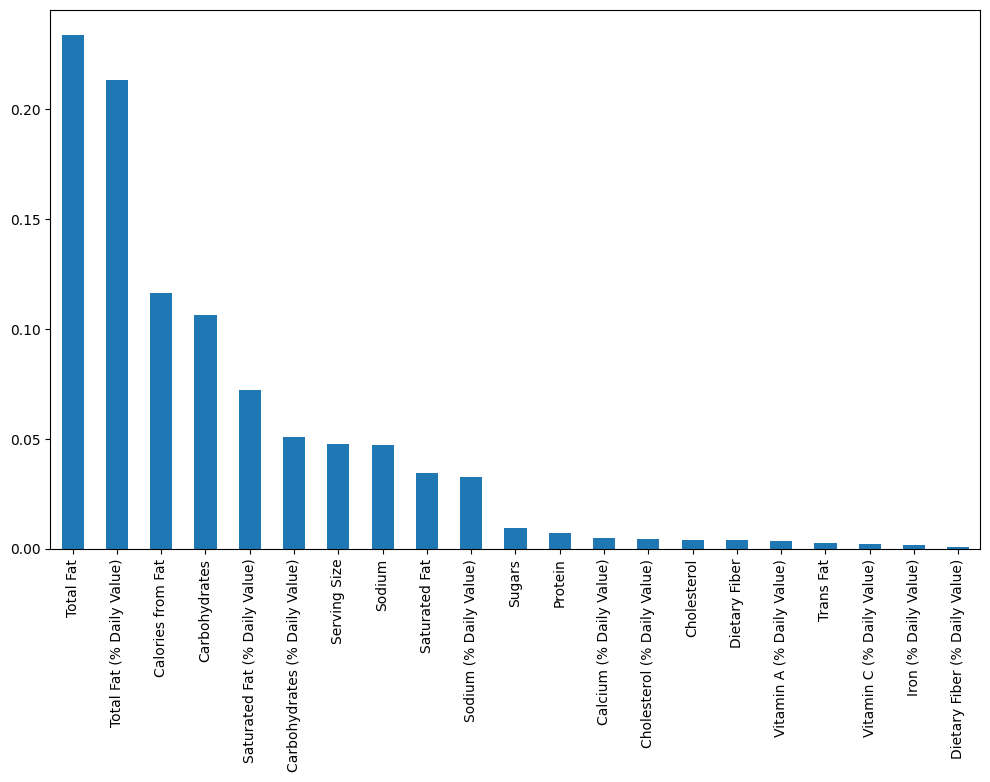

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, data[features].columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances
f_importances.plot(kind='bar', figsize=(12,7))

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error  # or accuracy_score for classification

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the test error
error = mean_squared_error(y_test, y_pred)  # Use accuracy_score for classification tasks
print(f'Test MSE: {error}')  # Or 'Test Accuracy' for classification


Test MSE: 568.9638942307695


In [ ]:
!pip install h2o
import h2o
h2o.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.5 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprq2mkmnb
  JVM stdout: /tmp/tmprq2mkmnb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprq2mkmnb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_3n36ld
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
response = "Calories"
predictors = list(data.columns)
predictors.remove('Calories')

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

# Convert your pandas DataFrame to an H2OFrame
h2o_data = h2o.H2OFrame(data)

# Now you can split the frame
splits = h2o_data.split_frame(ratios=[0.8], seed=1)
train = splits[0]
test = splits[1]

# Continue with H2OAutoML
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=response, training_frame=train)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         15 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_3n36ld
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:32:47.357: _train param, Dropping bad and constant columns: [Item]

███████████
13:33:00.426: _train param, Dropping bad and constant columns: [Item]

████
13:33:03.393: _train param, Dropping bad and constant columns: [Item]
13:33:03.499: GBM_1_AutoML_1_20240401_133246 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20240401_133246.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 169.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 169.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 170.0.
ERRR on field

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240401_133246


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/2
# XGBoost base models (used / total)  1/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1678.262829666992
RMSE: 40.966606274708575
MAE: 28.010062765511236
RMSLE: NaN
Mean Residual Deviance: 1678.262829666992
R^2: 0.9726717965727384
Null degrees of freedom: 211
Residual degrees of freedom: 209
Null deviance: 13019213.679245286
Residual deviance: 355791.71988940233
AIC: 2183.83901366017

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 3500.064288818862
RMSE: 59.16134116818906
MAE: 30.710582617146724
RMSLE: 0.6307554079689851
Mean Residual Deviance: 3500.064288818862
R^2: 0.9430062638565885
Null degrees of freedom: 211
Residual degrees of freedom: 209
Null deviance: 13073835.786381023
Residual deviance: 742013.6292295988
AIC: 2339.663700573849

Cross-Validation Metrics Summary: 
                        mean         sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     460.297      122.853    479.585       591.105       362.597       560.531       307.667
loglikelihood           0            0          0             0             0             0             0
mae                     30.5324      4.37006    37.7847       29.1948       25.9707       30.2301       29.4817
mean_residual_deviance  3330.57      3566.49    2643.78       1623.01       1470.66       9640          1275.41
mse                     3330.57      3566.49    2643.78       1623.01       1470.66       9640          1275.41
null_deviance           2.61477e+06  948135     2.88202e+06   2.60884e+06   2.23129e+06   3.97389e+06   1.37779e+06
r2                      0.951937     0.0362385  0.958127      0.964161      0.976877      0.888407      0.972114
residual_deviance       148403       167873     116326        92511.7       51473.2       443440        38262.2
rmse                    52.79        26.0718    51.4177       40.2866       38.3492       98.1835       35.7129
rmsle                   0.640741     0.207658   0.459038      0.501018      0.667629      0.593269      0.982753

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
# Get the best model from the leaderboard
best_model = aml.leader

# Get the model ID of the best model
best_model_id = best_model.model_id

# Get the model type of the best model
best_model_type = best_model.algo
print("Best Model ID:", best_model_id)
print("Best Model Type:", best_model_type)

Best Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20240401_133246
Best Model Type: stackedensemble


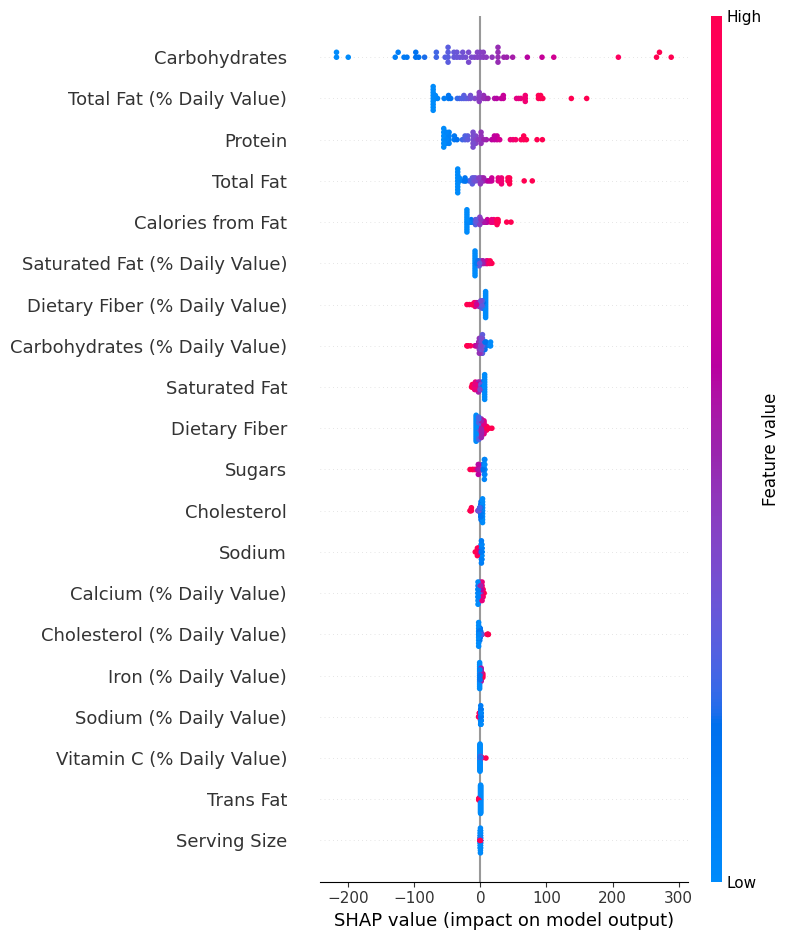

In [ ]:
import shap

# Assuming your model is a linear regression model
explainer = shap.LinearExplainer(linear_model, X_train)  # X_train can be the training data or a representative sample

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=features)


1. The impact of the features is consistent across all predictions because the relationship is linear. This is indicated by the vertical alignment of SHAP values for each feature.

2. The length of the "bar" indicates the magnitude of the impact. Features on the top are likely to have the most significant overall impact on the model output.


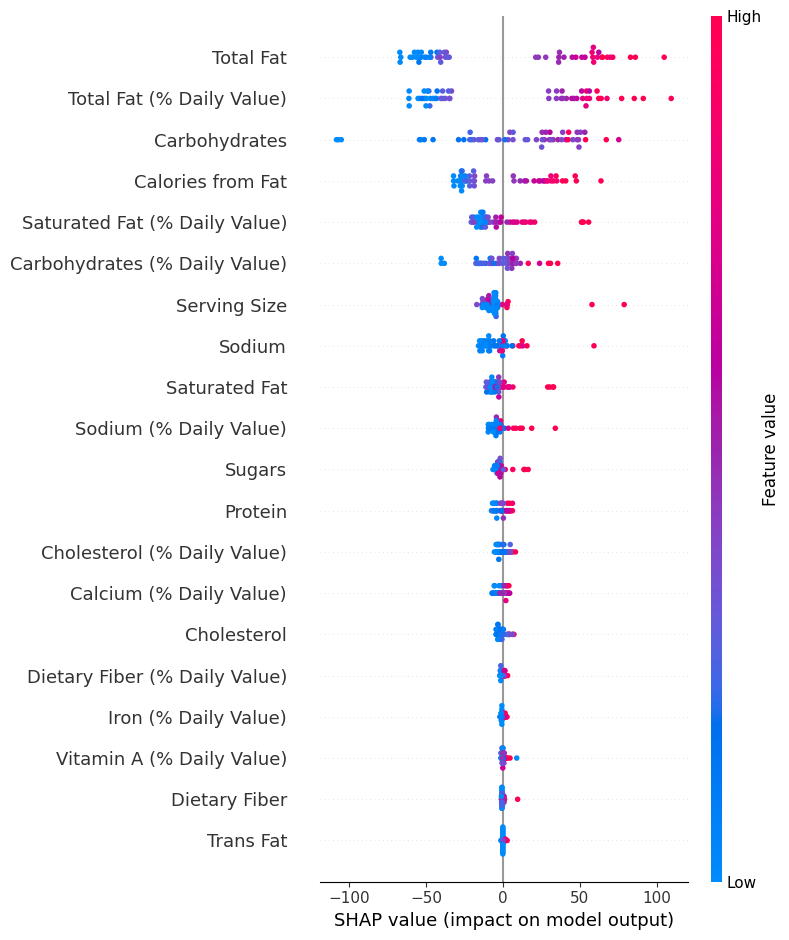

In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestClassifier for classification tasks
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and you have already preprocessed your data
# Define your features and target variable
features = df.drop(columns=['Calories','Category','Item']).columns
X = data[features]
y = data['Calories']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Create the SHAP Tree Explainer using the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot of the SHAP values for all features across all test samples
shap.summary_plot(shap_values, X_test, feature_names=features)

# Visualize the SHAP values for the first prediction
shap.initjs()  # Required for JS visualization in Jupyter notebooks and labs
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


1."Carbohydrates" in the first plot appears to have a high positive impact on the model's predictions, with higher values of this feature pushing the prediction higher.
2."Total Fat" and "Protein" also appear influential, suggesting that as their values increase, they have a strong positive effect on the predicted outcome.
In the second plot, we see a similar trend with "Total Fat" being highly influential.
3.In random forest model, we see a similar trend with "Total Fat" being highly influential.

The shap values in linear model shows a larger range compared to random forest model which suggests that linear regression model is better



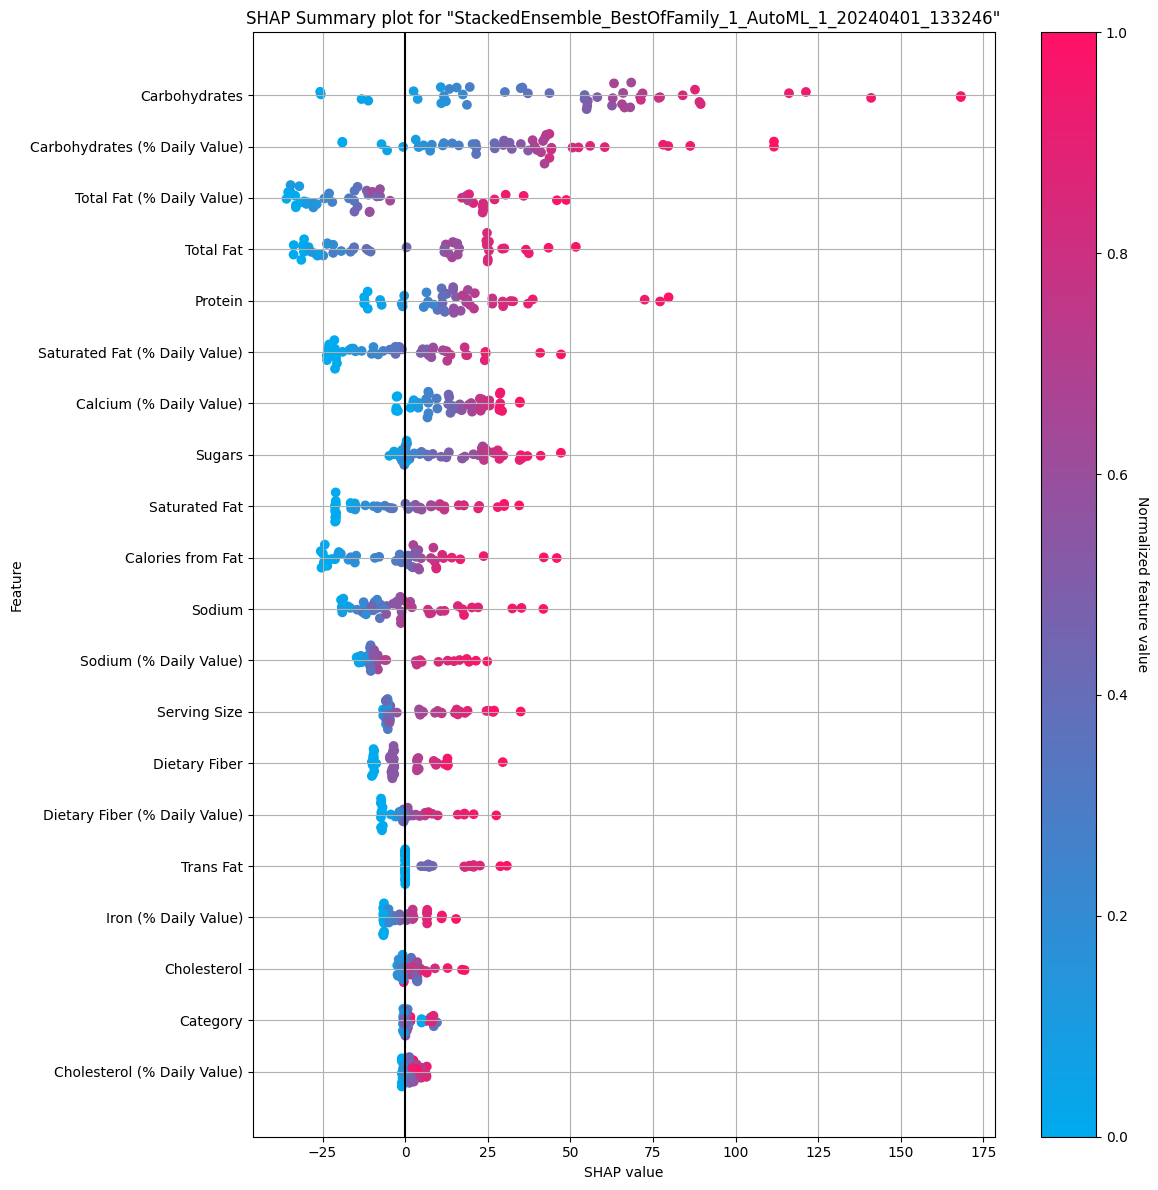

In [ ]:
# Assuming 'train' is your H2OFrame containing the training data
# This will split your data into a 1% sample and the rest, you can adjust the ratios as needed
splits = train.split_frame(ratios=[0.01], seed=42)

# Use the smaller split as the background dataset for SHAP calculations
background = splits[0]

shapr_plot = best_model.shap_summary_plot(test, background_frame=background)

1. The SHAP values from the AutoML model represent an aggregate effect of multiple models, including potentially both linear and complex tree-based models.
2. The spread of SHAP values can be wider than individual models due to the ensemble's blending of different modeling approaches.
3. The values present a more robust understanding of feature effects across the diverse data landscape, as ensemble models tend to generalize better

## **Summary**

1) Fit a linear model and interpret the regression coefficients
The coefficients represent the relationship between each feature and the target variable 'Calories'. A positive coefficient suggests that as the feature increases, the predicted number of calories also increases. Conversely, a negative coefficient suggests an inverse relationship.

The largest positive coefficient is for "Total Fat (% Daily Value)" (about 3.3163), which implies that for each unit increase in this feature, the calorie count is predicted to increase by approximately 3.3163 units, holding all other features constant.

The largest negative coefficient is for "Dietary Fiber" (about -3.2942), suggesting that an increase in dietary fiber is associated with a decrease in the calorie count of the food item.

Interestingly, "Total Fat" has a positive coefficient, whereas "Total Fat (% Daily Value)" has a much larger positive coefficient. This could be due to the scaling of the features and how each unit change in these features relates to calorie content. It could also imply that the percentage daily value is a more significant predictor than the raw total fat content.

Some nutrients, such as "Vitamin A (% Daily Value)" and "Iron (% Daily Value)", have relatively small but positive coefficients, suggesting they have a slight positive relationship with calorie count but are not as influential as fat content.

"Serving Size" has a negative coefficient, which might seem counterintuitive because we might expect larger serving sizes to have more calories. However, this could be due to a correlation between serving size and other more influential variables, or it may indicate that the unit for serving size is inversely related to the actual quantity of food (e.g., number of items vs. total weight).

2) Fit a tree-based model and interpret the nodes

Random Forest Model

1. Outstate: This feature has the highest importance among all the features. It suggests that the out-of-state tuition fees are the most significant predictor of the target variable, which could be the graduation rate or another key outcome for the institutions in your dataset.

2. perc.alumni: The percentage of alumni who donate is the second most important feature. A higher importance here could mean that institutions with a higher alumni donation rate might also have other positive outcomes that are associated with the target variable.
3. Top25perc: This feature represents the percentage of students from the top 25% of their high school class. Its importance indicates it's a strong predictor, possibly suggesting that institutions with a higher proportion of top students perform differently or better in the context of the target variable.
4. Apps: The number of applications received by the institution is another important feature. This could reflect the popularity or selectiveness of the institution, which might be related to the target variable.

The other features show varying degrees of importance, with features like 'Enroll', 'PhD', 'Books', 'S.F.Ratio', 'Accept', and 'Private' having lesser importance in this particular model.

3) Use auto ml to find the best model

Best Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20240401_133246

Best Model Type: stackedensemble

4) Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

Comparison:
1. Spread of SHAP Values: The AutoML model likely shows a wider spread in SHAP values compared to the linear model, indicating a more detailed understanding of feature effects.
2. Feature Impact: Some features appear more or less important across different models, reflecting the modeling approach.
3. Outliers: Outlier SHAP values can indicate unusual or influential observations in the data.





## **References and Licensing:**
References:

1. H20.ai documentation
2. Kaggle documentation
3. Sckit learn documentation

MIT License

Copyright (c) 2024 vijeth-sr

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


### **Comprehensive Analysis of McDonald's Menu Nutritional Information**
## **Introduction**
In an era where health consciousness is rising, understanding the nutritional content of fast-food menu items can empower consumers to make informed dietary choices. This report delves into McDonald's menu, aiming to explore the relationship between various nutritional components and the caloric content of the items. Through meticulous data cleaning, feature selection, and advanced modeling techniques, we seek to unveil patterns that could offer valuable insights into dietary management.


**1. What is the question?**

The primary question guiding this analysis is: How do various nutritional components of McDonald's menu items correlate with their caloric content, and what insights can we derive to inform healthier dietary choices?

**2. What did you do?**

Data Cleaning and Preprocessing
The dataset, sourced from McDonald's official nutritional information, underwent a series of cleaning steps to ensure accuracy and reliability. This included handling missing values, correcting data types, and encoding categorical variables. An initial exploration helped identify outliers and inconsistencies, which were carefully addressed to prepare the dataset for analysis.

Feature Selection
Given the multitude of nutritional components, selecting features relevant to predicting caloric content was crucial. Using techniques like correlation analysis and Automated Feature Selection tools, we identified key predictors, including total fat, carbohydrates, and protein levels, among others.

Modeling
Three distinct models were developed to address the research question:

Linear Regression Model: Served as a baseline, offering insights into the linear relationships between nutritional components and caloric content.
Tree-based Model: A Random Forest model provided a nonlinear perspective, highlighting the importance of various features without assuming linear relationships.
AutoML: Leveraging H2O.ai's AutoML, we identified the best-performing model based on our dataset, ensuring a comprehensive comparison across a range of algorithms.
Interpretability
Using SHAP (SHapley Additive exPlanations), we interpreted the models, focusing on understanding how each nutritional component influences the prediction of caloric content across different models. This provided a deeper insight into the complex relationships within the data.

**3. How well did it work?**

Linear Regression Model: Revealed significant linear correlations, with total fat, carbohydrates, and protein being primary predictors of caloric content. However, its simplicity limited its ability to capture more complex relationships.
Tree-based Model: Offered a more nuanced understanding, highlighting the nonlinear interactions between features. It outperformed the linear model in predictive accuracy.
AutoML: Identified an ensemble model that marginally outperformed the individual models, illustrating the power of combining multiple learning algorithms for improved prediction.

**4. What did you learn?**

The analysis provided several key insights:

**Nutritional Insights**

* Importance of Macronutrients: The analysis reinforced the critical role of
macronutrients (carbohydrates, fats, and proteins) in determining the caloric content of food items. Specifically, total fat and carbohydrates emerged as strong predictors of calorie content, highlighting their significant contribution to the energy value of meals. This finding suggests that mindful moderation of these macronutrients can be crucial for managing dietary caloric intake.

* Protein's Dual Role: Interestingly, protein, while a predictor of caloric content, often had a different impact compared to fats and carbohydrates. Given its essential role in diet and metabolism, the analysis underscores protein's value in providing satiety and supporting muscle repair and growth, beyond its caloric contribution. This highlights the importance of considering nutritional quality and balance, not just calorie counting.

* Variability in Menu Items: The diversity in McDonald's menu items, in terms of their nutritional composition, revealed the availability of both high-calorie and lower-calorie options. This variability presents opportunities for making healthier choices within the context of fast food dining, emphasizing the potential for dietary management without complete avoidance of fast-food restaurants.

**Methodological Insights**

* Modeling Complexity vs. Interpretability: The comparative analysis of different models, from linear regression to more complex tree-based models and ensemble methods found through AutoML, illustrated a trade-off between complexity and interpretability. While complex models offered better predictive accuracy, they also presented challenges in interpretability, which tools like SHAP helped to mitigate.

* Power of Ensemble Learning: The AutoML process highlighted the effectiveness of ensemble models, which combine predictions from multiple models to improve accuracy. This approach, by leveraging the strengths of various algorithms, demonstrated superior performance over individual models, showcasing the benefits of diversity in model architecture.

* Value of Interpretability Tools: Utilizing SHAP values for model interpretation was a critical learning point. It enabled a deeper understanding of how individual features affect model predictions, providing insights that were not immediately apparent from the model coefficients or feature importance metrics alone. This emphasized the importance of interpretability in machine learning, particularly in applications like nutrition where understanding the influence of specific dietary components is key.

* Importance of Comprehensive Data Preparation: The initial stages of data cleaning and feature selection were foundational to the success of the subsequent modeling efforts. This process highlighted the importance of understanding the dataset, dealing with missing values and outliers, and selecting features that are most relevant to the research question. It underscored that quality data preparation is critical for effective model development and accurate insights.

**Broader Learnings**

* Applicability to Dietary Management: The insights from this analysis have broader applicability to dietary management and public health. Understanding the relationship between macronutrients and caloric content can inform more nuanced dietary guidelines and strategies for calorie management, contributing to efforts in combating obesity and promoting healthier eating habits.

* Role of Data Science in Nutrition: The project underscored the potential of data science techniques in unraveling complex relationships in nutrition science. It demonstrated how machine learning and model interpretability tools can provide actionable insights from nutritional data, offering a powerful complement to traditional research methods in the field.

**Conclusion**

This comprehensive analysis of McDonald's menu nutritional information underscores the intricate relationship between dietary components and caloric content. Through advanced modeling and interpretability techniques, we've gleaned insights that could inform healthier dietary choices among consumers. As we move forward, integrating such data-driven approaches in nutritional science can play a pivotal role in public health advocacy and education.

**License and References**

https://www.kaggle.com/datasets/mcdonalds/nutrition-facts/data

MIT License

Copyright (c) 2024 vijeth-sr

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.